In [2]:
import numpy as np
import matplotlib.pyplot as plt

elevation_text = """532.4 529.3 526.0 520.0 519.5 519.3 520.3 521.4 522.0 521.5 521.6 521.6 521.1 520.9 521.1 520.9 520.8 520.4 520.4 520.5 520.7 520.2 517.3 514.1 512.1 507.7 510.8 511.6 511.1 505.1 502.1 519.4 520.8 528.8 530.1 534.4 540.8 546.8 550.5 551.2 550.4 548.0 542.1 533.4 529.1 528.9 528.9 529.3 540.0 540.0 544.6 560.0 551.7 540.6 539.9 547.0 556.6 561.6 563.2 561.5 552.6 539.0 535.5 532.1 529.4 527.7 528.1 525.6 520.0 520.0 520.0 521.0 526.9 532.8 538.2 541.6 547.8 553.4 540.0 540.0 540.1 527.5 520.0 520.0 519.3 519.5 519.3 521.2 529.1 537.0 540.8 540.5 544.2 540.7 540.0 539.8 540.0 540.9 542.6 542.4 540.2 540.0 529.4 530.0 541.1 543.6 560.0 550.6 541.9 534.7 529.9 530.0 533.2 534.4 532.2 537.9 540.0 547.6 554.9 560.0 560.2 560.8 562.4 561.4 560.0 554.0 548.6 543.9 544.0 540.2 539.4 539.3 540.7 539.6 539.1 541.3 545.9 547.4 544.3 543.3 549.6 551.1 555.0 558.6 560.4 560.8 560.0 561.7 559.1 558.6
531.2 525.2 520.0 519.3 517.3 517.3 519.5 520.3 521.0 520.7 520.7 520.5 520.1 520.0 520.0 520.0 519.2 519.2 518.7 520.0 520.4 521.0 520.6 520.1 518.8 517.3 518.7 520.0 521.1 520.0 515.6 518.5 520.0 533.5 541.5 540.9 542.4 547.2 550.0 550.2 547.4 543.8 536.4 528.8 528.9 529.0 532.4 537.8 539.6 546.0 555.5 560.7 560.4 550.2 540.0 545.7 556.2 561.4 562.7 561.3 554.3 541.9 536.6 534.7 530.0 528.0 527.0 523.9 520.2 520.0 520.0 526.3 532.5 538.9 541.2 544.4 558.7 560.0 540.0 540.0 536.3 524.0 519.3 519.3 519.3 519.3 520.0 526.4 534.8 540.3 540.0 540.0 549.9 546.3 540.0 539.9 540.0 541.2 543.9 544.6 540.5 539.9 530.0 529.4 540.0 552.5 560.5 558.9 549.0 538.6 529.9 532.3 540.0 540.1 540.0 538.7 539.5 547.0 554.8 560.0 560.2 560.9 563.7 561.4 560.0 555.5 549.5 549.0 549.2 540.0 539.3 540.0 544.8 544.8 542.0 547.9 550.0 550.0 550.3 548.8 550.1 547.6 547.4 550.1 555.9 552.3 551.6 554.8 554.1 555.9
531.0 526.0 520.0 520.0 517.3 514.6 515.3 520.0 520.0 517.8 516.2 515.2 514.0 513.7 514.2 514.5 514.4 514.5 514.4 520.0 520.0 520.0 520.7 520.9 520.6 520.5 520.8 521.3 528.0 527.1 526.0 522.4 529.6 537.5 540.6 540.0 540.0 540.8 541.4 542.9 540.8 535.7 529.3 527.0 528.4 531.9 542.2 543.4 541.6 555.1 559.3 560.1 560.0 560.0 553.7 560.0 560.0 561.2 562.9 561.7 556.3 544.1 538.3 539.5 540.0 532.2 528.8 527.2 520.5 520.0 523.2 531.2 538.9 543.5 549.6 557.9 560.3 560.3 554.1 544.7 535.8 524.6 519.3 519.3 519.3 519.3 522.5 530.9 540.1 540.9 540.0 540.0 558.0 554.7 540.0 540.3 540.0 542.2 546.8 548.1 540.8 539.9 532.3 529.5 540.0 553.5 561.1 560.9 553.7 542.0 529.9 531.7 540.8 541.0 545.9 540.5 539.5 544.2 551.1 557.9 560.0 560.5 564.3 561.6 560.3 559.1 552.5 552.5 549.1 539.6 539.4 545.5 550.0 550.7 548.2 550.0 549.9 549.9 550.7 550.0 550.1 547.3 545.6 547.9 550.5 543.0 544.8 550.2 551.0 552.9
530.0 528.9 523.3 520.0 518.7 513.6 513.2 514.7 513.9 511.2 508.3 507.6 506.4 506.8 507.6 508.3 508.7 508.8 508.5 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.2 527.4 530.7 530.8 531.1 532.1 537.4 540.3 541.4 540.2 539.6 537.8 533.6 531.9 530.0 526.8 524.2 526.7 529.5 538.1 544.2 546.0 547.7 557.3 560.1 560.3 560.2 560.0 558.3 560.0 560.0 560.4 562.6 561.7 559.4 554.2 541.7 542.5 541.9 540.0 534.4 530.0 528.5 522.0 529.5 536.6 541.5 544.6 549.0 556.7 557.2 560.0 548.0 540.8 531.5 521.5 519.3 519.3 519.3 519.3 522.2 532.2 542.2 546.1 548.4 557.1 560.1 560.2 556.9 550.7 555.6 555.8 555.5 554.7 543.5 540.0 537.4 531.4 542.1 555.5 561.7 562.8 560.0 546.6 536.7 537.9 541.3 550.2 550.7 548.7 543.1 549.3 550.9 557.0 560.0 560.3 568.7 566.5 561.4 560.4 556.2 552.1 549.5 546.8 547.0 550.8 552.9 554.8 553.6 550.0 550.0 550.0 550.4 549.5 546.3 541.3 541.3 542.9 541.7 539.9 540.0 543.7 545.6 545.9
530.0 530.0 525.2 520.7 519.4 508.8 507.6 509.6 507.5 503.7 500.0 500.0 500.0 500.0 501.0 501.9 502.7 502.6 502.3 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.7 528.7 532.1 534.9 539.5 540.8 540.7 541.8 540.0 540.0 532.9 527.2 523.3 522.2 521.2 519.9 522.0 527.7 535.8 542.1 542.9 544.0 555.1 560.0 560.2 560.2 560.1 560.0 560.0 560.0 560.2 563.5 564.9 560.0 556.7 552.2 545.4 543.2 541.8 540.3 533.3 529.4 526.1 529.3 531.3 540.0 545.5 551.3 560.4 558.9 556.4 543.0 533.7 527.9 519.9 520.0 520.0 519.4 519.8 520.4 526.9 536.2 542.4 542.8 554.0 560.1 560.5 560.0 555.6 557.6 558.1 558.8 559.6 544.6 540.0 538.1 537.2 543.8 555.9 561.7 563.4 561.2 551.6 539.2 537.8 539.5 547.0 550.7 550.2 548.5 549.6 552.7 558.8 560.0 560.4 575.6 573.0 562.7 560.9 558.5 551.1 549.6 550.0 553.1 558.0 559.2 560.0 559.1 550.0 550.0 550.0 550.0 545.8 541.7 539.9 539.9 540.6 540.0 540.0 538.5 540.3 541.6 541.2
527.9 530.2 524.9 520.0 514.0 500.6 500.8 502.2 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.3 504.1 510.0 515.4 518.0 518.0 517.5 517.9 519.0 522.3 530.0 533.4 540.0 540.8 540.6 540.2 540.0 540.0 531.5 522.5 519.9 519.9 519.9 519.9 520.4 526.0 530.0 534.9 540.0 540.5 547.4 556.9 560.2 560.5 560.3 560.1 560.0 560.0 560.2 565.2 578.0 562.1 560.0 560.2 556.3 549.0 545.0 540.8 534.1 529.4 527.6 528.1 529.7 536.6 540.0 549.7 558.4 559.1 552.3 537.9 527.8 523.1 519.9 520.0 520.0 519.4 519.4 519.6 519.5 522.7 534.0 540.0 541.8 554.2 559.1 553.5 559.0 560.0 560.0 561.8 561.3 554.2 541.8 537.9 537.9 544.2 557.6 562.3 566.5 563.8 560.0 542.6 537.8 538.8 544.1 550.5 550.5 551.0 549.9 552.2 560.0 560.0 560.4 579.9 578.7 565.7 560.6 559.9 559.1 555.1 559.2 560.0 560.6 560.3 560.9 560.5 559.2 552.5 550.5 548.1 542.0 540.0 539.9 540.0 540.0 540.0 540.0 533.4 536.5 538.4 537.8
519.3 522.6 520.0 514.2 505.6 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.0 500.3 503.8 509.3 513.6 516.1 517.1 517.1 517.1 518.0 519.2 523.1 530.0 538.5 541.2 538.6 535.1 538.2 532.8 526.0 519.9 519.9 519.9 520.0 521.1 520.0 528.4 528.4 529.1 533.5 537.6 541.6 552.2 560.5 561.6 561.2 560.7 560.0 560.0 563.7 575.4 580.0 577.2 565.6 564.1 558.8 550.3 544.7 540.0 533.7 529.5 527.9 528.6 530.5 535.6 542.2 556.5 561.4 560.3 551.4 539.4 533.1 530.0 522.9 520.0 520.0 519.4 519.4 519.4 519.4 519.4 520.0 531.7 540.5 548.0 553.5 558.0 560.1 560.2 560.0 563.2 560.7 557.9 545.6 538.7 538.3 544.1 557.5 562.4 570.7 566.7 562.7 550.0 538.7 538.2 541.2 550.0 552.8 555.2 554.6 558.9 563.4 571.7 578.8 580.6 580.5 575.3 564.9 559.0 558.5 560.0 560.0 560.0 560.9 560.3 560.9 560.4 556.1 550.3 548.3 541.8 539.9 539.9 539.9 540.0 540.0 540.0 540.0 530.6 532.7 534.1 534.5
512.9 513.5 512.4 506.2 501.0 500.0 500.7 500.5 500.6 500.8 500.5 500.0 500.0 500.0 500.0 500.0 500.0 500.0 501.6 517.9 519.3 519.5 519.6 519.4 519.2 518.7 518.4 518.8 519.3 519.7 522.5 530.0 532.3 530.0 527.2 528.4 525.3 520.0 519.9 519.9 519.9 520.7 527.7 527.2 529.7 528.6 529.2 532.4 536.0 540.0 546.7 558.7 560.9 561.0 560.7 560.7 560.0 566.3 578.3 580.5 578.1 567.9 562.8 557.6 546.0 542.5 538.2 533.3 529.6 528.7 529.2 531.9 537.6 549.9 561.0 563.3 560.9 557.9 542.9 541.3 540.0 530.8 521.5 520.0 519.4 519.4 519.6 520.0 519.4 519.4 521.6 531.6 541.2 548.1 553.1 560.0 560.1 560.0 568.0 561.9 560.0 550.6 540.0 538.3 542.5 560.0 563.2 577.5 571.5 562.7 555.0 540.0 538.6 541.0 548.5 552.3 557.4 557.9 559.5 564.4 572.1 578.8 581.3 581.4 580.0 564.8 558.6 559.6 559.9 559.9 559.9 559.9 560.0 558.4 554.4 550.0 548.8 548.2 546.4 540.0 540.0 540.0 537.2 536.6 533.3 530.6 529.8 529.8 530.0 530.8
508.6 504.6 505.1 501.1 499.2 498.9 500.0 500.0 500.0 500.0 500.0 500.2 501.8 502.5 502.5 502.4 500.6 503.0 504.1 514.8 519.5 519.8 519.8 519.8 519.7 519.2 518.4 518.4 518.7 519.3 519.7 519.9 520.0 521.3 520.0 520.0 519.9 519.9 519.9 520.0 520.0 523.4 530.2 530.7 530.0 531.2 530.0 537.1 537.4 538.2 540.0 553.4 560.4 563.7 566.0 572.9 567.0 578.1 580.3 580.2 574.7 563.8 558.8 551.1 541.2 539.9 539.7 538.5 534.3 532.4 530.3 538.4 540.0 553.4 562.5 566.8 562.2 560.0 551.4 545.7 541.2 530.0 520.0 519.4 519.4 519.6 521.8 523.7 520.8 519.4 519.4 523.1 530.0 541.2 544.7 556.7 562.2 568.3 570.2 568.5 562.8 554.5 543.2 538.5 542.5 560.0 572.9 580.2 579.0 570.5 560.0 545.8 539.3 541.5 548.6 553.8 560.3 561.0 560.7 564.9 575.5 579.2 580.2 580.2 580.0 577.2 561.7 567.5 564.6 563.8 562.8 561.0 559.3 550.0 549.6 549.7 549.5 549.9 549.9 544.9 542.0 540.9 540.0 537.7 537.1 536.0 531.1 529.8 529.4 529.3
501.3 498.7 498.7 497.4 496.2 494.4 500.0 500.0 500.0 500.0 500.0 501.4 503.1 504.2 504.9 505.6 504.5 505.9 506.3 514.9 519.9 519.9 520.0 519.9 519.9 519.9 519.1 519.0 519.3 519.6 519.8 519.9 519.9 519.9 519.9 519.9 519.9 519.9 519.9 519.9 519.9 520.7 528.5 530.3 530.8 538.7 538.4 538.9 538.9 538.2 539.3 548.3 558.2 564.3 567.6 579.0 578.1 580.0 580.8 579.2 568.8 559.1 554.3 542.4 539.5 539.5 539.5 540.0 540.5 540.0 535.4 537.8 540.0 555.0 566.1 570.0 565.6 560.8 552.8 545.2 535.7 525.1 519.4 519.4 519.4 522.5 528.0 530.6 528.7 520.0 519.4 519.4 524.3 532.8 540.7 551.2 560.0 568.5 570.6 570.0 564.9 560.0 547.3 539.0 542.9 562.0 573.7 580.5 580.5 575.0 563.8 551.9 540.0 539.6 544.3 551.4 558.7 560.3 560.2 561.5 575.7 579.3 580.3 580.4 580.7 578.2 572.3 574.5 566.9 563.8 561.8 559.3 551.1 549.6 549.6 549.6 550.0 550.0 550.0 550.0 545.1 541.6 539.7 538.3 538.7 539.7 536.7 531.3 529.4 528.7
498.9 497.2 496.3 495.5 493.4 492.0 500.0 500.0 500.0 500.0 501.3 504.0 506.1 507.5 508.5 509.8 509.5 512.0 514.9 518.3 520.0 521.2 527.2 527.5 521.6 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 519.9 519.9 520.0 520.6 520.0 519.9 522.8 528.1 536.3 541.3 542.0 548.0 548.0 547.4 542.4 558.4 560.0 569.1 580.0 581.3 581.6 580.7 581.1 575.9 565.3 558.8 558.0 555.6 543.1 541.1 542.9 542.5 543.0 541.6 539.2 539.0 544.8 557.8 570.0 570.7 570.0 561.4 550.8 541.5 531.5 521.5 519.4 519.4 520.0 527.3 532.1 534.8 531.7 525.1 519.4 519.4 519.4 524.6 534.9 544.6 553.8 560.9 570.1 570.0 565.8 560.9 548.2 539.2 545.1 561.1 574.7 580.9 581.1 578.8 567.5 557.3 546.7 539.6 539.6 545.8 550.0 552.9 558.9 560.0 568.4 577.0 580.0 580.0 588.2 580.6 580.0 580.0 573.4 565.1 560.8 559.3 558.9 550.0 553.1 553.1 554.2 550.7 550.7 550.3 545.6 540.0 539.5 539.6 539.8 540.9 541.0 536.9 531.1 529.1
495.9 493.4 492.9 492.2 490.6 490.0 500.0 500.0 500.0 500.4 503.2 505.7 508.1 509.7 511.1 513.0 512.8 514.0 516.6 519.3 524.2 531.3 540.0 540.4 530.8 523.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 525.4 525.0 522.0 520.0 520.7 526.7 533.5 541.3 547.9 550.6 550.8 550.0 557.5 560.0 565.1 570.4 580.0 581.1 581.8 581.6 581.2 574.7 562.1 558.2 559.3 557.8 550.4 548.8 548.9 544.7 544.1 542.0 539.6 539.6 546.3 558.0 570.4 571.5 570.4 561.6 548.4 538.4 530.0 519.4 519.4 519.4 524.2 531.9 537.4 540.6 538.1 527.3 520.8 519.4 519.6 519.4 530.0 542.8 551.0 557.0 562.1 566.9 562.1 560.8 550.5 540.3 545.1 562.3 576.2 581.5 581.8 580.9 572.8 561.7 551.6 543.1 539.8 540.0 546.7 548.0 552.5 557.2 563.5 574.5 582.9 587.9 590.0 586.9 582.9 579.0 571.3 562.4 559.5 558.9 559.6 557.2 560.0 558.2 558.5 551.2 550.6 549.2 541.1 539.6 540.0 539.8 540.4 541.8 541.9 540.3 536.5 532.9
493.2 491.3 490.6 490.0 490.0 490.0 492.5 496.4 498.6 501.4 504.1 508.1 511.2 512.4 514.0 516.7 516.4 515.3 516.6 519.3 524.4 533.4 540.5 542.0 540.7 525.9 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.0 520.5 521.9 527.2 530.3 532.9 530.0 527.1 528.7 529.0 530.4 536.6 541.9 549.0 552.5 560.5 561.7 562.0 560.5 561.2 563.6 577.5 580.3 581.0 581.3 577.4 564.7 559.5 559.9 559.9 558.5 557.1 554.9 546.0 544.4 542.0 539.6 539.6 547.6 560.0 571.0 571.5 568.6 560.0 545.2 535.5 525.9 519.4 519.4 522.7 530.0 537.7 542.4 543.8 541.0 531.6 523.4 519.7 522.3 522.9 527.2 535.1 546.2 554.1 560.0 562.2 560.8 560.3 558.9 552.0 557.7 562.6 580.0 582.4 582.5 581.8 576.9 567.2 558.1 548.8 542.5 539.8 544.1 548.1 553.7 559.5 566.5 574.6 582.1 588.2 590.2 587.5 582.1 575.6 566.4 559.7 559.2 559.4 560.0 560.6 560.8 560.4 560.2 560.0 552.2 549.3 547.7 542.4 542.6 541.9 544.0 545.7 545.7 542.7 540.0 538.8
490.7 490.0 490.0 490.0 490.0 491.2 496.0 497.9 500.6 504.3 509.0 513.7 515.4 515.7 517.5 520.5 521.6 518.4 517.7 520.0 520.8 532.0 545.3 560.0 549.7 527.8 520.0 520.0 520.0 520.6 520.0 520.0 520.0 520.0 520.0 520.6 524.6 531.2 538.7 540.6 537.6 533.0 529.5 528.7 529.1 530.9 536.5 542.7 547.0 551.5 555.9 557.4 557.8 558.3 558.8 568.7 576.8 580.1 580.6 580.0 578.3 570.4 561.9 561.0 561.5 561.3 560.2 555.4 549.2 544.0 539.7 539.6 548.8 562.4 571.4 571.2 566.5 554.8 540.0 530.0 521.2 519.4 520.0 527.3 535.6 541.8 546.2 545.4 542.0 535.8 529.7 523.5 530.1 528.9 530.0 530.0 540.0 550.6 560.0 561.8 561.1 560.6 560.0 555.4 557.3 563.7 581.3 583.7 583.4 582.5 578.9 569.2 560.0 550.0 546.7 542.7 548.0 550.0 560.0 562.5 571.5 576.4 582.3 588.9 590.5 587.6 580.0 573.9 566.0 560.0 559.6 559.8 560.0 560.8 560.8 560.3 560.1 557.2 550.0 549.1 548.2 546.1 545.9 545.7 547.2 548.7 549.2 547.3 540.2 540.2
490.0 490.0 490.0 490.0 490.8 493.6 498.2 499.5 503.5 507.6 514.2 517.6 518.8 518.8 520.0 523.1 529.1 523.1 518.9 518.8 519.0 529.7 544.4 558.1 560.0 530.0 520.0 520.0 520.1 521.8 523.1 521.5 520.2 520.0 520.0 520.0 523.0 531.5 540.3 541.8 542.5 538.7 533.2 529.6 528.9 528.9 529.6 538.0 540.5 542.5 544.6 545.4 547.5 548.9 551.3 560.0 570.3 580.0 581.5 580.7 580.1 580.0 572.4 566.3 563.6 563.3 561.9 558.7 551.8 546.0 540.7 540.0 550.5 566.6 572.0 570.5 561.8 547.1 535.4 527.5 519.5 519.4 525.5 532.7 540.0 543.3 555.7 549.3 542.1 538.1 529.5 528.2 530.0 530.3 529.1 529.5 540.0 550.3 560.0 561.6 561.0 560.7 560.2 559.1 559.1 572.8 582.1 583.8 583.6 583.2 580.4 570.6 560.0 552.3 549.1 546.1 548.7 551.1 558.7 564.2 571.2 576.9 583.2 590.0 590.6 589.3 582.4 574.7 566.8 560.0 559.9 560.0 560.0 561.0 560.5 560.1 558.9 551.4 549.0 549.0 549.4 550.5 551.5 551.5 552.2 550.0 550.2 550.0 546.7 542.4
490.0 490.0 490.0 490.0 492.5 496.0 499.8 503.0 508.5 513.9 518.4 520.0 524.1 525.5 527.7 531.3 540.1 537.8 521.4 519.3 518.8 525.5 540.0 556.1 560.0 530.0 521.0 520.0 520.3 526.3 527.5 524.3 521.5 520.1 520.0 520.0 520.5 528.4 540.0 542.1 549.1 546.4 540.4 534.8 532.3 529.5 529.0 529.9 535.3 538.5 538.7 540.0 542.0 545.9 548.0 554.2 563.4 575.0 580.7 581.4 580.7 581.3 580.0 573.8 565.6 563.0 561.1 559.7 558.6 557.0 551.1 547.5 559.8 567.6 570.6 566.1 555.1 540.0 531.0 524.7 519.5 522.3 530.0 536.4 544.7 553.4 560.4 558.4 547.7 537.2 530.0 528.9 530.0 530.5 529.5 529.6 540.0 550.8 560.2 563.0 562.3 561.0 560.7 561.8 563.2 579.0 580.0 580.0 580.0 580.8 580.1 571.8 560.0 557.6 553.5 549.3 549.5 550.7 556.0 562.1 569.5 576.3 582.0 589.0 590.8 590.5 585.2 579.1 576.2 570.3 562.2 561.6 563.1 561.7 560.5 558.9 553.0 549.2 549.2 550.0 551.8 558.6 560.3 560.3 558.8 550.0 550.2 550.1 550.0 547.1
490.0 490.0 490.0 492.6 496.6 500.0 505.6 510.1 514.7 518.6 521.4 522.2 531.5 533.8 535.4 539.2 541.1 540.8 534.7 525.0 519.4 522.1 537.3 542.6 542.0 535.9 522.3 520.0 523.6 530.4 531.6 529.2 525.8 521.3 520.0 520.0 520.0 522.8 532.0 543.2 550.5 551.1 550.3 545.2 541.5 540.0 540.0 538.9 538.7 539.7 540.0 540.0 540.0 545.0 546.9 551.3 560.0 571.8 580.0 581.3 580.9 580.9 578.1 568.5 562.4 560.4 559.8 558.3 557.2 556.6 554.8 554.5 559.8 558.6 566.5 560.0 544.1 534.8 528.9 528.4 523.8 529.2 534.3 540.0 549.5 558.4 562.8 560.0 549.4 538.5 530.0 528.9 530.0 530.5 529.6 529.5 540.0 550.2 560.3 562.3 560.7 560.0 560.0 560.0 570.0 579.0 580.0 580.0 580.0 582.3 580.4 578.3 572.7 564.1 562.1 553.9 549.5 551.2 560.0 563.9 570.2 574.0 579.2 587.2 590.9 590.6 584.6 578.4 575.3 571.4 564.9 561.5 560.3 560.0 559.5 556.0 550.7 549.5 551.7 554.8 557.9 560.7 561.7 561.7 560.6 556.8 550.9 549.6 542.7 542.8
490.5 492.1 494.8 498.1 501.5 507.4 512.0 515.6 519.3 521.5 524.1 526.0 537.9 539.8 540.2 540.7 541.3 540.6 540.1 536.8 527.9 538.5 539.8 542.5 542.3 537.3 527.4 520.0 525.4 531.5 536.0 532.2 530.0 526.4 520.6 520.0 520.0 520.0 528.3 538.2 546.6 550.8 551.7 555.5 552.0 547.2 546.6 541.5 540.0 544.0 545.9 544.9 544.4 547.3 548.2 550.0 560.0 571.2 580.0 580.9 580.3 579.3 567.7 562.6 559.9 559.6 559.6 557.3 557.4 557.6 556.6 556.9 559.8 560.1 558.6 550.8 540.0 530.0 528.4 528.9 530.0 533.7 539.0 546.0 554.7 561.3 570.0 560.7 552.8 541.6 532.3 529.6 530.0 536.5 530.3 529.5 537.3 546.5 558.4 560.2 558.0 554.1 559.4 559.1 562.8 574.3 580.0 580.0 580.0 584.4 580.4 578.7 574.8 571.0 567.4 561.1 551.2 551.7 558.6 562.0 569.7 573.7 579.5 587.2 591.0 590.7 583.5 577.9 575.7 572.8 566.8 562.8 560.4 559.9 559.8 559.6 560.0 560.0 558.8 560.0 560.3 561.0 561.6 561.1 560.2 555.4 550.0 548.9 540.2 541.6
496.2 498.7 501.7 506.7 510.5 515.3 518.1 520.3 521.8 522.6 528.5 537.0 540.3 541.0 540.7 540.8 541.0 541.2 540.4 540.1 537.0 539.2 539.4 549.1 548.3 538.4 530.0 524.2 528.4 540.0 541.0 537.6 535.5 530.5 525.8 520.6 520.0 520.0 523.4 532.2 540.0 548.3 554.5 560.4 561.3 560.0 554.2 550.0 548.7 552.1 555.5 554.7 552.2 549.5 548.6 550.0 558.4 571.5 580.7 581.1 579.2 576.3 564.9 560.0 559.1 559.1 559.1 558.8 559.2 559.5 546.8 544.3 544.3 555.3 546.9 541.7 531.4 528.5 528.9 529.6 533.2 537.3 543.7 551.6 560.0 563.9 580.0 561.3 556.5 545.9 538.6 533.4 539.3 540.5 540.0 532.6 539.9 540.0 541.9 546.5 545.0 544.6 556.8 557.6 560.0 572.0 580.0 580.0 580.0 590.6 582.0 580.0 579.0 578.6 572.7 562.4 558.5 558.0 559.3 559.7 566.9 574.6 581.8 588.1 590.9 590.4 580.0 578.2 578.3 576.5 566.1 561.4 559.8 559.8 560.1 564.2 567.0 560.0 561.4 561.2 560.9 561.2 560.8 560.0 556.8 552.2 548.7 541.9 539.0 540.4
500.8 502.3 511.9 516.8 519.0 520.5 520.6 520.3 520.0 520.2 521.0 520.2 537.6 537.6 533.8 534.5 537.5 539.0 540.2 541.9 542.2 548.1 550.6 555.0 552.3 542.0 534.0 528.8 531.8 541.1 543.3 541.3 540.8 535.2 530.0 525.1 522.8 520.0 520.7 527.4 533.4 540.0 550.0 560.0 561.7 562.1 560.5 558.0 557.4 561.0 567.5 567.9 563.7 558.1 551.1 550.0 558.3 572.8 581.2 581.1 577.8 572.6 561.6 559.2 559.1 559.6 560.6 560.5 560.6 560.2 560.0 554.8 544.3 547.1 542.8 533.3 529.4 529.3 530.3 531.3 536.5 540.8 548.3 555.6 566.0 576.6 580.4 570.5 556.9 547.9 541.8 538.8 539.7 540.8 542.0 539.4 540.0 539.9 539.9 539.9 539.9 539.9 544.2 551.4 557.3 568.7 580.0 580.0 580.0 598.4 594.5 587.7 584.7 582.5 580.0 569.2 560.0 558.0 559.9 559.7 563.4 573.6 581.7 588.2 590.3 590.1 588.8 580.0 581.2 580.3 569.4 559.8 559.8 560.3 561.5 572.4 576.1 560.0 562.0 561.0 560.5 560.0 556.2 551.4 551.0 550.1 546.5 540.8 538.7 539.6
504.9 512.7 520.2 520.8 520.6 520.0 517.5 515.7 514.1 515.2 517.7 520.0 522.6 522.6 520.0 522.1 529.9 533.1 536.6 540.0 550.0 552.5 556.0 560.4 562.0 550.0 540.0 540.0 541.9 547.5 548.0 543.5 540.6 536.6 532.3 529.1 527.5 524.7 530.0 529.4 530.0 535.9 543.7 553.9 561.4 563.8 563.3 560.9 570.2 577.3 580.8 580.0 574.9 566.4 559.1 557.0 562.0 574.8 580.9 580.7 576.0 567.8 559.6 559.1 560.0 562.3 564.0 561.4 561.0 560.0 560.0 552.7 541.7 540.0 538.6 529.7 529.6 529.9 531.8 534.2 539.1 544.4 553.1 560.0 573.7 580.7 580.3 571.3 560.0 551.2 544.1 539.6 539.7 540.8 544.4 544.0 540.0 539.9 539.9 541.0 544.5 543.7 553.4 555.0 557.8 565.0 580.0 589.6 597.6 600.2 598.8 595.6 591.8 587.6 581.9 574.5 565.5 559.7 561.4 565.1 575.4 575.4 579.2 587.2 590.9 591.8 590.0 586.9 585.2 581.7 567.8 559.8 562.3 565.3 573.1 580.1 580.5 577.7 568.7 563.4 558.0 552.9 548.1 543.8 542.8 544.3 541.8 540.0 538.4 539.0
512.8 519.9 520.2 518.1 514.8 510.4 507.4 507.3 506.1 507.0 509.2 510.5 511.6 512.8 514.2 520.0 521.0 525.8 531.5 537.7 543.8 550.0 558.5 565.6 570.5 560.0 551.8 550.0 554.1 560.0 555.9 548.7 541.2 537.5 534.3 530.7 530.0 528.4 530.0 529.4 529.4 530.9 538.1 548.1 557.3 562.1 566.9 572.6 580.2 580.9 582.3 580.2 582.4 578.2 569.6 561.7 575.7 580.0 580.6 580.1 573.2 564.1 559.4 559.7 562.6 566.7 568.7 561.5 560.6 560.0 555.0 544.8 540.0 539.1 538.9 530.9 531.9 533.4 537.2 539.4 542.6 550.2 560.0 566.7 580.0 581.6 580.0 572.5 563.6 555.1 546.2 539.7 540.0 542.5 551.5 551.8 549.4 548.2 547.6 553.1 555.8 552.9 556.5 557.5 558.7 562.5 577.6 588.9 598.4 601.0 601.0 600.4 597.8 592.8 586.1 580.0 577.6 565.7 572.7 573.5 579.5 579.5 580.0 586.6 591.3 597.0 596.0 590.2 586.5 580.7 577.8 562.6 572.5 566.6 568.0 579.3 578.2 561.2 561.9 558.6 551.1 546.5 541.5 539.4 538.8 540.0 540.0 536.7 535.1 539.4
501.5 501.3 509.1 504.5 502.0 498.8 497.8 499.7 499.8 500.0 501.1 501.2 502.5 504.5 507.6 521.5 520.6 520.0 528.3 537.9 540.7 544.4 550.0 560.0 567.6 570.1 560.6 560.4 561.3 562.4 560.7 552.6 546.8 541.4 538.7 534.7 533.0 532.8 533.2 530.7 529.4 529.4 536.7 545.3 552.0 557.2 564.0 574.2 580.4 580.8 581.7 580.0 589.8 580.0 577.6 573.9 578.8 580.9 580.7 578.6 570.6 562.2 559.8 563.1 571.3 577.2 576.5 561.0 560.2 560.0 549.0 540.0 540.0 538.9 539.1 537.5 538.7 537.3 537.7 539.7 545.9 555.0 564.9 574.8 580.7 581.1 578.3 571.9 564.6 555.9 544.7 539.7 540.5 547.2 559.0 560.0 560.0 560.0 560.0 567.9 563.8 560.7 559.3 558.7 559.3 567.0 578.1 587.9 597.0 600.5 601.3 601.2 600.8 597.9 591.5 582.8 579.6 576.3 577.6 580.1 580.2 580.4 581.5 589.3 595.6 600.0 600.4 591.5 584.2 579.3 578.0 576.2 580.1 579.1 570.2 569.6 566.7 560.4 558.1 550.0 547.9 540.6 539.6 539.2 538.3 540.0 540.0 533.7 530.7 536.4
500.0 499.1 497.7 495.7 494.6 493.0 492.1 498.9 499.2 499.3 499.3 499.3 499.3 499.5 500.9 507.7 515.3 517.1 520.0 526.1 533.5 538.4 542.6 550.0 558.6 564.4 560.8 561.1 561.2 561.3 560.1 555.1 550.0 545.1 540.8 537.6 536.0 537.0 538.9 538.5 531.8 529.4 533.9 543.2 548.3 552.2 560.0 567.0 577.0 580.4 581.2 580.0 600.1 580.0 580.0 580.8 583.0 582.1 580.2 579.8 580.0 580.0 568.4 576.5 580.3 580.9 580.3 575.9 567.5 558.3 547.9 539.6 539.0 539.2 541.3 544.2 546.3 544.3 540.6 539.6 547.7 558.0 568.4 578.4 581.0 581.1 577.9 570.7 562.5 552.0 541.4 539.7 546.2 557.8 564.8 569.3 572.3 575.4 580.4 580.1 575.5 566.5 559.5 558.7 558.7 564.7 580.0 586.5 591.2 597.8 598.8 600.2 601.0 600.2 594.6 585.0 579.9 577.3 580.0 581.0 581.3 582.1 582.7 589.2 595.7 600.7 600.8 596.3 587.4 579.3 578.6 579.1 579.2 570.2 571.8 565.8 558.5 554.6 549.4 548.4 542.7 539.4 539.4 539.4 537.0 536.0 532.8 530.0 529.8 531.2
495.1 494.0 492.3 491.1 490.0 489.6 489.8 493.3 498.4 499.6 499.7 500.0 499.7 499.3 499.5 504.3 511.7 515.3 520.0 523.3 525.6 535.2 540.0 545.3 550.4 556.4 557.4 557.1 557.1 558.5 558.8 550.4 550.1 548.8 543.2 538.9 539.3 541.1 542.4 542.3 540.8 531.7 539.6 540.3 543.8 547.2 555.9 564.7 573.1 577.7 580.4 580.0 600.1 580.0 580.0 585.8 586.7 582.3 580.5 580.0 580.0 580.0 577.1 581.1 583.1 582.1 580.9 576.7 566.7 556.9 547.7 540.0 539.3 540.6 545.3 551.9 556.5 556.1 550.2 546.5 555.7 559.0 567.3 577.0 580.7 580.8 576.5 568.5 560.0 557.8 556.2 545.2 556.7 561.2 570.3 578.5 582.4 584.4 583.6 581.1 578.1 568.0 559.5 558.7 558.7 564.7 580.0 583.4 586.4 593.4 588.4 596.0 600.2 600.4 600.0 597.0 586.3 580.6 581.9 582.7 584.5 582.2 580.0 590.1 594.8 600.9 601.2 600.0 596.6 584.9 582.0 582.3 580.2 570.7 570.5 561.5 555.7 549.7 548.9 548.4 547.8 541.3 542.4 541.0 538.3 536.3 532.1 529.7 529.5 529.7
490.6 490.0 489.6 489.5 489.5 489.7 493.8 500.0 500.2 500.3 500.3 500.3 500.1 500.0 501.2 519.2 518.9 518.5 518.2 519.7 519.4 520.0 537.1 541.6 546.5 548.9 550.0 548.7 548.7 550.0 552.0 550.2 550.3 550.2 550.0 545.9 545.5 545.9 546.3 545.6 542.8 540.0 539.8 540.5 542.8 546.2 553.6 562.8 569.5 573.8 577.1 580.4 590.0 582.7 586.2 590.0 590.0 587.0 583.1 579.8 579.8 579.8 581.2 583.8 584.6 581.3 580.0 578.3 568.3 558.3 548.4 540.0 539.5 541.6 554.8 561.7 565.9 563.8 560.0 555.1 558.5 558.6 563.7 573.7 580.0 582.3 580.0 568.4 559.8 558.6 558.2 553.0 557.6 564.2 576.7 582.6 586.0 587.5 583.4 580.0 580.0 567.9 559.0 559.6 558.7 565.8 580.5 582.2 581.6 580.4 578.8 584.7 595.1 600.7 600.7 598.5 591.3 583.9 583.9 583.1 582.1 580.0 578.8 584.7 593.8 600.4 601.3 603.2 601.0 600.0 589.5 585.2 580.3 573.3 567.3 560.0 555.6 550.6 548.8 548.0 548.7 546.1 546.9 543.3 540.0 537.8 535.1 530.7 529.5 529.5
489.7 489.1 489.0 489.5 491.7 496.0 500.5 501.0 501.2 500.8 500.8 500.8 500.6 500.2 509.4 519.8 519.7 519.4 518.9 519.1 519.3 523.4 533.3 540.4 542.6 543.6 543.7 542.1 541.2 543.2 547.1 549.0 550.0 550.4 550.5 550.8 552.5 550.8 550.0 549.4 547.5 541.6 539.8 539.8 540.8 542.9 550.0 560.8 566.8 570.7 573.4 579.1 581.4 580.0 580.0 590.3 590.3 581.6 580.3 579.8 580.0 581.2 584.8 589.1 588.8 581.1 580.0 578.3 568.4 558.0 546.6 539.5 539.6 552.6 561.2 570.0 578.2 578.1 573.1 565.6 567.7 567.7 576.9 578.1 580.0 582.8 577.9 564.3 558.7 559.5 563.4 560.0 566.1 577.6 583.5 591.5 595.3 593.0 585.1 580.0 580.0 570.0 559.9 563.7 561.5 576.1 580.1 580.4 580.3 580.0 578.5 579.6 582.5 594.7 598.2 580.0 580.9 580.9 581.0 580.0 580.0 578.2 579.1 581.7 590.0 600.0 600.0 603.5 607.6 603.2 599.8 592.7 583.0 574.8 565.4 559.2 555.5 551.9 549.8 549.7 549.8 551.2 553.4 550.0 544.2 539.3 537.5 531.9 529.8 529.5
488.7 489.0 489.6 491.1 496.8 500.4 501.8 502.0 502.0 501.5 501.5 501.5 501.2 501.1 517.5 520.0 520.0 519.9 519.8 519.8 520.3 524.1 526.9 535.2 538.9 539.0 538.2 537.1 535.9 538.2 542.0 545.7 548.4 550.2 550.3 551.3 560.0 556.2 553.6 552.0 550.6 546.9 540.0 539.8 539.8 540.0 546.6 556.4 562.7 565.9 567.4 577.0 578.5 580.0 580.0 587.6 590.0 589.3 594.6 580.9 583.6 590.1 596.4 597.5 595.2 581.0 580.0 578.1 567.4 555.7 543.4 539.5 544.4 560.1 562.7 580.1 580.0 582.1 586.2 582.1 580.0 582.2 582.5 584.2 591.8 585.0 580.0 564.4 559.3 563.8 573.9 580.0 581.6 586.0 596.6 600.1 600.4 598.6 591.1 580.0 580.0 579.4 572.3 573.5 574.6 579.9 580.0 580.0 580.0 580.0 576.7 578.1 581.1 585.1 586.8 580.0 580.0 580.0 580.1 580.0 577.5 572.6 578.0 579.6 586.0 594.6 602.5 610.0 610.3 608.4 600.0 588.2 578.3 568.5 560.0 557.0 554.1 550.6 549.7 549.7 550.0 558.6 560.7 560.0 548.7 541.6 539.3 533.6 530.5 529.5
486.8 490.0 491.1 496.1 500.4 501.8 502.3 502.0 501.5 501.1 502.8 506.3 511.9 517.5 520.3 520.8 520.8 520.4 520.4 520.4 520.3 524.4 525.1 528.7 532.7 533.7 533.6 533.9 533.5 536.3 539.4 542.3 544.6 546.9 550.5 556.4 560.4 560.3 558.5 556.2 553.8 550.7 545.3 540.0 539.8 539.8 539.8 550.0 560.0 562.2 562.8 575.5 576.9 578.3 580.3 585.0 589.4 594.4 597.5 589.8 594.3 600.0 601.2 600.3 600.1 594.2 586.5 578.0 567.0 559.3 557.7 541.7 558.8 561.9 566.6 580.0 580.0 585.0 598.1 594.2 595.0 595.6 597.5 600.0 602.6 600.0 580.0 577.2 567.8 577.0 583.3 589.0 591.6 597.6 600.7 600.9 601.2 600.5 598.6 595.0 589.9 580.4 580.0 580.0 580.0 580.1 584.3 582.7 581.3 578.2 570.0 570.0 574.9 578.9 577.5 576.2 574.6 574.2 574.6 573.3 571.7 569.8 571.0 578.1 581.6 591.6 601.4 610.0 611.1 610.5 600.0 585.0 576.0 568.5 560.0 558.7 553.1 550.0 549.9 550.7 557.7 561.0 561.9 560.4 551.5 544.8 541.1 537.8 531.9 529.5
488.8 490.6 490.6 490.5 500.0 500.1 500.3 500.5 500.3 500.1 500.3 500.4 500.6 500.5 516.0 518.6 520.0 520.0 520.0 520.1 520.0 521.4 521.2 522.1 526.6 528.7 529.7 530.7 529.5 534.2 537.7 540.6 541.4 541.8 548.5 549.8 557.5 561.4 560.7 559.1 556.7 554.2 550.7 548.4 545.9 544.3 540.0 539.8 547.6 557.8 559.3 564.8 572.2 575.6 578.7 583.3 589.9 597.8 599.2 598.7 610.2 614.4 603.1 600.2 600.0 597.2 587.9 580.0 569.7 560.0 558.1 548.7 558.0 560.3 568.7 577.1 583.0 597.8 600.2 602.0 606.7 606.6 608.1 610.0 605.4 600.0 580.0 578.7 576.9 583.6 590.8 596.4 598.0 600.3 600.7 600.0 600.9 600.7 600.2 597.7 592.7 584.1 580.8 580.4 580.3 581.1 584.3 582.5 581.0 576.6 569.6 569.3 571.2 573.0 570.9 570.8 570.0 569.8 569.6 569.4 569.3 570.0 575.9 580.8 587.0 594.2 602.8 610.3 611.3 610.8 603.5 592.5 578.9 572.9 564.5 561.6 559.6 554.4 553.7 557.9 560.1 561.1 561.6 560.3 553.5 547.4 542.8 540.0 533.2 529.5
488.5 489.8 489.8 490.0 491.4 492.7 493.5 495.2 496.3 499.4 500.0 500.1 500.2 500.1 507.1 510.4 511.9 511.9 511.8 513.1 519.8 519.8 518.9 518.9 520.6 523.1 524.6 525.4 523.0 524.8 529.9 534.6 536.0 539.3 542.3 548.3 555.4 560.0 560.5 560.2 559.2 557.6 555.2 555.5 554.1 554.4 551.1 543.6 548.3 553.4 560.3 567.7 576.4 576.9 578.7 586.2 594.7 602.8 610.2 616.8 623.7 620.7 615.7 603.3 601.0 596.2 586.4 581.2 572.0 562.8 558.7 553.7 556.9 559.8 565.3 574.9 577.8 587.1 600.0 606.3 610.4 614.5 619.9 618.4 610.0 601.4 596.7 588.5 589.9 596.1 600.0 600.0 600.0 600.2 597.9 592.6 594.2 598.3 600.2 581.2 580.9 581.0 580.7 580.8 581.0 581.7 582.6 581.2 580.3 571.7 569.6 568.6 569.3 567.9 564.7 569.3 569.3 568.9 568.8 569.2 569.7 571.0 578.8 582.8 589.0 597.0 603.9 610.1 610.9 610.5 606.3 598.5 582.5 575.1 567.2 563.5 559.9 557.6 557.7 559.6 560.9 561.1 561.7 560.0 552.1 545.6 541.8 538.9 533.0 530.0
489.7 489.5 489.5 489.5 489.5 489.5 489.5 489.7 491.3 496.7 498.3 498.9 499.5 499.5 499.8 502.4 503.7 503.6 503.5 504.8 519.1 519.1 517.4 517.5 518.6 520.0 520.9 520.9 519.8 521.2 524.9 528.8 531.8 537.7 541.7 546.5 552.8 557.1 560.1 560.1 560.0 560.0 559.2 561.6 562.1 562.9 560.9 549.2 549.4 558.1 562.9 569.9 578.7 579.0 580.5 591.1 597.3 611.4 623.7 636.4 630.3 621.1 612.0 600.0 597.9 590.3 581.9 580.0 570.9 562.5 559.1 558.4 560.5 563.7 575.2 578.8 581.4 593.6 598.7 607.2 614.0 620.3 620.7 620.6 618.7 610.0 603.8 601.6 601.8 604.1 602.0 601.0 600.5 599.5 592.3 580.0 582.0 587.8 589.3 580.1 580.1 580.3 580.7 581.5 581.8 582.2 582.0 580.7 580.0 570.4 561.3 565.3 565.3 561.9 559.8 561.2 566.7 567.5 567.5 568.6 568.6 571.1 577.7 582.7 590.0 594.7 601.9 610.0 611.0 611.4 609.1 602.6 589.6 578.5 571.5 567.5 562.7 559.2 559.6 561.0 561.8 560.5 560.3 553.3 547.6 540.4 540.0 534.6 530.0 528.7
490.0 489.8 489.8 489.6 489.5 489.7 489.5 489.7 489.7 492.1 495.2 497.4 498.7 499.4 499.4 499.4 499.4 499.4 499.5 499.5 501.5 507.4 512.9 516.0 517.1 518.2 519.0 519.0 518.8 519.0 520.7 523.7 527.5 537.4 541.5 544.1 550.6 554.3 558.7 560.0 560.0 560.0 565.2 567.2 566.1 563.7 560.4 550.0 550.0 561.2 566.5 574.6 580.0 580.9 583.1 597.2 604.3 620.0 640.0 641.1 640.0 620.0 606.3 596.7 593.9 585.2 579.2 573.2 567.3 561.5 559.0 558.9 562.5 570.2 580.0 585.6 593.2 600.0 603.0 609.1 615.1 620.5 621.0 620.6 620.3 620.0 611.5 610.0 610.3 610.3 608.8 604.5 601.5 593.7 581.4 578.2 578.0 575.2 575.8 580.0 580.0 580.0 580.0 580.0 580.0 580.0 580.0 580.0 575.0 564.0 559.4 560.4 560.2 559.9 559.8 561.3 569.8 569.2 568.4 570.0 569.1 570.6 575.2 580.0 586.7 590.4 598.9 607.4 610.6 612.3 610.4 604.3 595.6 584.3 577.1 572.7 568.2 563.2 562.6 563.2 560.8 558.3 550.0 547.4 539.5 538.8 538.3 533.7 530.7 529.5
491.3 491.8 492.8 493.2 493.6 494.0 494.6 496.8 496.3 499.3 499.1 499.4 500.0 501.9 501.8 499.7 499.6 500.0 502.0 501.1 519.7 519.8 518.5 518.9 518.8 518.4 518.7 518.8 518.9 519.2 519.4 519.5 520.8 531.0 538.1 540.6 547.6 552.1 557.1 560.0 560.0 560.0 570.8 573.4 570.8 565.8 560.9 558.7 552.7 560.0 566.0 578.3 583.3 585.4 595.8 601.2 614.9 628.3 642.0 642.6 642.0 620.0 604.5 596.1 595.9 582.3 577.0 573.4 565.3 560.0 558.9 558.9 564.9 575.7 583.7 593.1 600.1 600.1 606.2 611.6 617.1 620.6 621.1 620.9 620.7 620.1 615.4 610.7 610.0 608.1 604.0 603.1 597.8 584.7 579.7 578.8 578.3 561.9 563.6 565.7 571.8 575.8 580.0 580.3 580.5 580.9 580.3 576.4 569.8 561.1 558.4 559.3 557.6 559.1 561.5 567.3 570.0 571.3 570.0 571.1 570.6 574.3 577.3 579.5 580.0 587.2 595.0 602.5 609.1 612.8 612.4 610.0 598.3 589.5 581.4 576.1 571.5 567.5 565.5 563.1 558.8 552.3 547.2 543.4 539.6 539.4 538.9 537.4 533.7 530.6
495.8 495.7 497.5 498.9 500.0 500.0 502.9 505.6 505.9 505.5 504.8 505.9 507.6 508.4 507.9 505.4 504.3 506.6 509.6 510.3 519.6 519.7 520.0 521.8 521.0 519.7 519.7 519.7 520.0 522.0 521.8 521.3 522.3 538.2 538.3 539.3 542.2 549.2 555.9 560.0 560.0 560.0 578.8 580.0 578.3 575.3 569.0 562.0 558.7 559.4 562.2 574.7 582.5 588.6 600.0 607.1 622.9 640.5 643.3 643.3 642.7 629.8 615.3 601.6 600.2 596.4 581.4 576.7 570.3 563.2 559.7 559.3 567.2 580.0 586.4 600.0 599.9 603.2 610.0 612.4 616.4 620.4 621.1 621.4 621.5 620.2 612.8 609.3 600.0 596.4 601.3 601.2 598.5 592.5 580.0 576.1 563.1 559.0 558.7 558.8 560.0 563.6 571.2 578.6 580.4 580.7 580.9 576.6 567.0 559.6 559.0 556.9 556.5 560.0 560.9 567.6 570.6 574.8 574.7 574.6 573.1 577.5 579.3 581.4 587.9 591.0 599.3 605.2 609.2 617.1 618.2 611.1 603.5 595.2 588.8 582.6 576.9 571.7 568.5 566.2 560.6 554.8 549.0 548.4 544.8 543.0 541.2 539.3 537.7 532.8
500.0 500.0 504.3 506.8 508.3 509.7 512.3 514.5 514.6 514.2 514.9 515.2 515.8 515.3 514.5 512.8 512.1 514.2 517.3 520.0 520.4 523.9 527.4 528.0 527.7 526.6 526.1 525.6 525.6 528.8 528.7 530.9 531.4 539.3 538.2 539.2 542.7 550.3 558.6 564.7 571.1 578.9 580.7 580.8 580.6 580.3 578.5 571.9 566.3 560.0 559.7 568.2 578.1 583.9 600.0 603.9 617.6 640.0 642.7 643.6 648.7 640.9 625.8 613.1 607.7 601.3 592.8 580.0 573.8 567.6 561.5 559.3 567.9 580.8 587.5 598.4 599.2 600.9 610.0 610.0 610.8 619.2 620.7 621.1 621.5 620.2 612.9 604.5 599.2 588.5 597.8 600.1 600.2 598.3 589.7 581.8 576.6 564.8 559.5 558.6 558.7 556.7 560.0 568.7 577.2 580.1 580.3 576.8 567.0 559.8 557.3 554.0 551.8 560.0 560.0 567.4 572.2 580.0 580.0 578.2 577.0 578.9 580.0 583.8 590.0 598.3 602.3 607.8 611.4 621.2 622.8 620.0 610.0 602.4 597.1 592.5 583.8 577.9 573.5 570.0 565.0 558.9 555.0 554.8 553.8 550.0 548.7 542.9 539.5 534.7
508.9 509.8 514.0 515.9 517.3 520.0 520.2 520.4 520.4 520.5 520.8 520.8 520.6 520.3 520.1 520.0 518.8 520.1 520.6 522.6 522.8 532.3 535.9 535.9 535.7 535.4 534.2 533.4 532.7 536.2 536.8 540.5 540.8 539.9 539.0 539.4 542.1 548.3 557.3 562.4 569.3 578.8 580.1 580.4 580.5 581.8 580.0 580.0 577.1 572.8 566.1 580.0 579.6 579.8 583.7 600.0 606.4 620.0 640.0 650.0 650.5 650.0 641.4 620.0 615.1 609.3 603.1 590.4 577.0 570.5 562.7 559.3 569.5 585.0 600.0 601.7 603.0 600.7 601.6 605.1 609.5 615.1 620.1 621.0 621.9 621.2 614.1 605.7 592.0 579.2 582.3 597.3 600.3 600.7 598.5 594.4 581.5 575.8 568.7 562.6 557.9 550.0 550.0 558.5 564.2 572.0 575.5 562.9 560.7 558.2 552.0 550.0 549.5 550.0 560.0 568.4 571.7 580.3 581.9 580.0 578.4 578.9 580.4 586.5 593.8 601.3 607.9 610.6 618.8 622.5 628.0 628.2 620.0 612.4 606.7 602.3 594.4 584.1 578.0 573.4 569.6 563.0 562.8 564.2 564.1 560.8 555.1 548.6 542.0 535.8
518.3 520.0 520.6 520.6 520.8 521.2 521.2 521.3 521.2 521.3 521.7 521.6 521.4 521.0 520.8 520.8 520.7 521.7 524.3 531.0 535.7 540.0 540.5 545.3 545.4 544.7 542.1 540.5 539.4 541.6 542.6 546.2 544.4 541.5 539.8 539.6 540.0 544.3 552.2 559.0 564.3 573.4 580.0 580.3 580.3 583.3 580.0 579.0 583.4 582.0 580.0 579.8 579.6 579.6 580.0 593.8 597.3 607.1 631.1 650.0 657.8 657.1 647.3 640.0 625.8 618.2 604.6 591.5 580.0 577.6 574.2 562.1 578.9 587.4 600.0 601.2 601.2 600.1 599.6 599.4 605.3 611.5 616.6 620.1 621.5 622.1 617.8 605.0 592.6 579.4 578.4 584.0 595.6 600.6 601.0 600.9 596.4 583.7 580.0 572.8 562.1 550.6 549.3 550.0 556.5 563.0 566.5 562.7 561.2 556.3 550.0 549.2 549.0 553.6 562.8 570.7 578.7 580.5 583.9 580.9 579.1 579.2 580.0 586.0 595.9 604.0 610.0 614.8 621.0 629.1 630.9 631.4 630.0 621.9 616.6 608.9 601.8 593.2 583.8 578.6 575.8 571.4 571.4 572.6 571.4 568.1 561.0 550.0 541.3 537.3
528.4 530.0 529.5 525.1 522.4 521.5 521.4 521.2 521.3 521.5 521.7 521.5 521.3 521.0 520.6 520.8 521.1 522.3 525.8 537.3 539.6 540.1 540.7 556.5 556.3 555.0 550.3 547.9 545.5 546.9 547.8 551.9 549.1 544.0 541.6 539.8 539.6 540.6 548.6 555.6 560.6 564.9 578.6 580.1 580.2 583.0 580.0 579.0 588.1 587.7 586.5 584.2 581.9 580.0 579.6 583.5 592.3 598.0 620.0 644.0 653.6 660.2 650.0 642.5 634.3 625.9 610.8 595.6 586.1 579.6 577.1 573.5 580.0 590.1 600.0 601.0 600.4 599.8 599.5 597.7 601.5 607.2 611.8 617.5 621.0 622.4 620.7 605.9 594.3 581.8 578.4 579.2 582.9 591.9 598.4 600.2 581.7 581.7 581.1 580.3 569.3 557.7 549.0 548.9 548.9 551.4 557.7 558.4 557.5 550.5 549.4 549.0 549.3 558.2 566.0 575.2 580.7 581.4 589.0 586.6 581.7 581.1 586.2 589.1 594.3 602.5 610.0 617.3 625.1 631.0 631.8 632.0 630.8 627.6 622.5 613.3 604.9 598.2 589.1 582.1 580.2 580.0 580.0 580.0 574.6 570.5 564.2 554.1 546.4 540.0
530.7 530.3 524.2 520.2 520.0 520.0 520.0 520.0 520.1 520.4 520.5 520.4 520.2 520.1 520.0 520.0 520.0 520.0 520.8 537.8 539.5 543.1 556.3 561.0 561.3 560.9 560.0 556.7 553.7 553.4 555.0 558.9 557.1 552.0 546.4 543.4 539.6 539.6 542.0 550.9 556.7 560.4 573.7 578.1 580.0 582.5 582.4 580.8 592.6 593.6 593.2 591.2 589.5 589.2 588.0 599.2 598.4 599.5 624.2 643.0 650.0 660.0 653.9 646.3 641.4 634.6 620.0 605.5 594.5 584.4 579.1 577.5 581.8 593.8 601.0 601.5 600.2 599.6 599.4 588.2 597.6 602.3 606.8 612.6 620.0 621.9 621.4 609.0 600.0 584.9 578.3 578.3 579.4 583.0 587.1 590.7 581.7 581.8 581.2 580.2 569.9 557.4 550.0 548.9 548.9 548.9 549.2 550.0 551.6 550.0 549.0 549.0 552.2 562.0 566.8 576.2 583.0 589.0 590.2 590.0 587.7 585.4 586.8 588.7 592.3 600.0 611.7 620.8 630.0 631.7 632.2 632.1 630.9 627.0 621.1 612.7 605.9 600.0 590.0 586.7 581.7 581.4 581.9 581.5 579.1 573.3 567.5 560.0 553.3 550.0
528.6 521.7 516.6 520.0 520.0 520.0 520.0 519.3 519.3 519.4 519.5 519.5 519.3 520.0 520.0 520.0 520.0 520.0 520.0 522.2 529.7 537.9 546.4 560.0 560.6 560.9 575.3 571.4 565.6 562.7 563.9 565.1 562.5 559.5 556.7 554.6 550.2 543.6 560.0 560.0 559.3 559.6 560.0 570.9 576.6 580.5 582.1 582.1 597.1 598.5 598.4 597.2 596.5 598.3 598.1 599.9 600.0 608.1 628.0 644.2 650.0 657.9 656.4 648.0 644.9 641.8 628.9 612.7 600.0 586.5 579.0 578.4 585.1 596.1 601.5 602.9 601.2 594.2 581.6 579.7 585.9 594.8 602.9 610.0 616.5 620.8 621.3 612.4 601.5 588.9 579.6 579.0 578.3 578.7 574.1 580.0 580.0 580.4 580.0 574.4 563.4 553.2 549.0 549.2 551.8 550.0 548.9 548.5 546.6 545.9 550.0 550.0 554.5 561.8 563.2 575.8 582.1 588.0 590.3 590.4 589.6 587.7 589.2 590.0 594.8 601.6 612.4 623.8 630.2 631.5 631.5 631.2 629.6 625.2 620.9 612.7 605.6 598.6 590.0 587.8 580.0 580.2 581.7 581.7 580.0 574.8 571.2 566.5 562.7 558.5
518.6 514.4 506.8 520.0 520.0 520.0 520.0 518.8 518.9 518.8 519.0 519.0 519.2 520.0 520.1 520.6 521.2 523.9 523.8 535.3 535.3 538.3 541.4 552.7 562.1 570.6 580.6 581.4 580.6 580.0 576.0 573.6 570.6 566.1 562.5 562.2 560.8 556.1 559.7 559.6 559.5 560.0 568.8 575.5 577.2 582.4 588.8 596.2 600.3 600.8 600.8 600.4 600.4 601.3 602.1 603.2 613.7 621.3 637.9 644.7 650.0 651.9 650.5 649.8 647.7 645.1 640.0 622.7 606.7 593.1 581.7 579.4 587.7 598.1 602.0 604.7 602.6 600.0 584.6 578.8 579.6 582.3 596.1 604.4 612.0 620.0 621.4 620.0 603.8 593.3 584.1 577.3 570.5 561.0 559.5 563.6 566.2 568.4 566.5 562.4 556.6 549.7 549.6 551.6 560.0 560.2 550.0 549.5 541.7 541.3 550.0 550.0 551.3 558.9 560.0 563.7 578.8 582.4 588.8 591.1 591.1 594.8 595.4 596.5 601.3 610.0 620.0 624.9 629.8 630.3 630.0 627.6 623.3 620.9 620.0 613.6 607.7 600.0 592.8 580.0 577.5 577.7 578.3 580.3 579.3 574.4 573.2 570.7 570.0 570.0
508.7 503.3 499.7 500.3 504.5 510.4 517.0 518.1 518.7 518.7 518.7 518.7 518.7 520.0 521.2 521.7 523.8 532.7 537.4 538.4 537.1 538.2 539.3 545.0 553.6 560.8 575.8 580.7 581.9 582.0 580.9 580.3 577.6 573.7 570.9 569.0 567.5 563.9 560.0 559.9 563.4 567.1 578.8 578.9 581.3 590.0 592.9 598.9 601.4 602.2 601.9 601.0 601.2 602.4 606.9 613.6 620.0 626.3 638.5 643.2 648.3 651.0 650.3 650.2 649.0 646.7 641.0 628.0 611.1 598.2 593.2 586.5 597.3 600.1 602.3 606.9 602.8 600.3 588.7 579.0 578.8 578.6 585.5 597.8 607.0 614.6 620.4 621.0 610.0 600.0 591.9 582.9 575.9 568.4 559.6 559.4 559.4 559.6 559.1 556.7 550.0 549.6 551.4 560.8 561.7 561.2 554.3 544.8 539.7 539.7 541.9 546.7 549.5 554.0 557.9 559.4 572.1 580.0 586.6 592.6 598.9 600.6 602.8 604.3 610.0 617.5 620.2 620.8 620.0 623.5 622.6 620.0 616.8 615.1 615.2 610.9 610.2 605.0 597.9 586.6 578.1 574.2 569.5 571.5 572.3 570.0 571.5 571.2 571.2 578.7
502.9 499.7 499.8 502.9 510.1 517.0 519.2 519.6 520.0 521.5 520.7 519.4 518.7 519.5 521.0 524.6 533.9 540.1 541.3 540.0 540.0 539.7 539.5 539.3 544.5 556.2 565.6 577.9 581.2 581.5 581.2 582.6 582.5 581.2 580.0 577.1 575.4 572.6 566.4 565.6 574.6 577.8 581.6 584.9 588.8 596.9 594.4 598.1 600.6 601.1 600.5 600.0 600.0 600.1 601.6 608.6 619.5 625.7 637.1 641.4 647.0 649.4 650.1 650.4 650.2 649.5 645.2 635.5 614.6 599.9 595.7 594.6 598.9 600.5 604.7 609.4 603.1 600.2 590.8 580.0 578.3 577.7 579.4 588.9 601.1 608.5 616.3 620.8 620.3 611.7 600.0 590.6 580.0 576.2 565.8 560.0 559.7 559.4 559.0 559.2 553.6 556.1 560.0 569.0 570.0 562.6 554.0 545.3 539.7 539.7 544.2 548.8 550.0 558.4 559.0 558.0 566.0 576.6 583.6 591.1 600.0 605.1 610.5 616.0 620.0 620.8 620.2 616.8 611.6 615.6 617.1 614.4 610.0 608.7 608.2 610.0 609.1 601.1 600.1 590.0 577.7 565.5 559.4 560.9 563.5 561.9 566.6 570.6 577.4 580.2
499.3 499.3 500.0 507.6 515.9 518.2 520.0 524.8 528.3 530.8 526.8 523.1 519.6 519.9 519.7 520.6 524.6 539.9 539.5 539.5 539.5 539.6 540.0 539.3 539.3 547.2 556.9 564.4 574.2 580.4 580.6 583.4 586.0 589.1 592.9 588.7 583.2 578.9 575.1 575.3 578.7 582.3 585.5 591.5 597.2 600.0 594.4 594.4 599.9 599.9 599.9 599.9 599.9 599.9 599.9 600.4 612.7 620.8 631.7 638.8 643.6 648.0 649.5 650.7 650.5 650.4 650.0 643.4 630.9 617.3 599.4 600.0 601.6 609.4 610.2 610.2 607.8 600.0 589.5 579.6 577.7 577.7 577.7 579.2 591.5 602.5 610.0 615.2 620.0 620.2 611.3 600.0 591.4 580.7 575.3 562.3 561.3 560.8 559.6 559.7 560.4 561.9 569.1 570.3 566.6 560.0 551.3 542.4 539.7 541.1 548.7 551.0 558.4 560.7 560.1 561.7 577.1 576.7 580.0 588.5 598.2 606.9 615.1 621.2 621.6 621.2 616.6 609.3 604.1 608.4 611.4 610.7 609.2 606.8 599.7 600.0 603.5 600.3 598.8 591.4 577.9 567.6 559.5 554.1 550.0 551.7 556.5 561.8 570.0 572.8
499.3 500.0 506.2 516.3 518.6 520.0 520.0 532.9 538.6 540.2 538.6 534.5 524.3 519.8 519.7 519.7 525.9 536.9 541.2 542.0 541.7 540.7 542.3 546.2 544.3 559.1 557.3 558.4 559.5 575.7 580.0 587.1 592.6 598.5 603.4 602.6 595.9 588.0 579.2 577.9 583.6 589.2 595.0 600.0 600.8 600.3 600.0 599.7 600.0 600.0 600.0 600.0 600.0 600.0 599.9 599.9 601.8 615.3 624.3 636.6 642.4 647.1 649.2 650.5 650.7 650.7 650.2 645.9 640.8 624.3 613.1 605.2 606.0 610.1 610.1 610.8 608.6 598.3 588.9 580.0 580.0 578.2 577.7 577.7 581.7 592.9 602.5 607.2 615.4 620.0 620.0 606.8 600.9 588.4 582.4 577.8 570.2 564.0 560.4 560.7 561.1 561.9 562.0 565.1 561.4 560.0 550.0 540.0 539.7 543.6 550.9 556.1 561.0 562.1 561.6 573.5 579.4 577.1 579.0 585.8 595.0 603.6 616.5 622.2 621.7 618.8 610.0 602.5 599.7 600.0 607.6 610.7 609.4 605.9 599.2 592.3 594.0 593.9 590.4 587.6 578.3 568.2 558.4 547.5 539.2 539.3 540.0 550.0 560.0 563.4
508.6 511.8 515.0 519.5 521.6 524.2 534.7 540.1 540.6 540.9 540.5 540.3 538.1 528.7 521.1 519.7 521.2 532.5 540.0 541.3 542.4 542.0 544.8 560.0 560.0 559.9 558.7 559.0 559.4 562.3 575.9 587.1 596.6 605.7 610.3 610.2 605.8 600.0 593.1 586.9 595.5 598.5 605.8 600.8 600.8 600.1 599.9 599.6 599.8 599.8 599.8 600.0 600.6 600.3 607.8 607.1 616.9 619.1 632.7 640.9 646.2 648.6 649.6 650.2 650.6 650.6 650.0 646.0 641.1 624.3 613.4 604.5 606.2 610.1 610.4 610.7 610.0 602.5 594.4 584.3 580.0 579.2 576.9 575.2 578.9 582.2 593.9 603.2 611.1 617.1 620.1 614.5 604.1 598.2 586.6 580.0 570.7 561.6 560.0 557.4 556.7 557.9 557.9 557.0 556.8 551.4 545.7 539.7 539.4 545.3 552.8 558.9 565.0 571.4 580.0 581.0 581.3 579.6 580.0 588.4 595.6 602.7 610.3 620.0 619.3 611.1 606.7 600.0 599.5 598.6 600.3 605.5 600.2 597.5 590.8 588.8 581.9 584.0 584.6 581.4 575.3 566.5 563.7 555.6 541.5 539.1 535.0 537.8 545.8 554.4
520.5 521.0 520.6 520.3 521.9 524.7 529.2 538.4 540.0 540.2 540.3 540.5 540.4 540.0 534.7 524.0 537.0 540.0 539.7 541.5 545.9 552.5 560.0 562.2 562.8 560.3 565.4 567.7 568.2 578.5 579.5 589.6 600.0 610.2 611.3 610.9 610.8 609.1 600.4 598.2 601.5 617.1 620.8 620.0 606.2 600.8 599.8 599.2 600.0 600.0 600.0 601.9 603.0 606.2 620.0 620.7 620.1 627.0 640.4 641.8 646.2 648.3 649.3 650.3 650.8 650.6 649.5 644.6 631.9 616.4 601.2 600.0 601.8 610.6 610.4 610.8 610.8 606.2 598.4 588.4 580.0 579.5 576.9 565.8 577.2 580.0 582.3 597.8 606.3 614.6 620.1 614.0 600.0 589.5 583.2 578.0 565.2 559.0 555.8 549.6 549.1 548.9 548.9 549.5 549.5 548.7 541.0 539.1 539.1 544.7 552.6 558.9 565.2 572.0 580.0 581.9 585.9 587.0 586.8 589.0 594.2 601.5 610.3 614.4 612.3 608.9 604.3 599.8 599.5 590.0 600.0 601.8 601.1 600.1 590.9 579.5 578.9 578.2 576.6 573.8 563.0 561.0 560.3 556.4 545.1 540.0 534.7 533.7 539.2 546.3
522.3 523.0 522.2 520.5 520.2 520.1 520.1 526.7 529.8 532.9 539.6 540.0 540.4 540.8 538.7 534.6 537.5 540.0 539.7 540.0 544.3 551.6 560.0 563.0 564.8 562.3 576.4 580.0 580.0 580.1 586.5 596.0 603.3 610.7 611.5 611.0 611.0 610.0 608.1 604.6 616.6 620.7 617.1 602.4 600.0 598.7 598.7 597.5 600.0 600.0 600.0 604.6 610.1 618.8 623.1 624.1 627.2 639.0 641.1 642.1 645.9 648.5 649.6 650.5 650.8 650.3 647.2 640.0 616.9 600.0 595.9 591.6 598.4 603.4 610.0 611.1 611.6 608.3 600.0 588.8 581.2 579.4 574.6 560.0 575.9 580.0 580.0 588.9 601.7 612.2 620.0 610.9 595.6 582.8 580.0 566.2 560.0 556.4 550.0 549.1 548.4 547.5 547.4 547.4 546.2 542.1 539.5 539.1 539.1 542.5 550.0 558.6 564.2 569.6 577.7 584.1 590.3 591.7 593.0 592.5 599.6 602.9 607.7 611.1 610.5 608.0 604.6 600.0 591.2 589.5 590.6 597.9 600.0 597.2 591.2 580.0 576.9 574.2 566.8 564.4 560.0 554.2 550.3 542.5 541.6 538.4 530.0 529.4 530.8 540.0
521.1 521.9 521.1 520.0 520.0 519.5 519.3 518.7 519.6 522.9 535.9 537.5 540.0 541.4 542.2 539.2 538.6 539.7 539.7 539.7 541.5 546.3 557.3 563.5 568.1 577.5 581.7 582.7 580.8 582.7 596.6 600.0 608.0 610.7 610.9 610.8 610.1 605.4 601.1 600.5 600.6 604.1 599.1 596.9 597.6 596.6 594.3 596.4 600.0 600.0 600.0 602.1 604.0 612.3 620.0 622.8 632.7 640.3 642.6 644.0 647.7 649.6 650.3 651.1 651.0 650.0 644.3 628.2 606.5 596.4 589.0 579.0 597.0 601.8 608.8 610.6 610.9 607.3 600.0 589.8 581.4 570.9 562.4 560.0 562.8 570.4 574.4 580.0 595.7 608.4 618.7 610.9 592.4 579.1 575.0 560.9 558.6 556.8 557.9 552.3 550.0 548.4 547.9 547.7 546.8 543.1 540.0 539.1 539.1 540.9 548.6 555.7 561.9 565.7 574.7 582.8 591.3 594.2 598.2 600.0 600.6 600.0 603.6 608.4 609.3 602.7 600.4 600.0 592.6 589.1 587.4 591.9 594.5 593.4 590.7 583.4 573.5 563.3 559.4 559.4 548.5 544.1 539.8 539.5 539.5 532.2 529.7 529.2 529.8 530.0
512.0 516.9 515.6 519.5 519.7 518.0 517.9 517.0 517.8 519.1 522.6 532.3 536.5 540.1 543.0 544.8 542.9 540.0 539.7 539.7 539.8 542.8 552.1 560.0 564.4 578.2 582.8 584.8 590.4 599.0 601.4 606.4 610.6 610.9 611.0 610.3 607.4 600.0 600.0 600.0 593.8 591.5 589.8 589.3 594.6 594.2 591.2 593.8 600.0 600.0 600.0 600.0 600.6 601.0 608.6 618.8 628.5 640.4 644.2 646.2 649.1 650.1 650.9 651.8 651.2 649.0 640.0 618.0 605.4 591.8 579.7 577.1 583.9 597.7 607.3 610.0 606.8 600.6 602.0 593.2 581.9 569.2 560.0 560.0 562.4 569.1 574.3 581.9 594.0 607.3 620.0 615.3 584.9 573.5 564.4 559.6 558.5 558.7 559.7 558.7 553.6 550.6 550.0 549.2 549.3 547.4 540.9 539.4 539.1 540.0 546.4 552.2 558.9 562.8 569.0 578.5 590.0 596.6 600.3 601.0 601.0 599.0 600.0 603.7 605.4 601.9 600.7 600.1 594.6 583.9 579.5 583.7 590.5 591.6 589.2 583.9 576.5 565.6 555.7 548.1 539.4 538.8 537.8 537.8 535.8 530.7 529.7 529.2 530.0 530.0
500.0 500.0 503.5 515.6 517.3 515.8 517.0 517.0 518.1 520.8 530.6 536.9 537.2 540.0 543.3 549.3 550.9 545.8 541.8 539.7 539.7 539.8 545.7 556.3 559.3 563.2 579.1 582.0 591.8 600.0 604.5 610.1 611.7 611.1 611.1 608.9 602.4 600.0 600.0 600.0 584.2 584.0 582.7 581.2 592.5 592.1 585.4 584.8 600.0 600.0 600.0 600.2 600.0 600.0 600.9 613.6 622.7 640.0 644.8 647.4 649.5 650.5 651.2 651.8 650.8 646.8 632.9 614.2 601.8 583.2 578.2 574.7 579.1 591.4 600.9 602.8 598.1 595.4 596.0 583.0 580.0 565.6 560.0 560.0 560.9 567.9 574.7 583.1 593.7 610.3 621.0 612.5 585.1 574.2 566.5 560.5 559.5 559.8 561.6 562.6 559.3 556.3 554.6 553.8 550.5 550.0 543.1 539.2 539.0 539.4 543.5 549.1 554.2 560.0 564.3 574.1 583.6 592.7 600.6 601.0 599.4 593.1 594.3 599.5 601.7 601.9 601.4 600.2 595.0 587.5 580.0 579.0 581.5 585.5 583.5 581.0 577.1 567.8 558.1 547.9 538.5 538.0 539.4 539.4 536.7 529.6 529.2 528.5 530.0 530.0
500.0 500.0 500.0 502.6 510.1 515.4 518.2 518.9 520.0 526.3 538.5 540.0 540.0 547.1 554.7 558.7 561.4 556.8 550.5 546.9 544.5 542.9 556.5 559.2 559.1 559.7 567.8 577.5 585.6 593.8 602.8 610.2 612.0 611.0 611.1 609.3 603.1 597.3 592.4 582.4 579.5 579.5 579.4 579.4 581.1 583.6 583.6 583.6 599.7 599.7 599.7 599.5 599.5 599.5 599.5 609.3 625.1 640.0 644.5 647.2 649.4 650.6 651.6 651.9 650.6 644.0 624.1 605.5 595.6 580.0 578.4 567.3 577.4 580.7 592.7 596.9 588.1 585.6 583.6 580.0 568.4 560.0 560.0 560.0 560.0 566.7 575.3 585.3 596.1 608.7 620.0 615.1 596.6 579.0 571.0 562.7 559.6 560.0 562.1 566.4 559.6 559.2 559.1 559.1 552.4 550.9 545.2 539.7 539.0 539.0 541.0 544.4 549.1 554.6 561.3 569.7 578.3 586.2 591.6 593.9 590.0 582.2 588.2 593.3 600.0 600.8 600.3 598.5 597.1 590.0 583.6 579.0 578.1 579.5 580.5 580.0 567.1 562.2 556.1 546.5 539.4 541.8 547.0 547.2 542.9 538.4 533.3 529.3 528.4 527.3
501.9 501.9 503.4 518.3 518.6 519.1 523.1 525.8 529.1 535.8 541.1 549.0 550.0 556.8 560.0 564.2 567.1 560.1 558.9 556.1 554.9 553.9 558.9 560.0 560.0 560.0 568.9 577.1 584.1 592.4 601.3 610.0 611.8 610.3 610.6 609.2 605.1 600.0 596.8 592.6 581.2 579.5 579.4 580.0 582.5 584.5 583.6 583.6 600.0 600.0 600.1 600.0 599.7 599.5 601.9 616.4 628.1 640.0 644.0 646.8 649.4 650.7 651.5 651.4 650.0 641.9 620.0 600.0 590.4 579.6 578.4 560.0 570.3 580.0 584.1 586.5 581.2 576.7 572.2 565.6 560.0 561.0 560.0 560.0 560.0 566.5 575.1 586.6 600.0 611.7 620.0 615.7 600.0 585.5 578.0 567.1 560.0 560.9 568.9 576.7 559.2 560.6 560.9 560.1 560.0 550.0 544.2 540.0 540.0 538.8 535.9 538.9 540.0 548.4 557.2 562.4 567.3 577.9 580.0 580.0 576.1 578.8 581.4 590.0 592.1 599.4 599.5 597.1 600.0 590.7 586.7 581.6 577.6 576.8 578.1 576.8 565.3 560.0 559.7 559.8 546.1 556.6 561.0 560.0 552.5 546.9 540.0 534.3 529.0 526.8
515.0 515.0 515.5 519.7 519.8 524.0 531.4 534.7 537.0 541.1 545.5 560.0 560.0 560.0 560.5 574.4 578.6 560.6 561.7 561.0 561.1 560.0 560.1 560.4 560.9 563.5 579.4 581.5 589.8 598.6 600.0 600.0 607.9 608.2 610.0 604.0 601.4 598.3 600.0 596.6 585.0 581.7 579.4 579.7 582.8 584.5 585.8 595.8 600.2 601.3 602.1 598.2 598.7 601.0 612.6 621.0 634.1 642.0 644.8 647.9 650.0 650.8 651.2 650.6 647.8 640.0 620.0 602.8 585.7 575.2 565.8 560.0 560.0 570.1 580.5 580.0 571.9 566.7 561.7 560.0 560.0 563.3 560.0 560.2 560.0 568.1 576.8 587.9 600.0 610.7 620.0 620.0 602.9 588.6 579.5 577.1 566.2 576.5 579.5 580.3 577.8 568.0 564.3 559.6 552.5 548.4 544.9 540.0 540.0 538.9 530.0 532.9 540.0 545.4 552.0 556.7 561.1 565.7 567.6 568.5 566.5 577.4 579.3 585.3 591.2 597.0 598.2 600.0 599.7 600.1 590.0 583.6 578.2 575.0 574.3 567.9 560.0 559.7 559.9 559.9 557.1 562.3 565.8 564.0 560.0 554.5 546.6 541.1 533.3 528.2
531.3 531.4 527.3 526.4 531.7 537.0 540.5 539.9 540.8 548.7 559.1 562.8 562.1 566.2 578.0 579.5 579.1 580.0 576.0 568.8 565.9 562.4 562.4 564.7 568.1 575.4 580.0 582.4 584.2 584.5 597.7 596.4 598.6 598.0 600.0 601.8 601.1 598.3 600.0 600.0 590.6 586.0 580.0 579.4 580.0 581.1 580.8 584.2 595.9 600.0 601.6 598.2 598.2 604.7 614.0 620.0 635.0 642.5 644.6 648.6 650.2 651.1 651.2 650.4 646.4 637.6 622.5 607.9 593.2 580.0 569.4 560.0 560.0 561.1 567.2 565.9 561.3 560.0 560.0 560.0 560.0 564.2 560.0 560.6 560.0 567.3 576.7 588.0 600.0 608.9 616.7 620.9 598.6 593.1 579.5 577.0 574.2 578.4 580.5 580.6 577.0 565.0 559.3 559.3 552.8 550.4 549.4 542.3 539.2 533.1 529.8 529.7 535.0 540.8 547.5 550.0 552.7 558.4 559.1 559.9 559.6 564.7 573.9 580.8 587.9 591.6 596.4 600.0 600.2 600.7 596.1 587.3 580.0 578.6 578.7 579.2 579.7 566.1 565.7 566.6 568.7 575.2 575.9 572.8 562.5 560.1 552.7 544.0 537.7 531.3
541.5 540.9 537.9 538.5 540.3 541.6 542.2 539.5 542.7 548.8 556.4 560.0 565.2 570.9 580.0 578.7 577.3 567.5 566.0 565.0 564.9 565.2 567.6 572.0 576.7 579.9 578.7 581.7 581.5 581.3 590.8 585.9 584.1 587.1 592.3 596.5 600.0 599.6 600.4 600.5 598.8 592.6 585.7 580.0 579.4 579.7 579.4 581.3 589.0 593.1 597.7 600.3 599.9 605.0 608.2 618.9 631.1 641.2 643.0 648.5 650.4 651.2 651.4 650.6 647.6 640.0 625.1 613.4 600.0 585.5 575.9 563.7 560.0 560.0 559.3 559.3 558.9 560.0 560.0 560.0 560.0 565.0 560.0 561.4 560.0 565.4 573.8 583.9 595.8 601.7 604.7 619.2 602.8 600.0 580.0 577.0 577.9 580.2 580.4 580.0 575.0 560.0 563.1 561.2 558.4 552.7 550.8 546.5 541.7 536.8 531.2 529.7 530.4 537.5 538.7 541.3 545.7 555.2 556.7 558.1 558.5 564.2 573.4 579.0 586.5 590.0 595.5 600.0 599.7 600.3 597.3 591.6 587.5 583.0 582.4 581.9 580.2 580.0 578.3 580.0 581.7 584.7 584.7 580.7 571.5 562.8 555.2 546.4 541.3 535.7
542.2 542.2 540.9 537.4 540.7 540.6 540.0 538.8 539.2 540.0 546.0 556.3 560.0 561.1 561.8 569.4 569.7 560.4 562.1 562.1 562.0 560.7 561.5 563.3 565.4 566.2 575.1 580.0 580.0 580.0 582.0 578.9 572.6 578.1 582.2 587.4 590.6 595.7 600.0 600.6 600.3 598.9 592.7 583.2 580.0 579.4 577.8 577.2 582.6 586.5 588.3 584.6 592.1 600.0 601.0 613.6 618.6 627.7 641.0 646.1 650.3 651.3 651.6 651.1 650.0 644.9 634.4 618.0 604.1 590.7 580.0 567.4 560.0 560.0 558.3 558.3 558.3 560.0 560.0 560.0 560.0 563.4 564.7 571.6 560.7 574.8 576.7 579.5 588.2 600.0 602.4 612.4 601.5 600.3 595.8 583.8 578.5 582.8 580.8 570.8 559.3 556.3 560.0 560.0 550.6 550.6 549.3 544.5 541.1 534.9 530.0 529.7 529.9 530.7 535.3 538.2 540.3 543.4 555.5 560.9 565.3 575.2 577.7 584.4 590.0 591.1 591.7 591.4 592.2 594.7 590.0 591.4 583.9 591.8 590.0 588.1 582.2 591.6 590.0 591.6 592.9 594.8 592.8 588.6 581.0 568.8 560.0 550.7 543.9 540.8
541.5 540.9 540.2 538.6 535.7 533.1 526.8 538.4 540.0 540.0 545.6 553.8 558.7 560.6 560.8 566.8 565.5 560.0 557.8 557.8 560.0 560.0 560.0 560.1 560.1 560.0 562.4 569.4 577.7 578.5 571.4 562.0 557.9 561.9 574.2 578.8 581.5 585.8 597.3 600.3 599.5 600.4 600.0 589.3 583.3 579.9 578.9 560.6 575.6 580.0 580.0 580.0 581.1 593.0 598.6 603.9 611.9 620.0 635.8 642.0 650.0 651.6 651.9 651.6 650.4 647.6 641.3 623.1 608.1 594.0 578.1 567.6 560.0 560.0 558.3 558.3 558.3 560.0 560.0 560.0 562.4 571.3 570.1 575.4 565.7 575.8 576.4 578.5 583.4 594.7 601.2 605.1 601.3 600.1 593.2 579.8 579.2 580.5 573.9 561.9 557.3 550.7 552.4 553.3 550.0 547.3 543.9 541.3 536.7 531.0 529.7 529.7 530.0 533.6 538.7 540.2 547.5 557.4 560.4 564.6 568.1 577.3 583.0 591.2 592.9 596.7 596.0 593.7 590.6 591.4 590.0 592.0 586.8 600.0 596.9 594.5 591.2 600.2 600.1 600.4 600.7 601.2 600.7 592.9 583.6 575.0 564.2 557.1 547.5 542.0
532.6 531.4 530.4 527.8 523.7 520.0 519.1 524.1 534.4 541.7 550.7 556.9 560.0 560.5 560.1 562.3 560.0 556.8 544.8 544.5 551.8 555.8 558.4 560.0 560.0 555.7 554.4 558.5 563.6 565.5 558.5 551.5 546.9 557.0 561.7 564.5 572.6 580.0 590.4 598.5 600.4 600.9 600.6 598.1 588.7 583.5 569.3 559.3 563.0 569.5 577.7 576.8 578.5 585.4 597.3 601.2 610.7 616.5 626.6 637.4 647.0 651.4 652.3 652.0 650.8 647.7 641.2 625.7 606.1 590.2 578.3 568.8 561.1 560.0 558.4 558.3 558.5 560.0 560.0 560.7 564.2 578.0 577.5 578.1 570.3 577.1 576.5 578.1 580.0 593.6 601.6 605.1 601.8 600.0 581.5 576.5 571.7 571.4 564.7 558.8 552.5 548.4 546.1 546.7 543.9 540.9 537.8 530.0 529.6 529.7 529.7 529.7 531.9 540.0 542.2 546.4 558.6 560.6 562.6 568.9 574.7 580.8 590.2 598.7 598.3 598.8 592.4 590.0 589.7 583.8 590.0 594.1 599.6 600.9 600.4 599.3 600.0 600.5 601.6 601.5 601.0 600.9 600.0 591.3 582.5 574.8 564.7 555.9 547.7 540.4
517.6 517.5 517.2 513.5 509.3 518.7 519.9 528.4 538.4 544.1 554.9 559.3 570.0 570.0 560.0 555.2 549.1 542.3 537.4 535.5 540.0 544.1 545.8 549.0 547.5 541.9 541.8 547.3 549.0 544.7 540.0 535.8 538.3 544.0 550.7 555.5 562.1 574.4 585.4 595.2 600.4 601.4 601.1 600.2 594.2 586.6 576.3 559.3 559.5 563.5 572.7 578.6 581.5 595.0 600.8 608.1 616.4 618.4 625.9 636.8 646.0 650.2 651.3 651.4 650.4 646.8 640.0 622.9 602.8 588.9 578.4 569.1 561.1 560.0 558.6 558.3 558.9 560.0 560.0 566.2 575.9 581.0 584.9 580.7 577.5 580.0 580.0 580.3 580.0 589.2 600.0 602.3 600.8 590.7 576.2 571.0 560.0 563.1 560.0 554.5 550.0 544.9 540.7 540.8 539.5 536.2 529.8 529.0 529.0 530.0 530.0 529.9 534.5 543.0 546.4 556.1 561.7 563.0 565.8 572.8 579.0 585.0 595.6 601.3 601.0 600.0 597.3 590.9 583.9 579.2 582.2 588.7 589.9 598.3 600.2 599.9 597.9 599.6 600.9 601.0 600.2 597.9 593.0 587.8 580.3 570.1 560.0 549.9 541.3 534.9
504.2 502.4 500.0 499.2 499.0 509.2 521.3 531.7 541.5 550.8 560.0 564.5 570.3 561.8 557.4 549.0 540.0 540.0 532.6 525.7 529.4 534.3 533.7 533.4 531.4 528.9 529.0 534.3 534.2 527.7 526.4 522.1 531.0 537.4 541.7 550.5 558.3 571.2 583.2 592.0 600.0 601.0 601.1 600.2 594.1 586.4 573.1 558.6 558.6 558.6 571.9 583.5 590.7 600.9 603.7 612.4 619.0 622.6 634.4 640.0 649.5 651.0 651.8 651.6 650.4 646.9 640.0 623.0 600.0 586.9 576.8 567.8 560.0 560.0 558.3 559.1 559.7 560.0 561.2 571.6 580.0 586.7 590.8 590.0 582.7 579.4 579.4 579.4 579.6 581.0 589.8 596.5 594.3 580.6 571.1 560.0 556.3 554.7 553.9 551.3 547.3 540.0 538.6 538.6 538.3 537.4 533.2 530.0 529.2 528.5 528.4 528.5 532.4 540.6 545.3 552.0 560.0 562.5 565.6 573.8 580.6 583.6 593.0 601.0 602.0 601.2 599.0 591.2 583.7 579.2 579.2 581.0 583.8 588.2 592.8 594.3 589.0 593.6 596.5 596.9 590.2 586.8 580.0 580.0 572.5 564.8 561.0 550.0 540.0 532.4
497.8 494.5 493.9 498.7 499.9 512.6 524.4 534.1 542.5 547.4 558.6 560.2 561.6 555.8 548.0 538.9 532.5 529.6 523.9 519.2 518.3 521.9 520.0 513.5 514.0 515.6 515.5 519.3 519.3 519.0 518.7 518.9 520.0 527.7 536.5 547.2 557.9 570.1 582.9 589.9 597.8 600.6 600.8 600.0 591.0 581.7 565.6 558.6 558.6 558.6 573.2 585.0 589.5 598.2 601.1 614.1 622.0 627.4 638.0 643.5 650.5 651.9 652.2 651.9 650.7 647.5 640.0 620.0 600.0 587.2 576.6 567.0 559.6 558.2 555.1 558.2 559.6 561.8 562.7 570.4 577.5 587.9 592.1 596.2 590.9 581.8 579.4 579.8 579.4 580.4 583.6 588.3 584.3 580.0 569.4 560.0 553.6 549.1 549.6 549.3 543.2 540.0 538.9 539.1 539.3 539.7 541.2 537.7 531.7 529.1 528.4 528.5 530.0 536.3 541.7 544.2 554.4 559.0 561.8 562.6 566.9 578.7 586.0 597.7 601.7 601.8 600.3 592.9 583.5 579.6 579.0 577.1 572.7 578.0 585.4 585.8 585.0 582.4 585.9 590.0 585.2 579.3 571.9 565.4 563.2 561.0 560.0 549.4 540.0 533.3
496.5 492.3 494.7 499.6 503.3 514.4 524.3 532.8 540.0 540.0 548.4 550.7 550.6 545.4 541.4 538.4 527.0 520.0 515.5 507.9 506.8 505.2 501.3 501.3 501.3 503.4 503.3 517.0 517.5 518.5 518.7 519.1 519.3 519.8 529.6 542.6 548.8 562.1 580.0 586.3 595.5 600.1 600.2 598.8 589.2 581.6 565.5 558.6 558.6 558.6 568.4 582.3 586.7 592.0 598.0 605.0 620.0 630.9 640.8 646.1 650.0 650.0 650.0 650.0 650.0 647.9 640.0 622.9 601.6 585.3 572.8 563.8 560.0 560.0 553.1 559.5 559.9 561.8 565.0 571.7 579.1 588.3 598.3 600.8 600.0 590.0 580.0 579.7 579.4 580.0 581.9 583.8 581.3 574.5 565.1 560.0 553.5 549.3 547.2 546.2 541.4 539.3 539.6 541.7 542.5 543.6 542.5 538.8 533.4 529.5 528.6 528.1 528.3 531.0 537.5 541.2 548.9 553.1 558.7 560.3 560.4 571.3 576.4 587.3 600.0 601.6 601.1 595.7 587.6 579.9 579.4 576.0 561.7 566.2 573.5 575.2 574.2 573.0 578.4 582.5 581.4 574.1 560.0 557.8 553.9 554.6 550.1 542.0 540.3 534.7
497.2 488.2 486.7 498.2 503.3 514.2 520.0 520.9 535.2 540.0 540.0 540.0 541.6 540.0 537.3 521.5 517.5 508.6 502.2 501.3 501.3 501.3 501.3 501.3 501.3 501.3 501.3 502.8 511.3 518.3 519.1 518.7 518.7 518.7 520.0 528.3 537.8 543.5 557.5 580.0 583.5 592.3 597.1 580.0 580.0 580.0 563.6 558.6 558.6 559.6 568.7 580.9 585.7 590.6 597.7 600.0 614.0 628.7 642.3 647.8 650.0 650.0 650.0 650.0 650.0 648.8 640.0 622.9 603.1 585.3 572.8 563.8 560.0 560.0 548.4 558.8 559.7 560.0 567.2 575.7 582.9 590.8 594.8 600.0 601.0 596.7 588.5 580.0 579.4 580.0 582.0 580.9 575.3 567.3 560.0 555.0 550.7 549.8 549.1 548.7 550.0 545.9 550.0 548.7 548.9 550.0 549.1 540.0 534.7 530.0 530.0 529.4 524.8 527.6 530.0 536.0 542.2 545.0 549.0 551.9 558.3 563.4 569.9 578.4 591.7 600.5 600.4 596.7 590.8 582.5 572.1 560.0 559.2 559.1 555.8 560.0 561.8 560.0 565.6 574.9 573.6 560.6 558.2 555.8 545.8 540.0 541.5 540.2 540.4 535.3
494.2 480.0 480.0 489.1 500.0 511.7 520.0 521.0 527.2 529.2 527.9 526.6 528.5 529.3 524.9 520.4 514.6 501.3 501.3 501.3 501.3 503.7 508.6 513.7 514.8 509.8 512.9 518.0 518.9 522.2 523.2 521.6 519.3 518.7 518.9 518.9 520.0 537.6 551.4 568.2 580.8 585.4 587.4 580.3 580.7 574.2 559.3 558.6 558.6 561.6 575.4 584.3 590.0 596.4 600.3 608.3 616.2 627.8 641.1 646.9 650.0 650.0 650.0 650.0 650.0 650.0 641.8 623.3 606.9 589.8 574.5 565.6 560.0 560.0 542.9 557.9 559.5 559.9 567.4 576.9 581.7 590.0 590.0 590.0 592.4 591.4 591.4 587.1 579.1 576.9 580.0 579.1 566.6 561.3 557.3 551.4 549.4 548.7 548.7 549.1 550.0 554.0 557.6 557.2 556.1 557.1 550.0 542.9 536.5 530.6 530.0 529.3 520.4 522.1 526.8 529.1 533.4 537.1 540.0 540.0 553.1 558.6 564.7 572.9 583.3 594.7 598.7 592.1 588.8 581.0 572.4 563.1 560.0 558.7 543.6 551.7 553.5 553.3 558.4 563.5 566.1 561.4 557.0 548.5 539.6 534.4 532.8 533.2 532.3 532.3
489.4 480.0 480.0 483.5 495.5 508.0 520.0 521.3 523.0 520.0 516.4 513.9 516.9 521.3 522.1 516.0 502.6 501.3 501.4 501.8 510.3 520.0 523.8 530.7 540.0 533.5 531.3 528.2 526.7 533.5 532.2 535.1 532.0 525.7 522.4 521.5 519.5 525.1 540.0 560.0 568.1 575.2 573.2 574.0 571.5 561.3 558.7 558.6 558.6 559.5 570.1 581.6 591.5 600.8 603.1 611.3 618.8 630.1 641.0 646.4 650.0 650.0 650.0 650.0 650.0 650.0 645.0 626.6 611.5 600.0 577.7 566.2 556.2 545.6 541.3 542.3 548.0 555.1 560.9 563.8 579.2 580.0 575.3 576.0 581.5 590.0 591.8 590.6 582.8 576.1 577.3 570.0 560.9 558.5 552.9 549.8 549.6 550.0 551.3 553.8 557.8 560.3 560.9 560.8 560.5 560.4 556.4 548.0 540.0 532.7 526.4 519.6 519.5 519.5 520.6 523.8 528.8 530.0 530.0 537.1 541.5 552.4 560.0 569.9 578.2 590.7 594.2 591.2 586.0 577.5 569.8 562.4 555.5 550.6 541.1 542.3 544.4 540.0 549.8 558.8 563.1 562.1 558.1 547.4 537.0 529.6 529.0 525.8 528.8 530.5
480.7 480.0 480.0 480.0 491.2 500.1 507.1 518.5 516.2 510.8 504.0 500.0 504.3 507.5 507.5 502.1 499.1 499.1 501.3 510.9 522.1 527.7 540.0 541.5 550.5 551.2 548.0 545.0 539.0 541.0 544.0 549.9 544.3 540.0 533.9 531.5 526.1 540.0 540.0 545.3 556.6 560.0 553.4 560.0 561.5 559.8 558.6 559.5 559.7 563.9 572.1 580.0 589.2 600.0 605.5 613.3 622.0 636.5 643.8 648.1 650.0 650.0 650.0 650.0 650.0 650.0 647.0 633.4 614.8 600.0 577.5 565.2 554.9 545.5 541.3 543.8 547.7 553.8 560.0 562.7 572.4 571.6 562.1 571.4 578.2 583.6 590.7 591.0 586.7 577.5 572.6 562.4 560.0 560.0 560.0 551.3 552.9 556.6 560.0 560.2 560.8 560.9 560.9 558.4 559.0 558.3 552.4 550.5 543.6 536.9 529.1 524.0 520.2 519.6 519.5 520.3 524.5 527.8 528.7 533.3 538.9 547.3 555.6 566.0 577.9 588.3 591.8 590.6 585.2 576.9 567.8 559.5 557.0 554.2 540.5 533.2 535.5 537.6 540.0 548.5 558.5 561.5 557.8 544.5 535.2 529.6 528.4 519.8 523.3 528.4
480.0 480.0 480.0 483.5 494.0 500.8 505.0 508.7 506.4 501.5 494.9 485.0 486.3 489.4 498.3 499.1 499.1 499.3 502.5 517.4 528.8 541.2 546.3 554.3 560.0 563.4 563.2 560.0 553.7 558.1 564.8 563.5 557.7 560.0 553.8 538.3 534.3 540.0 540.0 540.0 540.0 540.0 540.0 540.0 552.9 557.9 558.2 559.3 562.8 572.2 574.4 578.9 586.1 595.5 604.4 614.4 626.8 641.0 645.5 649.5 650.0 650.0 650.0 650.0 650.0 650.0 646.3 633.4 614.1 596.5 577.3 562.3 552.0 543.5 541.3 544.6 549.9 556.8 560.1 560.2 564.4 561.7 559.3 561.3 571.6 580.0 590.0 591.2 590.0 580.0 571.4 561.4 560.0 560.0 560.0 556.5 558.4 560.5 561.7 561.3 561.0 560.2 555.2 549.7 548.4 548.2 548.2 547.6 541.2 537.4 531.4 526.9 521.6 520.4 519.5 519.7 523.2 528.2 531.8 538.3 542.2 549.5 557.1 567.2 578.1 587.1 591.4 590.5 585.2 576.9 567.8 558.4 550.9 541.4 532.7 528.9 528.7 529.6 532.4 540.0 545.4 554.8 542.3 540.2 536.0 530.0 522.0 519.0 519.3 522.1
480.0 480.0 480.0 484.0 485.1 493.0 498.4 501.4 500.0 485.8 478.9 478.9 479.1 479.1 480.0 490.2 497.6 497.6 504.5 517.7 528.5 538.2 548.6 558.2 560.0 566.1 572.2 571.7 564.4 567.8 580.0 580.0 574.0 572.4 562.9 553.6 539.3 540.0 540.0 540.0 540.0 540.0 540.0 542.3 561.9 567.3 565.9 570.4 577.7 581.3 579.5 579.2 581.7 593.7 604.9 615.9 630.9 642.8 645.7 649.6 650.0 650.0 650.0 650.0 650.0 650.0 644.2 630.1 611.3 593.2 574.0 558.1 549.3 541.0 540.0 542.7 549.0 558.5 560.2 560.1 562.5 559.7 558.8 560.0 569.3 578.2 588.4 591.2 590.3 581.7 571.7 561.5 559.6 559.6 559.6 558.7 561.2 562.4 563.4 561.6 560.6 555.0 547.9 542.1 540.0 540.0 538.7 540.0 538.2 530.2 530.0 524.9 521.0 520.4 519.5 519.5 521.9 531.2 538.2 541.6 547.6 552.6 558.9 565.4 573.9 582.1 590.3 590.1 584.7 577.1 568.6 560.0 555.1 546.6 538.2 529.0 528.4 528.4 526.7 531.3 540.0 544.9 542.8 541.0 538.7 531.9 523.3 518.5 518.3 519.0
480.0 480.0 480.0 480.8 480.5 482.7 487.2 486.8 481.3 478.9 479.4 481.3 487.1 490.4 498.5 499.5 502.5 505.4 513.9 516.9 522.1 534.1 546.0 556.2 562.1 571.4 579.9 581.2 577.7 580.0 584.5 587.3 585.8 583.6 580.0 562.7 549.5 540.0 540.0 540.0 540.0 540.0 540.0 560.0 568.5 580.2 578.0 581.9 585.4 582.5 579.8 579.2 580.0 593.0 604.4 614.2 627.6 641.3 642.8 646.8 650.0 650.5 650.6 651.2 650.9 648.3 641.3 625.8 608.5 589.8 573.0 560.0 550.9 541.3 541.3 540.0 542.3 546.2 557.6 560.0 557.4 557.1 557.3 559.5 567.9 576.8 585.9 590.8 590.6 583.4 572.7 561.6 559.6 559.6 560.4 563.9 564.8 563.3 561.6 560.2 557.3 549.1 540.0 538.7 537.8 538.8 531.0 530.0 529.4 525.3 524.4 520.6 519.8 519.5 519.5 519.5 523.0 534.4 541.8 542.5 544.6 548.5 555.8 560.9 566.9 577.4 583.2 587.3 580.8 576.7 569.8 562.3 557.7 548.7 541.2 531.4 529.4 529.5 520.7 521.8 529.2 536.5 541.3 542.3 540.6 533.2 523.2 518.4 517.7 518.3
473.9 476.8 477.2 478.5 478.9 478.9 480.5 480.0 478.9 478.9 479.5 487.5 500.0 501.9 501.7 506.9 511.5 516.4 521.1 524.6 536.2 538.0 547.2 555.6 565.7 578.1 580.0 586.4 586.5 588.2 594.8 596.6 593.7 588.7 583.5 580.0 560.0 553.0 540.0 540.0 540.0 540.0 540.0 560.0 580.0 580.8 581.7 592.7 593.5 587.4 581.2 579.6 581.2 592.2 602.6 612.3 622.3 633.8 640.3 640.6 646.6 650.0 650.2 650.7 650.7 648.8 643.0 623.9 608.2 594.2 577.6 564.2 553.6 543.9 540.0 540.0 540.6 543.2 549.6 552.0 550.1 554.7 555.3 557.7 562.0 574.2 584.6 590.5 590.5 583.5 573.1 562.9 559.6 560.6 563.2 571.7 568.9 562.2 560.5 560.0 553.7 544.3 538.2 538.2 533.9 530.2 528.4 527.5 524.6 520.0 519.8 519.8 520.0 520.0 519.5 519.9 524.5 530.6 540.0 540.0 541.0 542.2 547.3 556.6 561.2 573.0 581.1 583.3 580.2 576.3 571.8 565.3 560.8 551.4 541.4 533.5 529.3 524.2 519.5 518.7 520.0 526.8 535.0 540.3 540.0 531.4 522.7 516.9 513.7 510.7
476.7 478.4 479.1 477.2 479.1 478.9 478.9 478.9 478.9 478.9 480.0 491.7 501.4 505.1 506.6 515.1 518.7 521.8 532.4 538.5 540.8 552.0 560.0 561.6 574.3 581.6 585.0 595.6 596.2 600.0 607.2 606.9 603.1 598.6 592.6 584.4 574.5 567.4 560.0 560.0 553.9 548.7 540.0 559.9 576.5 580.4 582.2 600.1 600.4 597.7 582.0 580.0 580.0 589.7 600.0 605.9 618.1 623.9 627.3 631.7 640.0 647.3 649.3 650.3 650.4 649.6 645.4 629.8 609.7 597.0 580.0 566.3 555.8 546.5 540.0 540.0 540.0 540.8 544.1 545.0 542.5 552.8 554.2 557.0 560.0 572.1 583.5 590.6 590.9 585.2 580.0 580.0 560.0 570.2 578.2 580.4 580.0 572.0 563.0 556.6 550.0 547.2 542.2 541.5 538.4 535.0 530.0 527.5 522.3 519.8 519.8 519.8 520.0 520.0 519.5 520.4 522.1 527.6 527.9 530.0 534.2 537.7 541.6 550.5 557.2 567.6 578.1 582.1 579.1 574.4 570.3 565.2 560.0 550.4 541.3 535.4 531.4 529.0 521.1 518.8 518.5 520.0 526.1 532.1 532.2 528.1 522.7 517.7 513.9 510.4
479.2 479.4 479.4 478.0 480.8 482.8 480.0 482.2 486.6 485.2 491.0 496.5 500.0 506.1 515.6 521.0 522.4 530.9 540.0 544.4 554.0 562.0 563.7 568.7 578.9 585.2 593.5 602.0 614.0 624.7 631.7 632.5 617.6 607.8 600.0 594.9 585.1 582.5 580.0 580.0 575.7 564.1 554.4 557.3 566.7 583.1 595.0 600.5 602.2 600.7 598.0 590.1 580.0 600.0 599.7 600.2 604.5 608.0 617.6 618.8 633.8 640.9 647.5 649.6 650.0 648.5 644.0 631.4 610.6 594.6 580.0 568.6 559.2 549.9 541.3 540.0 540.0 540.0 540.0 540.0 540.0 542.9 549.2 556.0 565.4 576.2 586.7 591.2 591.2 586.8 579.1 578.4 566.9 577.3 580.0 582.4 580.0 570.8 560.0 556.1 550.0 549.5 550.0 550.0 540.6 538.4 533.9 530.6 527.6 521.9 519.8 519.8 520.0 520.0 516.3 518.9 520.2 523.7 523.6 525.3 527.1 530.9 536.2 544.9 554.6 561.3 565.7 572.0 568.2 562.7 560.7 560.0 560.0 551.3 544.2 538.3 532.7 530.0 523.2 519.4 518.1 516.5 518.8 522.6 524.3 522.8 520.5 517.9 513.7 509.7
479.8 481.2 484.3 484.7 490.3 492.7 494.6 497.2 497.9 495.9 495.9 496.5 499.0 502.8 514.9 521.9 524.2 535.5 541.9 543.7 548.3 560.0 562.6 566.7 575.7 583.9 597.6 609.3 625.4 640.6 642.0 641.3 626.2 616.8 608.7 603.0 600.0 597.4 595.1 590.4 587.7 582.9 572.2 562.8 562.2 576.4 586.7 597.3 600.9 602.3 600.4 596.9 590.2 600.0 599.7 599.7 599.7 599.7 603.4 613.8 625.9 640.0 642.0 646.9 648.2 641.1 640.0 625.3 608.3 594.6 580.0 571.4 562.7 554.9 544.9 540.0 540.0 540.0 540.0 540.0 540.0 544.9 551.2 558.6 569.0 580.0 588.5 591.2 591.4 588.6 580.0 578.9 573.5 577.9 580.3 587.1 580.1 574.6 567.1 559.4 556.2 555.8 557.3 556.8 550.0 540.0 538.8 535.4 530.5 526.2 522.3 519.9 520.0 520.0 511.0 511.7 511.5 510.0 515.2 517.7 520.0 524.8 530.0 541.3 548.0 554.2 558.0 558.4 562.1 561.8 560.9 560.0 558.6 550.6 543.3 536.7 530.7 527.6 522.2 519.5 517.7 511.1 513.0 515.8 517.9 519.1 518.7 512.3 511.3 510.1
490.0 495.5 497.7 500.0 500.0 503.3 507.3 511.0 510.5 507.8 504.3 500.0 498.7 499.4 505.4 518.1 520.5 522.1 532.5 537.9 540.1 547.4 556.3 562.5 566.3 578.2 584.3 600.0 613.7 628.2 640.0 640.0 631.0 623.5 616.4 612.4 610.4 608.6 606.4 600.0 595.7 591.8 587.2 584.0 581.0 579.7 582.6 593.5 600.3 602.3 602.8 600.0 596.4 600.0 599.7 599.7 599.7 600.0 613.7 620.0 634.8 640.9 643.8 645.9 644.4 640.5 629.7 617.6 603.4 597.8 585.4 574.8 564.5 554.8 544.9 540.0 540.0 540.0 540.0 540.0 540.8 546.7 552.8 560.0 568.9 578.3 586.7 590.8 591.2 590.3 583.9 579.6 575.3 577.6 584.4 590.6 586.3 579.1 578.0 570.5 566.1 565.9 566.6 565.3 561.9 551.6 546.8 542.0 535.7 530.0 524.9 520.7 517.3 513.0 509.6 509.3 509.3 509.3 509.3 509.3 510.0 520.0 526.3 535.6 543.2 545.9 547.1 547.7 557.9 560.3 561.3 560.3 556.1 547.9 540.0 530.0 527.9 523.4 520.2 515.6 511.9 509.8 509.6 510.3 512.1 513.7 514.4 511.0 510.4 510.0
500.2 500.8 508.8 511.5 510.8 514.1 518.4 520.7 520.8 520.2 518.0 513.8 507.5 502.1 516.3 520.0 519.3 519.5 519.5 520.0 535.3 537.1 540.0 551.4 561.4 569.7 580.0 588.8 598.4 611.8 623.6 629.7 620.0 627.5 624.6 621.7 620.0 618.4 618.2 612.5 603.1 598.9 595.9 594.1 591.3 587.3 597.5 600.0 600.0 601.4 606.5 606.7 603.7 600.9 599.7 599.7 600.0 608.7 620.0 629.0 640.4 643.7 645.9 644.6 642.3 635.3 618.7 610.4 599.2 584.2 581.6 577.7 563.7 552.7 541.6 540.0 540.0 540.0 540.0 540.0 540.8 546.9 553.0 560.0 566.8 574.4 580.6 590.0 590.7 591.0 589.6 586.2 581.7 582.2 590.0 591.2 590.0 587.1 580.3 580.4 578.0 577.9 576.7 573.5 565.8 559.0 556.4 551.6 543.4 534.2 527.6 523.2 518.0 510.1 509.3 509.3 509.3 509.3 509.3 509.3 510.0 513.6 524.5 530.0 536.0 536.5 537.2 539.1 548.4 557.1 560.6 558.8 551.9 545.5 540.0 529.3 524.2 519.5 517.9 511.7 510.7 509.7 509.0 509.1 509.4 510.0 511.4 510.9 510.9 510.1
502.6 503.7 518.5 520.0 520.0 520.5 521.4 522.3 522.7 522.4 521.6 521.1 520.4 517.3 519.0 520.0 519.3 519.4 519.5 520.0 527.9 534.2 535.5 538.3 553.2 560.0 574.8 580.0 591.2 597.9 612.1 620.7 620.0 635.1 634.9 632.7 628.6 624.4 624.0 621.8 615.8 609.6 603.9 601.6 600.0 595.5 597.4 599.5 600.3 606.5 615.1 615.7 613.2 609.6 606.3 606.6 612.8 619.0 628.7 638.3 641.0 645.0 645.7 640.7 640.1 630.6 614.0 601.8 592.7 579.2 578.6 566.0 559.1 553.2 542.9 540.0 540.0 540.0 540.0 540.0 540.0 544.6 549.9 556.5 563.3 568.8 577.2 584.5 590.0 590.8 590.5 590.0 590.9 592.1 596.4 593.4 590.0 590.0 585.0 582.9 581.9 581.7 581.3 580.7 578.8 571.7 568.4 565.3 555.5 540.0 532.6 527.2 522.5 519.5 513.9 513.7 511.5 510.0 509.3 509.3 509.3 509.4 520.0 524.0 527.4 527.4 530.0 536.7 540.2 545.1 559.9 549.7 543.0 540.5 538.1 528.6 522.0 517.3 514.2 510.0 509.9 510.0 508.6 508.5 508.7 509.0 509.5 510.1 510.5 510.1
508.9 517.8 520.6 521.3 521.2 521.6 522.4 523.2 523.7 523.8 523.4 523.1 522.9 522.2 520.0 520.0 524.9 527.5 530.4 532.3 538.3 539.0 540.0 542.9 555.8 558.7 572.6 577.1 585.4 593.4 602.8 620.0 632.0 640.7 641.2 640.6 637.8 632.6 630.8 628.7 624.0 620.0 615.6 612.1 607.8 602.7 599.1 599.4 605.1 615.8 622.1 624.6 623.5 620.0 615.9 616.3 620.0 628.2 638.3 641.8 644.0 649.2 648.0 640.3 640.0 630.9 615.0 600.0 590.2 579.1 572.3 560.0 558.2 558.9 557.4 547.6 542.3 540.0 540.0 540.0 540.0 543.5 548.3 555.3 561.6 564.5 571.2 577.6 585.0 590.0 591.4 591.1 596.4 598.0 600.7 600.1 592.0 586.9 580.0 580.3 581.3 581.2 581.9 582.0 581.4 580.8 580.0 575.0 565.2 553.7 543.6 534.7 530.0 524.9 523.7 522.1 520.2 514.9 511.6 510.0 509.3 509.3 510.0 520.0 520.9 520.0 528.3 533.8 540.3 543.1 553.8 543.5 540.0 536.4 530.9 526.8 522.3 517.2 511.8 509.5 509.2 508.6 506.9 506.8 506.9 507.0 506.8 505.6 507.0 505.8
505.9 512.0 519.1 520.3 520.6 520.5 521.4 522.1 523.0 523.6 523.8 523.9 524.4 523.9 521.0 521.2 535.3 540.0 546.0 552.0 556.0 560.0 560.0 564.0 567.8 571.1 580.0 580.0 586.3 591.1 598.7 620.0 637.2 642.3 642.6 641.7 640.3 636.9 635.6 635.1 632.4 629.9 628.3 623.8 618.6 614.7 606.9 602.0 619.0 620.8 627.7 634.4 637.6 636.9 635.7 631.3 633.1 638.1 641.3 645.2 648.8 649.9 649.9 640.2 640.0 634.6 620.0 611.5 598.8 587.0 579.1 576.9 563.5 561.6 559.9 560.0 546.9 541.4 540.0 540.0 540.0 543.1 546.1 552.0 558.9 560.9 564.3 569.8 577.4 582.9 590.4 594.4 599.7 600.1 602.8 600.0 588.0 579.6 579.6 579.6 574.0 577.5 580.3 581.1 581.2 581.5 581.3 580.7 576.7 566.2 555.6 546.5 540.0 533.2 530.0 525.4 522.2 519.1 514.0 510.6 509.3 509.3 509.3 511.6 516.2 517.1 524.0 534.1 540.3 542.3 543.5 540.0 532.7 528.0 525.2 523.7 522.0 519.0 513.7 509.8 509.3 508.9 506.7 506.1 505.9 505.7 504.9 500.8 501.8 502.7
501.4 501.2 511.1 513.5 515.2 515.3 516.7 518.3 520.5 521.6 522.3 522.6 524.1 527.0 532.9 538.7 542.4 548.8 560.3 562.4 563.3 566.8 571.5 581.4 582.2 581.7 581.9 581.2 593.8 596.8 600.0 614.6 629.8 641.2 641.0 640.0 638.0 638.7 640.0 640.0 640.0 640.0 640.4 637.7 626.7 620.0 615.7 614.8 620.0 630.8 640.0 640.1 640.2 640.2 640.1 640.0 642.5 644.3 648.0 650.0 650.3 650.3 650.2 648.5 645.0 640.0 624.2 617.5 606.8 596.7 582.9 580.0 575.4 571.3 562.3 561.9 560.0 547.1 540.0 540.0 540.0 540.8 542.7 544.1 552.0 554.4 557.9 560.0 568.6 576.0 587.5 597.4 601.0 601.0 605.6 600.0 588.7 579.7 580.0 580.0 560.0 567.4 572.2 576.4 578.4 580.0 581.0 581.4 581.2 580.0 569.0 560.0 551.5 542.4 534.5 528.1 523.5 519.1 514.8 511.1 509.4 509.2 508.9 510.0 513.7 517.3 525.0 534.0 540.3 542.6 542.2 536.8 529.4 523.6 519.1 520.5 521.0 520.0 515.8 511.3 509.6 508.9 506.1 505.0 503.8 502.4 500.8 499.5 499.3 499.7
500.1 500.0 502.9 504.8 507.5 507.5 506.7 507.3 509.0 513.4 517.9 520.0 521.1 522.1 526.3 536.7 542.4 550.4 560.4 562.9 565.4 570.0 578.3 582.1 583.6 583.8 583.9 583.7 592.8 596.6 600.0 609.2 620.4 628.2 630.1 632.7 637.1 640.0 640.5 640.5 640.9 641.1 641.7 641.1 640.0 635.1 626.4 626.5 633.8 640.0 640.5 640.7 640.8 640.7 640.8 641.1 649.0 649.1 649.7 650.4 650.6 650.5 650.3 649.5 646.2 642.5 635.8 623.3 618.0 603.0 593.5 582.6 581.5 580.0 571.5 565.6 560.0 548.6 540.0 540.0 540.0 540.0 540.3 541.6 545.7 546.8 552.8 556.2 562.0 573.9 585.9 596.7 603.2 607.3 610.0 601.8 593.4 580.0 568.5 559.6 559.4 559.8 560.0 564.1 566.2 567.0 570.7 575.7 580.4 580.6 580.2 568.7 562.1 549.7 536.4 528.0 523.3 519.1 515.0 511.2 509.3 508.9 508.3 509.3 512.4 517.0 524.8 535.0 541.3 542.5 540.5 533.8 526.5 519.6 515.8 514.4 516.7 513.0 512.9 511.1 510.5 509.5 507.1 505.4 504.1 502.8 501.1 499.7 498.9 498.7
492.2 493.3 493.0 493.0 497.4 497.4 499.2 499.1 499.0 500.0 505.6 508.6 511.2 519.6 521.6 525.2 536.5 541.2 552.6 560.0 562.0 567.1 571.2 578.5 581.1 582.4 583.4 582.2 588.1 591.6 596.8 600.8 608.0 613.6 616.7 623.2 629.3 638.7 640.4 640.4 640.7 641.1 642.0 641.7 641.1 640.0 636.9 637.0 640.0 641.5 641.3 641.6 642.4 644.4 647.1 649.6 650.2 650.5 650.4 650.6 650.3 650.1 650.0 648.7 644.6 642.8 638.7 628.2 622.9 608.8 597.2 587.8 583.6 582.0 575.7 567.3 560.0 549.9 541.3 540.0 540.0 540.0 540.0 540.0 540.0 539.4 546.7 552.5 560.0 571.7 583.3 600.0 605.6 609.5 610.6 607.4 597.5 585.1 573.5 560.0 559.4 560.0 560.0 552.8 554.3 554.0 556.5 560.0 567.7 573.2 580.0 577.3 567.2 557.0 540.0 529.2 522.7 517.9 514.5 510.5 509.0 508.5 506.9 508.2 510.8 516.5 524.6 535.8 541.3 540.7 537.2 531.9 525.2 517.4 510.0 509.4 510.7 510.7 511.2 510.2 510.6 510.3 509.2 506.5 504.1 502.3 500.0 499.2 498.4 497.9
481.5 484.0 483.0 480.0 483.7 483.7 497.7 497.6 497.2 497.6 498.5 499.5 499.9 515.8 518.1 521.5 529.4 536.0 541.9 549.5 554.8 560.6 565.4 570.0 573.2 578.3 581.1 581.2 583.9 584.3 587.9 594.2 597.9 603.3 608.3 615.1 621.1 628.7 636.2 638.1 639.1 640.2 641.6 642.3 642.4 641.4 641.2 641.2 641.7 642.2 640.6 640.8 641.1 641.6 643.6 647.0 649.5 650.2 650.4 650.5 650.0 649.6 648.6 644.1 641.8 641.2 635.8 626.7 623.5 611.6 598.6 590.8 585.4 583.0 576.8 567.2 558.7 550.9 544.4 540.0 540.0 540.0 540.0 540.0 540.0 538.0 541.1 548.4 558.3 568.1 580.0 594.3 603.5 607.7 610.4 610.5 603.4 591.9 578.8 564.4 559.4 560.0 560.0 542.9 543.3 541.8 546.8 552.5 556.6 560.0 567.7 563.0 562.6 560.0 544.3 531.8 526.2 520.0 516.2 510.0 510.0 510.0 505.2 507.5 509.8 514.9 522.6 530.3 537.3 536.0 532.9 530.3 522.9 517.0 510.0 509.1 509.1 509.6 510.3 510.2 510.9 510.5 509.5 505.8 503.2 500.8 499.3 498.6 497.9 497.2
478.4 478.8 478.6 478.5 479.6 479.7 484.4 493.7 496.7 497.1 497.1 498.2 498.4 500.0 511.2 517.5 521.3 526.0 531.1 537.8 542.1 547.8 555.7 561.6 564.4 568.0 572.0 580.0 580.9 580.9 581.6 585.7 590.3 596.5 600.0 606.2 614.3 621.5 627.3 632.0 633.6 636.2 640.0 641.0 641.6 641.5 641.8 641.8 641.9 641.7 640.1 640.2 640.2 640.3 641.0 643.9 648.8 650.0 650.1 650.0 648.7 647.3 645.7 641.7 640.0 634.3 621.4 621.7 617.4 603.8 596.7 590.2 585.7 582.4 575.5 566.7 558.9 551.6 545.9 541.3 540.0 540.0 540.0 540.0 540.0 537.6 539.8 544.1 555.3 563.8 573.6 590.0 601.5 605.2 610.0 611.0 608.0 595.3 581.9 571.5 559.0 553.4 543.6 539.7 539.7 539.7 539.7 541.4 545.9 552.1 558.7 561.4 562.1 560.4 548.5 538.7 530.0 524.4 519.2 511.2 510.0 510.0 501.6 502.8 509.8 512.7 520.0 528.5 531.1 530.0 528.9 528.6 528.6 519.9 513.4 509.7 509.3 508.7 509.2 510.0 510.4 510.1 507.9 502.8 501.5 499.6 498.7 498.1 497.4 496.6
478.7 478.4 478.4 480.0 483.3 483.8 498.9 499.6 500.0 499.4 498.4 500.8 502.6 514.2 516.1 516.6 517.8 519.0 520.0 525.4 531.1 537.7 540.0 545.7 552.4 556.5 562.8 568.9 573.7 575.1 575.3 577.6 581.2 588.7 592.9 597.7 604.5 611.9 620.0 625.3 627.9 631.3 636.9 638.8 640.2 640.4 640.7 640.7 640.7 640.4 640.0 640.0 640.0 638.1 640.0 640.0 645.5 647.4 648.6 648.3 646.0 643.0 641.3 640.0 635.2 622.1 613.4 608.6 602.6 597.7 590.4 585.8 583.9 580.7 574.0 566.6 561.9 554.9 547.1 542.6 540.0 540.0 540.0 540.0 540.0 530.1 538.0 539.7 548.0 558.6 566.9 580.0 594.3 601.9 607.4 610.5 610.3 600.0 590.0 575.8 564.5 557.0 548.6 539.8 539.7 539.7 540.0 539.2 538.4 542.9 549.7 557.3 560.9 560.2 551.7 542.6 535.3 529.1 522.3 515.0 507.6 502.5 499.7 499.8 503.6 510.0 516.4 521.4 523.4 520.0 523.4 526.0 530.0 520.0 520.1 511.8 509.4 507.7 507.3 507.5 505.6 504.5 500.5 500.1 499.5 498.3 497.5 497.0 496.6 495.6
485.4 482.0 481.5 487.5 493.0 497.9 501.3 502.8 506.9 507.0 505.7 510.0 511.6 519.8 518.7 518.2 518.1 518.5 518.8 519.1 522.1 531.1 536.0 536.9 539.2 546.3 553.3 561.4 564.6 566.5 567.0 570.0 577.0 584.0 587.4 591.3 596.5 601.7 610.7 620.0 622.4 625.1 632.2 635.8 636.8 636.7 636.9 637.1 637.2 636.3 635.6 632.4 628.2 626.6 631.3 638.5 641.6 643.3 645.1 645.4 644.4 642.0 640.9 638.0 624.9 613.2 598.8 598.0 599.2 590.9 582.3 582.5 581.5 578.7 570.7 564.4 560.5 552.8 545.2 542.3 540.0 540.0 540.0 540.0 540.0 522.4 537.5 539.3 543.5 552.0 560.0 571.1 584.9 597.9 602.6 607.9 609.0 601.2 594.2 580.0 570.5 561.5 555.6 544.1 539.7 539.7 540.0 538.4 534.3 537.1 540.0 544.6 553.7 555.0 540.0 540.0 540.0 532.1 524.4 517.1 510.0 502.7 499.4 499.5 501.8 506.4 511.0 514.0 515.5 515.2 519.1 528.3 530.5 529.2 523.2 518.7 511.5 507.5 505.0 503.1 499.9 499.5 499.2 498.8 498.0 496.6 495.3 494.5 494.5 493.8
497.7 495.3 492.2 494.2 495.5 497.6 502.0 505.7 515.5 516.6 517.8 520.0 521.2 521.4 523.0 521.7 521.9 521.5 522.5 520.0 519.5 521.5 528.2 533.8 536.5 538.9 540.0 540.0 557.5 558.7 559.3 561.1 570.0 580.0 581.8 584.1 588.7 597.2 600.0 607.7 617.7 621.0 622.8 628.0 630.7 630.4 629.7 629.8 629.4 627.6 625.4 622.0 617.7 613.9 617.5 622.4 633.1 637.9 641.0 641.8 642.3 641.2 640.0 634.3 621.8 606.1 597.8 595.8 597.4 584.8 580.8 581.1 580.2 573.5 564.6 561.4 557.7 543.6 541.9 540.4 537.0 534.4 531.3 527.2 522.6 519.8 524.4 532.2 540.7 546.8 554.1 561.9 577.2 590.0 600.0 603.2 605.8 601.7 600.0 590.0 578.5 570.0 560.0 551.5 543.1 539.7 540.0 538.7 528.7 533.1 535.2 538.0 542.6 546.1 541.8 541.6 540.6 533.9 525.9 518.6 511.1 504.5 499.5 499.3 500.0 502.3 506.8 507.6 508.3 511.3 517.6 526.7 530.0 528.8 523.0 520.7 513.6 508.2 503.5 499.9 498.9 498.4 498.1 497.7 496.7 495.3 493.8 493.2 493.4 492.6
500.6 507.0 504.4 503.9 503.6 503.5 515.1 518.9 521.9 523.4 525.7 528.9 530.4 531.2 533.0 533.7 535.3 532.2 532.7 531.3 528.0 537.6 537.7 537.8 538.3 538.1 538.3 538.3 540.0 549.6 555.9 557.7 562.6 569.3 577.0 579.0 581.0 590.8 595.7 598.4 609.0 618.2 620.5 622.9 625.1 625.9 623.4 623.7 623.7 623.0 620.6 617.3 612.0 600.0 602.2 615.1 620.0 624.4 625.5 629.6 632.8 638.1 635.7 624.4 620.1 612.3 599.0 593.3 590.3 579.9 579.6 579.8 568.8 563.8 559.9 559.7 552.5 540.2 539.5 538.0 536.1 535.7 528.6 525.0 521.5 519.8 521.8 527.5 535.7 541.1 549.2 555.7 566.9 581.7 591.4 600.5 603.2 601.8 601.6 598.5 588.3 580.0 564.8 558.3 548.2 542.0 540.0 539.3 522.5 525.8 528.8 533.5 537.4 541.0 541.1 541.2 540.3 533.6 526.0 518.9 512.7 506.9 500.0 499.1 499.3 499.8 502.2 503.8 505.4 509.2 516.1 519.4 525.7 516.9 520.0 511.0 510.4 507.9 504.2 500.0 499.1 498.0 497.3 496.6 495.6 493.8 492.3 492.2 492.5 491.6
501.6 516.9 517.7 515.9 514.5 513.4 515.8 517.8 521.7 526.9 532.0 538.4 540.0 541.5 543.0 544.3 545.7 542.9 543.2 544.0 542.1 540.0 540.0 541.1 542.4 539.5 539.5 540.0 552.6 556.4 559.2 562.3 567.8 570.6 577.0 578.8 579.6 585.1 592.3 594.7 598.9 612.6 620.9 623.0 623.1 620.6 617.8 614.6 613.3 614.4 611.5 605.8 600.8 596.7 597.8 602.6 604.8 606.6 610.9 619.3 620.0 628.0 629.8 631.0 621.5 617.7 604.2 595.0 586.2 578.1 575.7 565.8 559.5 559.4 559.6 553.0 542.6 538.7 537.9 537.1 538.2 535.9 526.1 522.4 519.8 519.5 520.0 524.0 532.0 537.6 543.8 550.1 557.8 572.8 586.0 595.5 600.9 601.0 602.0 600.9 595.1 588.1 577.4 562.3 551.2 542.7 533.7 524.9 519.7 520.0 520.9 522.3 530.4 537.6 540.4 540.7 539.0 532.2 525.7 520.0 514.1 509.0 501.9 499.3 499.0 499.0 500.0 501.8 503.2 507.6 514.1 520.5 521.7 519.3 516.9 510.0 508.7 503.5 502.1 500.2 499.1 497.8 496.9 496.1 494.4 492.3 491.0 491.2 491.6 490.5
518.7 521.4 522.2 521.8 521.1 520.0 520.0 520.0 534.2 536.8 540.0 540.4 548.7 550.9 552.8 553.4 554.2 551.9 553.3 556.0 555.6 550.2 547.4 550.2 553.0 549.9 550.4 553.6 560.0 561.6 565.9 570.0 573.2 578.7 581.4 584.3 587.3 596.8 597.3 597.6 600.1 614.6 621.5 622.7 620.4 617.2 614.3 603.7 600.0 603.7 603.1 601.6 597.6 591.7 586.5 592.7 598.3 598.0 599.6 608.9 616.0 620.5 622.7 639.2 631.1 620.0 614.4 600.0 593.3 582.3 576.1 568.4 560.0 558.7 558.6 557.8 553.6 541.4 540.0 538.9 539.4 538.9 527.9 523.4 520.0 519.2 519.2 520.0 527.8 535.5 542.6 547.2 553.5 563.5 581.1 590.0 596.3 600.4 601.7 601.0 597.5 590.0 580.0 564.8 552.2 541.5 533.6 526.4 520.0 518.6 518.5 518.4 521.8 533.1 540.4 540.7 538.1 532.0 525.2 519.2 514.3 510.6 504.7 500.0 499.2 499.0 499.0 500.0 500.7 505.6 510.9 517.9 519.7 516.6 511.6 508.4 506.5 501.8 500.8 499.5 498.2 496.7 495.6 494.4 492.7 490.7 489.8 490.2 490.5 489.8
520.0 522.0 523.5 523.7 522.8 520.7 520.7 521.5 536.5 537.7 541.2 546.9 560.0 561.7 563.7 563.7 563.0 561.9 562.5 565.6 565.6 562.5 560.0 563.4 562.8 562.0 561.5 566.1 571.1 571.6 575.0 578.9 582.7 586.5 590.9 594.4 598.0 600.0 602.1 605.0 619.0 620.2 621.8 621.3 620.0 612.1 604.2 598.1 595.8 592.6 593.0 592.3 585.7 581.2 579.8 582.6 592.8 595.4 597.5 599.4 613.2 626.1 636.8 640.6 639.0 627.0 622.5 608.7 596.8 586.5 580.0 577.0 568.1 560.6 560.0 559.7 559.7 551.7 550.0 547.2 543.5 540.0 532.7 527.1 521.5 519.2 519.2 519.6 525.8 533.1 540.8 545.1 552.8 560.0 571.1 580.0 588.0 596.3 600.5 600.0 593.3 586.2 577.8 564.4 551.7 540.0 533.4 526.9 521.3 518.6 517.4 517.2 519.4 531.2 540.5 540.9 539.0 532.7 526.5 520.9 515.5 511.8 507.5 502.2 499.8 499.0 499.0 499.0 499.2 501.6 508.1 515.2 520.1 517.3 510.8 507.0 503.9 500.0 499.0 497.0 495.3 493.9 493.3 492.2 490.7 489.8 489.5 489.5 489.7 489.1
515.4 521.4 523.1 524.3 524.1 523.8 525.9 531.4 540.0 540.2 547.0 557.4 563.4 570.2 577.3 577.4 574.8 574.8 572.4 574.6 574.7 575.2 577.5 578.1 576.5 574.0 572.4 576.8 580.0 581.6 584.6 587.5 591.6 595.6 600.0 605.1 609.7 613.2 615.5 620.0 620.3 620.5 622.7 621.5 618.7 611.1 604.0 597.6 593.3 581.7 583.3 581.8 580.0 579.3 579.3 579.7 592.3 597.9 600.5 613.5 618.7 628.6 638.4 641.2 640.5 634.6 626.6 617.8 600.0 591.4 582.5 580.0 577.1 564.4 561.2 560.3 568.0 565.7 560.1 560.0 554.5 543.7 537.4 530.6 523.2 519.4 519.1 519.7 523.6 528.1 535.6 540.0 547.1 554.5 561.7 568.5 574.1 585.0 593.5 594.8 590.4 584.8 575.1 560.0 549.3 538.8 533.9 526.6 521.4 518.6 516.9 516.5 518.4 526.8 540.0 540.3 540.0 531.4 527.7 522.6 518.7 511.9 507.1 502.5 500.9 499.5 499.0 499.0 499.0 500.0 506.7 512.9 519.0 519.2 512.6 507.2 501.8 498.8 497.4 495.8 493.7 492.6 492.1 491.2 489.9 489.6 489.3 489.1 489.0 488.6
504.4 516.9 521.0 522.9 522.8 523.2 529.2 536.6 540.3 542.1 545.1 554.1 561.5 571.3 581.0 582.0 582.0 590.0 587.4 588.7 586.8 585.9 586.5 587.2 587.6 584.2 585.2 586.8 589.8 591.6 594.0 596.9 600.0 605.4 612.5 616.3 620.7 624.0 626.4 629.8 620.0 620.0 621.6 620.8 618.6 608.8 602.4 593.8 585.6 578.7 575.1 572.6 577.2 579.0 581.2 590.1 600.5 601.6 604.5 618.2 622.2 628.3 633.9 640.2 640.0 630.4 626.7 621.4 606.5 596.3 586.8 581.3 581.4 579.4 572.5 565.2 580.3 580.4 561.3 561.3 560.4 548.3 537.0 530.0 522.0 519.1 518.9 518.6 520.7 525.4 532.3 537.7 542.8 547.4 552.9 558.3 563.7 574.1 586.4 591.9 588.5 583.0 574.1 561.9 553.2 541.4 535.8 527.0 520.8 518.6 517.0 514.5 518.5 520.9 527.7 533.6 530.3 526.2 520.1 518.6 510.9 509.5 505.4 501.5 500.8 499.7 499.0 499.0 499.0 499.5 504.2 510.0 512.2 516.6 510.6 506.0 500.0 498.1 496.5 494.4 492.3 491.2 490.9 490.2 489.6 489.4 489.1 488.8 488.6 488.3
500.0 506.6 512.7 520.0 520.6 520.6 521.3 524.7 535.1 540.0 541.1 542.5 555.4 563.9 573.6 581.9 584.6 592.1 600.0 600.7 600.0 597.9 596.6 596.3 594.9 593.5 595.7 597.8 600.0 602.3 604.0 607.8 612.2 616.9 620.0 625.0 628.2 632.8 636.9 640.0 620.0 620.0 620.7 620.1 609.1 603.0 597.1 588.5 582.4 577.6 568.5 563.2 576.8 579.5 586.4 600.0 603.8 606.9 616.7 620.0 620.2 622.2 621.9 628.9 628.1 620.0 621.3 620.9 616.9 600.0 590.8 584.0 581.0 579.2 571.8 567.2 580.5 580.9 580.0 569.8 563.2 549.8 537.0 530.5 522.0 519.2 518.7 513.6 517.6 521.2 526.9 530.8 537.3 541.0 545.2 549.7 554.6 563.7 577.5 586.8 583.7 580.6 574.8 566.9 558.9 548.1 539.3 530.5 523.2 519.2 516.6 510.7 517.1 519.7 522.1 528.8 521.9 518.5 516.7 511.2 508.5 506.7 501.6 500.3 499.9 499.8 499.4 499.0 499.5 500.0 502.3 508.8 511.6 511.9 509.1 503.8 499.5 497.2 494.8 492.7 491.0 490.0 489.7 489.4 488.9 488.6 488.5 488.2 488.0 487.7
494.2 498.2 501.7 508.1 518.1 518.9 520.1 520.5 526.2 537.8 538.8 539.5 543.4 557.3 561.5 570.0 580.0 585.7 590.0 598.3 601.0 600.5 608.7 613.1 611.9 614.9 615.8 616.4 614.4 617.2 617.5 620.0 624.2 621.9 622.1 634.1 637.6 640.2 641.5 641.0 634.6 624.1 614.5 605.5 598.4 595.3 589.7 583.9 580.0 567.5 559.2 558.8 566.2 580.0 591.1 600.1 600.0 600.0 600.0 620.0 620.0 620.0 618.5 616.7 616.4 613.8 612.3 614.8 600.0 600.1 593.8 585.3 579.1 573.6 562.2 560.9 574.4 578.6 562.8 562.1 560.0 548.9 538.7 533.2 524.8 520.0 520.0 510.0 510.6 516.7 520.8 524.1 529.4 533.0 537.3 541.4 544.7 553.9 565.2 580.0 582.6 580.2 575.3 569.1 562.6 554.4 543.1 533.4 524.1 516.9 511.8 509.4 510.7 516.3 521.0 522.7 520.2 516.1 511.8 507.5 505.7 503.6 500.5 499.8 499.5 499.2 498.8 499.1 499.5 500.0 500.0 501.9 510.0 508.0 502.5 500.2 498.3 494.9 492.7 491.2 489.9 489.6 489.3 488.9 488.4 488.2 488.0 487.8 487.5 487.3
498.6 498.6 499.1 499.8 506.3 514.7 517.9 518.4 519.4 525.3 534.0 536.6 537.8 541.3 555.1 558.8 570.0 578.7 581.6 588.7 598.4 608.1 620.3 622.1 631.4 634.8 636.8 636.7 636.0 636.5 636.6 635.2 636.4 629.9 637.4 640.2 641.0 641.6 642.6 640.9 630.0 620.0 602.3 593.7 589.4 586.3 582.4 578.5 571.8 561.1 556.6 559.4 570.5 583.4 594.2 600.2 600.0 600.0 600.0 615.5 613.8 612.2 610.3 607.8 606.3 601.9 597.6 600.0 600.0 600.3 595.7 583.8 578.1 568.7 560.0 560.0 565.1 569.5 561.7 561.6 559.3 549.5 540.0 536.9 531.6 522.3 517.4 510.0 510.0 510.0 510.0 517.2 522.4 525.2 529.6 534.6 537.1 543.4 554.9 562.9 577.9 577.7 560.0 560.0 560.0 552.4 541.4 532.3 523.7 516.1 510.0 509.0 510.0 510.6 517.1 519.1 518.0 511.9 510.4 507.5 504.3 502.0 500.0 499.5 499.2 498.2 498.6 499.2 499.7 500.0 500.0 501.0 506.7 503.3 501.1 499.4 496.0 492.1 490.3 489.8 489.5 489.2 488.9 488.4 487.9 487.8 487.6 487.4 487.0 486.8
500.0 499.7 499.6 500.0 516.4 518.6 518.7 518.9 519.4 527.9 537.4 538.3 540.0 547.0 555.1 557.0 563.1 574.9 578.4 586.8 595.1 606.9 622.3 635.3 642.2 643.3 649.1 650.5 650.0 644.0 642.7 641.6 640.5 638.3 638.1 640.1 641.0 641.4 641.6 635.8 622.1 608.6 594.3 585.1 580.0 575.9 574.0 570.2 563.9 558.8 552.5 559.4 568.6 580.0 587.0 599.0 600.0 600.0 600.0 609.2 606.8 604.4 602.3 600.0 597.7 592.5 584.5 594.0 598.8 600.6 595.7 582.2 570.8 560.0 558.5 558.6 554.9 560.0 560.1 560.3 560.0 553.9 546.8 540.0 536.8 527.3 520.7 513.7 510.4 510.0 510.0 510.0 515.0 518.1 522.2 527.7 531.5 536.2 545.6 556.5 564.4 568.3 561.8 561.3 556.8 546.4 537.5 529.4 522.1 514.0 509.4 508.6 509.7 510.7 512.7 513.3 511.7 508.7 505.7 502.0 501.6 500.0 500.0 499.3 499.0 496.8 498.3 499.3 499.8 500.0 500.5 501.6 502.9 501.2 500.0 496.1 492.4 489.9 489.6 489.4 489.1 488.8 488.4 487.9 487.4 487.4 487.3 486.9 486.5 486.4
510.8 510.1 510.5 512.4 519.5 522.5 525.5 529.6 533.9 540.0 543.2 545.0 549.0 557.5 559.2 564.7 572.0 579.3 582.7 591.2 598.6 609.3 625.3 640.9 645.0 649.0 650.6 651.5 650.7 648.6 643.2 640.9 637.2 627.5 629.7 638.9 640.2 640.5 633.9 620.0 610.3 600.0 587.6 578.0 570.6 564.1 565.2 564.2 560.8 557.2 541.0 558.5 562.8 573.9 582.7 594.0 600.4 601.1 600.8 604.3 600.9 598.6 595.2 591.6 586.0 580.0 577.0 580.6 585.9 592.4 581.0 580.0 569.6 559.7 557.7 556.9 542.0 548.1 554.6 560.0 552.5 557.5 550.9 544.7 540.0 533.6 524.0 520.0 513.8 510.6 510.0 510.0 510.0 513.8 518.0 523.3 526.9 530.8 537.4 547.0 556.7 563.2 561.0 560.6 553.1 541.7 533.9 526.0 520.0 510.0 508.9 508.5 509.7 510.7 511.3 510.0 508.7 501.1 500.0 499.8 499.6 500.0 500.0 498.6 498.6 496.0 498.0 499.4 499.9 499.8 499.8 499.9 502.3 500.3 495.7 492.0 490.0 489.6 489.3 489.1 488.8 488.6 488.1 487.6 487.1 487.1 487.0 486.7 486.0 485.6
521.5 520.0 521.5 521.5 526.0 533.2 538.5 543.4 547.3 550.0 553.4 555.2 558.9 564.2 570.0 573.9 581.1 583.1 589.1 593.3 601.2 605.5 620.0 637.0 643.8 647.7 650.2 650.4 650.0 643.4 640.0 634.7 626.4 620.2 620.2 632.6 635.3 633.0 620.0 607.0 599.2 589.9 581.1 570.5 560.0 558.8 552.3 553.1 550.5 543.1 539.2 543.8 557.7 569.7 580.0 589.5 597.5 600.2 600.3 601.0 597.4 595.3 589.5 585.5 582.7 578.3 575.0 575.9 580.0 583.1 580.2 578.4 568.7 558.9 553.6 551.1 541.1 541.1 543.5 550.7 555.9 560.1 558.4 553.8 543.3 540.0 530.0 523.0 516.5 510.8 510.0 510.0 510.0 510.0 513.1 518.9 521.9 523.1 530.4 538.6 547.1 556.6 560.2 560.1 552.6 543.1 534.1 525.4 517.2 509.7 508.6 506.6 504.8 507.1 508.4 504.6 500.2 499.6 499.4 499.4 499.4 500.0 500.0 498.6 498.7 494.6 497.3 499.3 499.9 500.5 501.2 501.2 500.5 497.1 493.3 489.9 489.5 489.2 489.0 488.7 488.5 488.2 487.7 487.2 486.4 486.2 486.2 485.9 485.0 484.6
531.6 531.7 531.7 532.9 537.1 543.9 550.1 555.1 560.0 563.0 560.6 561.3 567.9 571.6 574.0 580.0 581.1 582.5 582.3 590.0 591.0 598.5 605.2 620.0 640.2 641.2 645.9 645.8 642.4 638.9 632.6 623.0 613.4 618.1 619.8 622.3 626.4 621.6 609.9 597.1 594.9 582.1 576.2 563.7 558.1 557.1 539.4 540.0 541.6 540.8 539.1 540.0 553.1 565.8 576.4 581.4 587.2 597.0 599.2 596.7 590.2 585.3 582.2 579.6 575.5 570.4 564.8 565.7 569.8 574.3 576.8 567.7 561.5 558.7 555.4 552.9 542.8 542.1 541.1 541.7 547.0 557.5 560.6 560.0 549.1 541.5 532.7 525.1 518.7 512.1 510.0 510.0 510.0 510.0 510.0 511.8 515.6 517.2 520.0 528.8 536.8 542.9 552.6 555.0 543.0 540.2 533.6 525.3 516.6 509.5 508.4 506.1 503.3 501.8 504.4 503.2 501.4 500.0 499.4 499.4 499.4 500.0 500.0 498.6 498.8 492.4 495.7 499.0 500.0 500.7 500.9 500.5 497.7 493.5 489.8 489.3 488.8 488.3 488.0 487.8 487.4 487.0 486.4 485.7 484.6 484.3 484.3 484.1 483.6 483.2
542.4 542.6 543.4 548.3 554.0 560.0 567.2 576.2 580.7 580.0 572.0 563.9 561.8 567.6 568.1 570.0 570.0 573.2 579.6 579.8 588.0 589.4 596.1 604.3 627.2 640.0 642.3 642.4 638.9 633.7 625.5 610.0 599.3 602.0 615.6 622.6 625.2 622.0 600.0 591.6 582.3 576.5 565.5 557.6 549.3 540.0 539.1 538.9 540.0 540.0 539.1 540.0 553.3 564.9 573.9 580.9 583.9 589.0 593.4 589.8 583.4 580.6 579.0 576.0 566.0 562.7 559.2 557.8 560.0 564.4 567.7 563.0 560.4 558.9 556.1 553.7 544.5 543.0 542.2 536.6 540.0 548.1 558.4 560.4 554.6 543.8 534.2 526.3 520.0 513.2 510.0 510.0 510.0 510.0 510.0 508.2 510.0 512.4 515.6 520.0 528.1 534.8 541.6 545.4 542.0 538.7 531.2 523.3 516.0 509.2 505.6 502.3 500.0 499.9 500.4 501.2 502.0 500.0 501.6 499.7 499.4 500.0 500.0 498.7 498.8 490.2 492.1 496.6 499.7 500.4 500.2 497.5 493.1 489.8 489.3 488.6 488.1 487.8 487.5 487.3 486.9 486.5 485.9 484.9 483.6 483.5 483.5 483.4 482.8 482.6
556.2 558.7 560.7 562.5 569.1 580.8 581.1 581.3 580.9 574.7 560.9 560.0 559.7 558.7 559.1 561.6 566.5 568.0 573.8 578.6 584.7 588.3 592.8 600.0 620.1 629.2 636.7 637.4 628.1 622.8 620.0 599.0 598.3 605.3 620.0 624.0 625.1 622.4 608.5 593.0 581.4 575.4 566.1 558.6 554.5 545.4 539.6 538.9 538.9 538.9 538.9 542.9 551.5 560.9 566.8 574.9 581.0 584.1 586.4 585.5 582.3 580.4 577.6 564.6 559.5 559.1 552.0 552.8 555.1 559.1 562.9 563.1 560.4 559.1 556.6 554.3 547.0 543.7 542.9 524.8 535.4 538.8 544.2 551.7 540.6 540.6 536.2 528.2 521.1 513.8 510.0 510.0 510.0 510.0 510.0 504.5 506.7 508.5 510.8 515.6 520.6 524.0 531.4 538.6 540.0 530.1 520.8 520.0 514.4 509.3 505.9 502.3 500.0 499.8 499.8 500.0 500.9 500.0 507.3 503.3 500.4 499.4 498.0 492.7 490.6 489.9 490.0 490.3 490.5 497.1 495.6 491.8 489.8 489.4 488.9 488.2 487.7 487.3 487.1 486.8 486.5 486.1 485.3 484.0 482.7 482.7 482.9 482.7 482.0 481.9
560.4 560.8 561.1 561.0 560.8 567.0 565.2 564.0 558.7 555.6 559.6 559.3 559.0 558.7 559.4 564.1 569.3 573.9 580.0 585.5 590.0 593.5 598.0 614.8 620.3 624.3 629.4 627.9 623.4 621.0 606.3 595.2 597.4 603.1 620.5 623.2 624.4 624.0 620.0 598.7 591.4 580.0 574.7 563.6 558.4 550.8 542.6 539.1 538.9 539.0 539.6 543.0 545.4 552.6 560.0 566.1 574.0 580.5 583.3 583.8 582.6 580.5 577.7 564.6 559.6 558.5 543.6 543.6 544.4 551.5 558.1 561.2 560.6 556.1 548.8 542.4 535.5 526.6 519.8 519.2 522.2 528.2 534.9 541.6 540.1 540.8 537.6 529.5 522.4 516.1 510.0 510.0 510.0 510.0 510.0 500.4 501.9 505.3 508.5 510.8 515.0 520.0 523.8 528.5 531.8 523.3 520.3 517.6 512.9 508.8 505.7 501.2 499.8 499.8 499.8 499.8 501.2 506.7 510.3 510.2 506.7 501.9 499.0 493.7 490.4 489.6 489.5 489.7 490.0 491.7 490.7 489.7 489.2 488.7 488.3 487.4 486.9 486.7 486.5 486.3 486.0 485.6 484.5 483.2 481.9 482.0 482.2 482.1 481.2 481.1
550.4 553.8 556.1 556.4 556.5 549.9 549.8 550.0 546.4 543.2 558.5 558.5 558.7 559.6 564.9 572.4 580.0 584.1 588.7 593.8 598.2 605.2 613.0 620.5 623.5 625.7 625.1 621.6 615.1 607.3 596.3 589.5 592.4 601.9 614.6 620.0 621.0 622.3 621.2 606.5 597.3 583.7 578.7 570.1 562.1 555.9 547.0 540.0 538.5 538.3 528.6 540.0 540.7 541.6 551.0 557.7 564.7 571.9 578.6 581.3 582.7 582.0 578.2 567.7 556.3 545.5 539.2 539.1 539.4 539.6 543.4 554.3 558.1 536.8 532.8 532.1 532.1 522.8 519.9 519.1 519.2 520.0 523.7 529.7 535.5 538.9 520.0 520.0 520.0 518.3 512.0 508.4 507.2 504.1 500.6 500.0 500.0 500.0 502.5 505.7 509.0 513.4 519.0 522.8 525.6 523.4 520.3 515.9 511.4 507.2 503.5 499.9 499.8 500.0 500.0 500.0 499.8 501.9 510.0 510.9 510.2 506.6 501.2 496.8 492.3 489.8 489.3 489.2 489.2 489.4 489.3 489.0 488.4 487.8 487.4 486.1 485.6 485.3 485.4 485.4 485.1 484.6 483.5 482.2 481.0 481.2 481.5 481.3 480.5 480.5
536.2 540.0 545.0 547.0 548.6 542.6 541.8 541.1 539.6 539.5 547.5 557.6 561.2 568.4 577.9 584.4 588.6 593.3 600.0 604.5 614.0 620.4 621.4 620.0 623.2 622.5 620.8 613.8 605.9 597.2 590.8 589.0 593.0 602.0 608.0 609.2 608.8 615.3 620.5 616.0 603.1 592.6 582.7 576.7 566.0 558.5 549.3 541.3 540.0 540.0 521.1 529.3 533.2 536.9 541.2 548.8 555.2 561.4 568.3 574.4 580.0 581.3 580.0 569.9 558.3 548.3 539.6 538.0 538.5 537.5 537.8 541.8 547.7 541.7 540.3 540.0 537.3 531.6 522.3 519.0 519.0 519.0 519.7 521.2 525.0 530.0 520.0 520.0 520.0 520.0 516.5 510.0 508.5 506.0 500.8 500.0 500.0 500.0 500.0 500.7 503.7 507.7 512.1 516.7 520.0 520.7 517.9 513.8 510.0 505.7 500.0 499.8 499.8 500.0 500.0 500.0 499.5 499.8 505.6 510.5 510.9 510.0 503.8 499.0 494.0 489.9 489.4 489.0 488.8 488.8 488.7 488.4 487.9 487.3 486.9 485.6 485.0 484.7 485.0 484.9 484.6 484.0 482.8 481.5 480.3 480.6 480.8 480.7 479.7 479.7
523.9 531.7 538.8 542.7 542.8 539.7 538.6 538.6 539.1 544.8 558.0 563.1 570.0 580.0 586.6 590.4 596.5 600.9 606.6 620.0 621.4 622.3 622.8 620.0 621.6 620.0 611.3 603.5 596.4 588.9 588.7 589.2 595.1 600.6 601.1 598.6 596.4 598.5 603.2 601.4 601.1 600.0 588.2 581.4 569.9 560.0 550.5 541.5 533.1 522.7 519.5 519.5 522.9 528.0 535.8 543.2 547.4 552.3 558.6 563.6 569.3 577.4 563.5 564.8 560.0 550.6 541.3 538.4 538.0 536.5 535.8 540.0 542.0 541.3 540.7 540.1 540.0 534.4 524.4 519.6 519.1 519.0 520.0 520.0 520.0 523.8 520.0 520.0 520.0 520.0 520.0 515.9 511.0 509.0 504.7 500.0 500.0 500.0 500.0 500.0 500.0 502.4 505.9 510.0 511.2 513.8 512.5 510.5 509.1 508.7 508.3 502.0 500.0 500.0 500.0 500.0 499.2 499.5 499.7 506.0 510.0 510.0 505.1 500.7 495.6 490.7 489.4 488.7 488.2 488.1 487.9 487.5 486.9 486.3 485.7 484.3 483.7 483.4 483.2 482.6 481.9 481.3 480.6 480.0 479.6 480.0 480.1 480.0 479.5 478.6
517.7 522.3 528.0 534.6 533.9 536.9 536.5 538.8 544.8 554.9 563.2 568.9 577.3 586.6 591.6 595.5 601.3 606.0 616.9 620.7 621.7 622.4 621.9 620.0 620.4 609.2 598.7 594.0 586.5 579.4 580.0 588.6 591.7 599.0 594.2 590.0 588.2 588.3 592.9 598.3 600.3 598.6 588.6 580.0 569.3 560.0 550.8 541.4 536.7 527.5 520.0 519.0 519.1 521.0 526.8 534.8 538.3 541.7 547.9 557.1 562.6 566.6 563.5 570.0 560.0 553.7 544.1 539.9 539.5 537.0 524.6 538.7 541.1 541.0 541.2 540.4 540.0 538.2 532.8 521.0 519.4 519.0 520.0 520.0 516.6 520.0 520.0 520.0 520.0 520.0 520.0 521.4 518.7 514.9 510.0 504.1 500.0 500.0 500.0 500.0 500.0 499.6 500.0 501.3 503.8 508.1 508.8 509.7 509.7 509.9 509.9 506.7 500.9 500.0 500.0 500.0 498.9 499.1 498.3 500.0 503.0 505.2 501.1 500.0 495.8 490.8 489.4 488.6 488.0 487.7 487.4 487.0 486.4 485.8 485.3 483.7 483.2 483.0 483.0 482.5 481.9 481.3 480.6 480.0 479.6 478.8 479.3 478.8 477.7 476.9
515.9 518.7 522.8 525.5 523.2 535.0 537.6 543.9 554.7 563.1 569.0 576.0 582.8 590.4 592.8 597.6 603.0 608.8 618.6 620.7 621.9 622.4 621.6 620.0 611.2 597.4 591.0 584.6 579.6 578.9 581.9 591.1 594.0 594.1 590.0 580.0 577.0 578.6 581.6 585.5 590.2 580.0 580.0 580.0 568.7 558.8 553.3 547.4 540.9 533.0 522.8 519.0 519.0 519.4 520.7 525.4 529.4 533.5 537.8 545.6 555.6 563.5 569.1 570.2 564.4 555.3 545.7 536.7 528.0 520.0 519.3 526.3 540.0 540.7 541.0 540.9 540.0 540.0 537.8 524.4 521.0 518.1 514.0 510.4 509.9 511.3 518.7 520.0 520.0 520.0 520.0 526.5 524.4 522.7 520.0 511.6 507.0 500.9 500.0 500.0 500.0 499.0 499.2 499.4 499.9 503.2 506.3 510.0 510.2 518.3 515.7 510.2 507.1 501.7 500.0 500.0 499.3 498.6 495.9 496.2 500.0 501.5 500.3 498.6 494.1 490.0 489.3 488.5 487.9 487.4 487.0 486.6 486.1 485.4 484.9 482.9 482.4 482.4 482.7 482.4 481.8 481.3 480.6 480.0 479.6 478.6 478.3 477.9 477.2 476.0
518.0 517.7 518.5 518.9 518.9 528.9 540.0 553.1 561.8 568.3 573.0 580.5 582.2 587.7 590.4 594.4 600.0 604.5 612.6 620.5 620.9 621.4 620.4 613.8 600.0 591.1 582.7 577.1 578.9 579.0 587.1 592.1 596.5 593.0 587.5 576.4 570.0 567.6 568.1 574.6 580.0 580.1 580.7 580.4 573.8 564.4 556.7 551.5 543.6 536.8 528.6 521.6 519.0 519.1 519.6 517.9 521.3 526.5 531.3 537.4 546.9 556.4 561.4 567.3 561.0 557.0 547.6 538.3 529.4 521.1 518.5 520.0 531.7 540.2 540.6 541.1 540.0 540.0 540.0 532.8 524.4 520.8 515.2 510.0 509.3 509.4 512.1 518.9 521.2 524.4 529.4 530.3 530.2 529.0 524.9 520.0 513.6 506.9 501.9 500.0 500.0 499.0 498.7 499.0 499.3 499.9 504.4 510.8 517.5 521.0 520.8 515.2 508.2 502.8 500.8 499.5 498.3 497.2 491.4 489.8 491.4 495.0 495.9 491.2 490.8 490.0 489.3 488.5 487.8 487.2 486.8 486.3 485.7 484.9 484.5 482.1 481.6 481.8 482.3 482.0 481.5 480.8 480.1 479.7 479.4 478.2 477.6 477.2 476.7 474.0
524.0 522.7 519.3 519.4 526.4 540.0 552.4 561.3 566.2 570.9 571.5 577.0 579.0 580.0 587.9 590.4 594.9 600.0 599.8 608.5 611.3 613.1 607.8 600.8 594.3 585.1 577.4 570.0 577.9 580.0 590.4 595.9 598.8 591.5 584.1 572.0 560.0 559.6 559.7 562.0 568.4 576.1 580.1 580.5 577.3 568.3 560.0 555.4 546.5 539.4 532.5 525.7 520.8 519.0 519.1 511.0 516.0 520.0 525.3 531.1 538.6 548.7 560.0 563.6 561.0 558.3 548.1 538.3 529.4 521.2 518.4 518.4 525.6 537.9 540.3 540.8 540.0 540.0 540.1 537.5 527.9 523.0 516.8 510.9 509.1 509.2 509.6 513.4 518.3 521.8 529.0 530.8 531.0 530.8 530.0 523.0 520.0 510.0 504.1 500.0 500.0 499.2 498.6 498.8 499.1 499.6 501.7 508.7 515.6 520.8 520.7 516.1 509.4 504.4 501.6 499.1 495.4 492.3 489.9 489.4 489.4 489.7 490.0 490.2 490.1 489.5 488.8 488.0 487.3 486.7 486.2 485.8 485.2 484.3 483.9 481.2 480.7 481.0 481.7 481.5 480.9 480.2 479.4 478.5 477.7 476.0 475.7 475.2 474.0 471.8
537.5 540.0 536.5 536.7 542.8 553.7 560.5 561.5 561.8 567.3 566.9 569.4 570.0 577.5 585.2 590.0 592.1 594.2 597.9 598.1 600.0 601.8 601.4 597.1 590.0 580.0 570.0 570.0 574.8 583.6 593.6 600.1 600.2 594.7 584.1 572.0 560.0 558.3 558.2 554.2 558.0 565.3 574.7 580.0 580.1 573.2 565.0 560.0 554.4 542.8 537.1 529.8 524.2 517.4 510.0 509.4 509.7 512.9 518.8 524.5 531.1 538.6 546.9 557.4 560.0 560.0 548.6 538.3 529.4 521.2 518.0 516.3 520.0 533.2 540.2 540.7 540.0 540.0 540.0 537.5 529.1 523.2 517.0 511.6 509.2 509.0 509.2 510.0 513.8 518.5 522.4 530.0 530.6 530.9 530.5 527.8 522.7 516.0 506.8 500.0 500.0 499.2 498.6 498.6 498.9 499.4 499.9 505.3 511.3 520.0 520.6 517.1 510.9 506.3 502.6 499.3 495.2 491.3 489.7 489.0 488.7 488.9 489.1 489.5 489.4 488.0 486.0 485.5 485.1 485.1 485.0 484.6 484.1 483.4 483.0 480.3 480.0 480.2 481.0 481.0 480.6 480.1 479.2 478.3 477.4 474.5 474.3 473.8 472.8 470.2
554.8 554.3 552.7 554.4 558.9 560.5 560.2 560.0 558.4 559.3 559.7 564.1 568.6 580.0 584.9 588.8 588.8 590.0 592.1 593.0 596.0 596.0 594.4 590.9 584.8 570.0 571.9 570.0 578.3 590.0 596.7 600.5 600.4 595.8 586.1 574.0 560.0 560.0 558.9 547.1 552.3 558.5 562.9 570.4 560.0 560.0 560.9 560.4 560.1 549.6 541.4 533.2 526.0 518.9 512.9 509.4 509.4 509.6 511.3 517.6 522.9 529.3 535.4 542.1 547.5 542.1 540.9 538.3 529.1 520.0 517.0 511.2 519.5 528.3 538.9 541.5 540.8 540.9 540.9 537.6 529.7 523.4 517.1 511.6 509.1 508.9 508.9 507.5 510.0 514.5 519.1 522.5 527.5 530.0 530.0 520.0 520.0 520.0 511.4 502.5 500.0 499.6 499.0 498.4 498.7 499.1 499.6 501.9 507.9 512.4 518.6 510.8 510.5 508.4 504.4 502.0 498.3 493.4 489.8 488.9 488.3 488.2 488.3 488.6 488.5 487.2 485.1 484.5 484.1 483.7 483.2 482.6 481.9 481.2 480.4 479.9 479.5 479.7 480.1 480.3 480.2 480.0 478.3 477.0 475.6 472.4 472.6 472.0 470.7 470.0
561.3 560.4 560.3 560.3 560.2 558.4 554.3 552.2 548.5 557.5 559.8 565.5 573.1 580.7 583.0 585.4 585.6 587.4 590.0 591.4 593.6 592.9 591.0 585.6 575.5 563.3 568.3 571.2 580.0 591.0 596.7 600.3 600.5 597.4 587.7 574.1 561.9 560.0 559.1 540.0 540.0 549.4 559.3 563.2 560.0 560.0 561.0 560.6 560.2 556.0 544.8 535.8 528.5 521.1 515.0 509.4 509.4 509.4 509.4 510.0 515.1 520.0 526.0 532.4 538.4 540.5 540.2 534.5 526.0 517.9 511.5 509.3 514.3 522.0 532.1 540.0 539.8 539.3 539.7 535.0 528.5 522.9 517.4 512.4 510.0 510.0 510.0 504.0 507.7 510.0 513.9 518.0 521.8 525.5 527.5 520.0 520.0 520.0 514.6 508.7 501.4 499.9 499.6 499.0 497.9 498.8 499.2 499.7 504.8 511.0 513.5 510.5 510.8 509.4 504.6 501.4 500.0 496.1 491.4 489.7 489.0 488.3 487.8 487.9 487.7 486.6 485.3 484.5 483.8 483.7 483.4 482.8 482.2 481.5 480.8 480.0 479.1 478.6 479.6 479.9 480.0 478.9 475.4 474.1 473.3 470.6 470.9 470.7 470.0 470.0
557.7 554.8 554.0 551.8 549.4 546.4 541.9 540.0 539.6 548.8 561.0 568.6 576.8 580.6 581.8 582.3 581.7 582.6 585.3 588.1 591.1 590.7 586.2 578.1 566.2 559.0 560.0 572.9 580.0 587.4 593.9 599.4 600.6 600.0 590.0 577.6 563.9 552.9 542.9 539.1 539.4 539.7 545.4 554.8 556.4 554.4 558.6 560.4 560.9 558.4 547.8 538.9 531.5 523.8 517.9 510.0 510.0 510.0 510.0 508.8 510.0 512.8 517.7 522.5 527.0 534.7 536.7 520.7 520.5 516.9 509.7 508.4 511.1 520.4 523.3 534.7 534.0 536.2 535.9 520.0 520.0 520.0 518.2 512.9 510.0 510.0 510.0 500.0 500.6 504.7 508.1 510.0 518.5 521.7 523.1 520.0 520.0 520.0 515.9 508.9 502.8 499.9 499.6 498.7 496.7 497.4 498.9 499.3 500.9 507.6 511.3 510.1 509.1 503.0 501.4 499.5 496.5 493.7 491.7 490.2 489.3 488.5 487.7 487.4 487.1 486.3 485.2 484.2 483.4 483.5 483.3 482.8 482.2 481.5 481.0 480.2 479.3 478.2 478.5 479.1 478.9 477.1 473.2 471.8 470.5 470.0 470.0 470.0 470.0 470.0
542.5 542.1 540.0 537.8 535.5 532.6 528.1 523.1 540.0 549.0 561.2 570.0 571.1 580.0 580.0 578.7 578.1 578.8 579.3 580.9 584.5 583.6 578.4 568.4 559.5 558.7 564.3 574.2 580.8 586.9 592.0 598.0 600.8 601.0 594.0 580.0 566.1 554.3 543.3 539.0 539.0 539.0 540.0 544.2 545.9 545.5 549.4 555.2 560.0 540.0 540.0 540.1 535.8 528.9 521.3 513.7 510.0 510.0 510.0 508.7 510.0 507.6 510.0 515.9 521.8 525.4 528.6 520.7 520.6 516.1 509.5 507.7 508.5 520.0 523.0 526.6 526.0 528.3 530.4 520.0 520.0 520.0 519.5 516.0 509.6 507.7 500.6 499.2 499.0 499.4 501.0 504.6 510.0 520.0 523.4 521.1 521.3 520.6 515.8 510.0 503.4 499.9 499.4 497.8 494.8 494.8 496.8 498.6 499.1 500.8 504.4 505.0 503.1 500.0 499.4 497.3 493.5 492.4 491.0 489.7 489.0 488.2 487.5 486.9 486.6 485.9 484.8 483.6 482.8 483.0 482.9 482.5 481.9 481.0 480.6 480.1 479.1 477.9 477.6 477.9 477.6 475.7 472.8 471.6 470.3 470.0 470.0 470.0 470.0 470.0
527.2 527.2 526.3 524.0 521.8 518.1 519.7 519.7 529.2 542.5 557.6 568.3 570.0 575.6 576.3 574.5 574.3 575.1 575.3 575.5 576.0 573.1 570.0 561.0 558.7 559.0 568.9 577.7 583.6 590.0 593.2 597.4 600.3 601.0 595.9 583.7 570.0 555.7 543.7 540.0 540.0 540.0 529.8 536.6 537.1 538.0 541.2 545.3 551.5 540.0 540.0 540.4 540.0 533.9 526.4 518.9 511.9 510.0 510.0 508.7 510.0 502.4 506.4 508.5 513.3 520.8 524.1 522.3 524.1 517.4 510.0 508.2 507.6 513.2 521.0 522.2 519.4 520.4 522.1 520.0 520.0 520.0 520.0 519.7 514.7 510.0 507.2 499.7 498.9 498.9 498.9 500.0 504.1 511.6 520.7 520.4 520.4 520.2 515.0 510.0 502.0 499.4 497.7 495.1 492.1 491.9 492.6 494.0 495.4 497.6 499.2 499.2 498.7 497.9 496.3 493.9 490.9 490.5 490.0 489.2 488.4 487.6 486.9 486.3 485.9 485.3 484.1 483.0 482.0 482.3 482.2 481.8 481.2 480.3 480.0 479.3 477.8 476.9 476.8 477.0 476.4 474.7 472.3 471.4 470.4 470.0 470.0 470.0 470.0 470.0
514.9 514.1 513.6 512.8 511.5 509.0 520.0 520.0 528.0 540.0 555.2 565.8 570.0 572.4 573.2 571.2 570.6 571.5 571.6 570.9 570.0 566.1 562.0 558.8 558.7 561.5 573.5 581.7 588.0 590.2 590.0 592.4 594.0 597.3 590.0 585.9 572.4 557.8 545.6 535.0 526.5 519.8 520.0 525.9 528.1 530.0 535.6 540.9 544.4 540.0 540.0 541.1 540.2 539.0 532.6 524.9 518.0 512.7 509.2 506.7 500.0 500.0 500.6 502.5 506.4 511.7 520.0 527.5 530.0 517.8 511.8 509.3 501.1 507.0 510.0 513.1 513.1 518.6 521.2 520.0 520.0 520.0 520.0 522.8 520.0 516.6 511.0 504.8 499.4 498.9 498.9 498.9 500.0 505.4 511.2 516.1 517.2 514.8 510.0 507.0 499.7 498.3 495.5 492.5 490.3 490.3 490.9 492.0 493.1 494.6 495.6 495.7 495.3 494.5 493.4 491.9 490.2 489.7 489.0 488.2 487.2 486.5 485.9 485.5 485.1 484.5 483.4 482.3 481.3 481.6 481.5 481.0 480.3 479.6 479.1 478.5 476.7 476.0 476.0 475.9 475.0 473.5 471.2 470.6 470.1 470.0 470.0 470.0 470.0 470.0
505.5 503.2 501.8 503.0 501.4 499.6 520.0 520.0 528.0 540.0 553.5 563.4 570.0 571.0 570.3 567.4 565.3 564.4 563.4 561.6 560.0 560.0 558.7 558.7 559.5 568.4 580.0 584.2 588.7 590.3 590.0 587.9 586.8 590.0 590.8 587.4 572.4 557.9 546.8 536.8 528.3 520.0 519.4 519.9 520.0 521.2 526.8 533.8 538.7 540.0 540.0 540.9 541.1 540.7 538.8 532.6 524.9 519.0 513.4 509.6 503.6 500.0 500.0 500.0 500.9 507.3 514.2 526.0 531.7 520.0 512.8 506.4 499.8 500.0 502.2 506.1 508.8 514.3 520.0 520.0 520.0 520.0 520.0 527.4 520.0 520.5 518.6 510.0 503.3 499.0 498.9 498.9 498.9 500.0 504.1 507.6 510.0 510.8 510.3 503.8 497.7 493.5 491.6 490.5 489.6 489.3 489.7 490.1 490.9 491.8 492.4 492.6 492.1 491.7 490.7 489.6 488.9 488.3 487.7 486.1 485.4 485.0 484.6 484.5 484.3 483.8 482.8 481.6 480.5 480.9 480.9 480.5 480.0 479.0 478.4 477.7 475.8 475.1 474.6 473.9 472.6 471.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0
499.2 498.6 498.3 498.7 498.8 499.8 507.6 518.1 528.6 538.2 550.2 560.2 564.4 566.9 565.0 561.4 558.6 555.3 552.1 558.2 558.2 558.7 559.0 559.6 565.7 573.6 580.2 580.9 580.0 585.0 582.5 579.3 579.4 583.7 590.0 587.0 573.2 557.9 546.7 537.2 529.7 522.1 519.1 519.3 519.6 516.8 520.0 525.1 530.7 532.9 533.7 535.4 540.1 540.9 540.7 540.0 532.4 523.0 518.1 513.3 509.0 501.7 500.0 500.0 500.0 500.0 508.3 513.6 520.0 519.3 511.4 508.2 500.0 499.8 499.8 502.9 508.1 512.2 516.7 520.5 521.4 523.5 528.1 530.0 530.0 525.6 522.5 518.7 510.0 501.2 499.4 499.4 498.9 499.3 499.2 501.4 503.3 504.4 504.7 500.0 496.6 491.9 490.6 489.5 489.1 488.8 489.0 489.3 489.6 490.0 490.2 490.5 490.0 489.4 488.6 487.6 487.2 486.8 486.3 483.8 483.6 483.5 483.3 482.9 482.4 481.5 480.6 480.0 479.9 480.1 480.2 480.0 479.4 478.4 477.7 476.9 475.1 474.4 473.5 472.5 471.3 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.4
497.7 498.0 498.0 498.5 498.8 499.7 505.4 515.4 524.9 534.1 543.7 555.7 561.4 562.7 560.5 556.8 552.7 545.1 540.0 558.1 558.6 559.0 559.8 566.0 570.7 572.1 578.6 578.6 578.5 578.7 578.8 572.3 573.0 578.6 582.9 581.7 573.1 560.0 547.6 538.7 532.0 525.2 519.7 518.9 519.2 510.7 517.9 521.0 525.0 526.7 526.4 525.3 534.9 540.0 540.8 540.9 538.7 527.1 521.2 515.5 510.7 504.3 500.0 500.0 500.0 500.0 500.0 507.3 511.1 513.7 510.4 507.9 501.7 500.2 500.2 499.8 508.2 511.1 513.7 517.1 520.0 520.0 520.0 528.3 520.0 521.2 520.8 520.3 516.2 507.6 500.0 499.2 497.8 497.6 494.6 496.6 498.2 499.0 500.0 495.8 491.3 490.0 489.4 488.5 487.9 487.7 487.9 488.3 488.6 489.0 489.2 489.0 488.5 488.0 486.7 485.5 485.5 485.3 484.9 482.5 482.5 482.4 482.3 482.0 481.6 481.0 480.3 479.8 479.2 479.4 479.6 479.5 478.6 477.4 477.0 476.0 473.7 473.2 472.7 471.9 470.9 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 471.1
497.4 498.3 499.2 499.5 499.5 499.2 503.5 516.9 521.7 533.6 540.0 544.6 557.1 558.9 553.4 546.5 541.2 539.8 539.8 546.3 558.2 561.4 567.6 570.5 571.0 570.5 570.0 570.0 570.0 571.2 571.6 566.8 560.0 570.0 577.7 580.0 571.8 558.0 547.6 538.7 532.4 525.4 519.2 515.2 511.1 509.8 510.4 514.1 518.8 520.0 518.9 518.3 524.6 532.7 540.0 541.1 540.7 532.8 523.1 515.0 509.0 503.5 500.0 500.0 500.0 500.0 500.0 500.5 504.3 510.0 509.0 500.6 500.0 500.9 501.3 499.7 506.8 509.1 510.5 512.8 515.8 519.2 520.0 523.7 520.0 521.6 521.3 520.5 520.0 512.6 506.5 500.4 498.8 497.5 490.5 492.1 493.6 493.8 493.0 490.5 489.5 489.1 488.6 487.4 486.9 486.9 487.0 487.4 487.8 488.2 488.4 487.7 487.2 486.6 484.9 483.6 483.9 484.0 483.8 481.9 481.8 481.9 481.8 481.7 481.5 480.9 480.3 479.7 479.0 478.8 478.8 478.7 477.9 476.9 476.4 475.5 473.5 473.1 472.7 472.1 471.3 470.3 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0
495.4 500.0 505.7 508.4 508.8 508.1 518.8 523.1 536.9 538.4 540.0 543.1 550.5 549.1 543.2 539.8 539.8 539.8 543.9 557.7 564.3 570.0 571.0 570.6 565.7 558.9 558.7 558.4 560.0 561.7 563.2 558.3 558.1 565.1 571.2 576.0 571.0 560.0 547.5 537.1 531.5 522.2 517.7 514.5 511.2 509.8 509.8 510.0 512.6 514.3 513.6 515.2 519.2 525.6 534.2 540.2 540.9 536.4 525.2 517.1 510.0 506.1 501.2 500.0 500.0 500.0 500.0 500.0 500.0 502.6 503.1 500.2 499.7 499.2 499.1 499.7 500.9 505.7 508.8 509.4 510.0 512.3 516.6 520.0 520.0 520.5 520.5 520.7 520.1 515.3 510.0 503.0 498.8 492.2 489.7 489.5 489.7 489.7 489.4 488.9 488.4 488.1 487.7 485.8 485.5 485.7 486.1 486.6 486.9 487.4 487.6 486.4 485.9 485.2 483.1 481.6 482.4 482.7 482.6 481.2 481.1 481.1 481.2 481.1 481.0 480.8 480.3 479.7 479.0 478.4 478.2 478.0 477.3 476.4 475.9 475.0 473.1 472.7 472.4 472.0 471.2 470.3 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0
498.6 503.7 516.0 520.0 520.0 517.9 521.9 531.7 540.0 543.1 540.7 544.3 543.7 542.6 539.8 539.8 539.8 540.0 552.5 563.9 570.0 570.9 572.0 567.5 558.2 555.2 552.2 550.0 550.0 550.0 547.9 549.8 550.0 560.0 570.0 572.6 570.8 561.9 548.7 537.3 534.1 523.4 519.0 515.8 512.7 510.0 509.8 510.0 510.0 509.3 508.8 510.0 511.0 518.2 526.7 535.6 540.7 538.7 529.5 521.1 513.7 509.2 503.0 500.0 500.0 500.0 500.0 500.0 498.0 498.3 498.9 498.7 497.5 495.8 499.2 499.7 500.2 502.6 507.1 508.5 502.2 504.9 507.8 510.0 512.9 514.5 514.8 516.5 516.8 510.5 510.0 505.1 500.7 495.0 489.8 489.3 489.1 489.0 488.7 487.9 487.5 487.3 487.1 484.9 484.6 485.0 485.3 485.8 486.1 486.6 486.7 485.1 484.5 483.9 481.2 479.9 480.8 481.3 481.4 480.5 480.4 480.4 480.4 480.5 480.5 480.4 480.1 479.4 478.7 478.0 477.8 477.5 476.8 476.0 475.5 474.6 472.4 472.1 471.9 471.7 471.2 470.5 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.1
507.3 515.5 523.0 529.8 531.9 531.3 535.2 540.0 544.7 549.0 541.7 541.5 541.5 540.0 540.1 540.8 539.8 547.6 560.0 568.7 571.7 571.8 571.1 560.0 553.7 550.0 543.6 540.0 540.0 540.0 540.0 541.4 550.0 560.0 570.0 571.9 570.6 564.4 553.4 540.0 538.5 531.3 521.8 517.5 514.7 510.5 509.8 510.0 510.0 505.7 506.0 507.3 508.7 512.8 520.5 524.4 537.8 520.0 520.0 520.1 517.8 511.7 505.4 500.0 500.0 500.0 500.0 500.0 496.6 495.6 496.2 496.4 495.7 493.2 498.5 499.8 500.0 500.6 508.1 500.9 499.7 499.8 501.9 503.7 506.7 507.5 507.1 510.0 510.9 510.0 508.4 503.3 500.5 496.1 491.0 489.5 488.8 488.4 487.9 487.0 486.6 486.5 486.2 483.5 483.4 483.9 484.2 484.3 484.2 484.0 483.5 482.5 481.7 480.7 479.8 479.6 479.7 480.0 480.1 479.8 479.6 479.6 479.6 479.5 479.5 479.7 479.2 477.3 476.8 476.9 477.0 476.7 475.9 474.9 474.1 473.4 471.6 471.2 471.0 470.9 470.5 470.0 470.0 470.0 470.0 470.0 470.0 470.5 471.1 472.9
517.8 523.7 532.8 540.0 540.7 540.8 541.0 540.0 555.3 558.8 541.3 540.7 540.4 537.6 538.9 539.1 541.9 552.2 564.5 571.1 572.5 571.8 570.0 558.6 552.0 542.1 537.3 538.7 538.6 540.0 540.0 545.1 554.6 565.1 570.8 572.0 570.4 565.1 560.0 546.9 541.5 540.0 526.5 517.5 514.6 510.0 509.5 510.0 510.0 502.1 502.6 504.4 508.0 510.0 515.2 520.0 524.6 520.0 520.0 520.1 520.0 512.4 505.4 500.1 500.0 500.0 500.0 500.0 494.9 493.8 494.3 494.4 492.5 490.5 497.4 499.9 502.1 507.6 510.2 508.6 501.4 499.3 499.3 499.7 500.8 500.9 499.2 505.0 506.6 506.5 503.2 500.1 499.3 495.7 492.0 489.7 488.9 488.3 487.6 486.5 486.1 485.9 485.7 482.3 482.4 483.0 483.6 483.8 483.7 483.4 482.8 482.1 481.4 480.6 479.7 479.2 479.0 479.1 479.4 479.2 479.0 478.8 478.9 478.6 478.5 478.7 478.3 476.6 475.9 476.0 475.9 475.4 474.4 473.3 472.6 472.1 470.8 470.5 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.9 473.1 477.8
529.7 534.6 540.0 542.0 544.0 544.5 548.5 557.1 560.4 561.0 558.3 548.3 539.3 535.7 538.0 539.5 548.2 556.8 566.5 571.5 572.3 571.0 565.0 555.5 546.5 539.2 536.1 538.0 538.5 540.0 540.6 550.0 560.0 567.6 570.1 570.5 567.1 561.1 558.0 548.7 544.6 540.0 529.7 519.6 518.8 512.8 510.0 506.5 502.5 499.8 499.8 500.0 501.2 504.8 510.0 510.0 516.6 520.2 520.5 521.1 520.2 512.7 505.3 499.8 499.0 498.5 498.2 498.0 492.3 491.5 491.7 491.0 490.0 490.0 492.0 497.1 503.0 509.0 510.6 510.1 504.6 500.8 499.7 499.0 498.9 496.8 498.7 500.6 502.2 502.6 500.9 499.0 495.8 493.7 491.5 489.7 488.9 488.2 487.4 486.0 485.5 485.4 485.1 481.0 481.3 482.1 482.7 483.2 483.1 482.8 482.0 481.2 480.5 479.8 479.3 478.7 478.4 478.4 478.7 478.5 478.2 477.9 478.1 477.6 477.5 477.6 477.3 475.6 474.9 474.9 474.5 473.8 472.8 471.9 471.4 470.8 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 472.8 476.7
540.4 541.3 542.1 542.5 546.1 548.2 552.8 559.3 560.5 561.0 556.5 546.4 538.8 529.1 537.9 539.5 548.2 555.5 563.4 571.1 571.4 570.0 560.0 551.4 540.0 537.7 529.8 537.8 538.8 540.0 541.3 550.0 561.0 563.0 567.9 561.7 559.8 555.3 545.1 544.4 543.2 540.4 536.8 528.4 522.1 516.9 512.4 508.3 504.1 499.7 499.3 499.3 499.5 501.1 504.3 506.4 510.8 516.1 520.0 520.2 519.0 512.2 506.4 500.8 499.3 498.7 498.2 496.3 490.3 490.0 490.0 490.0 490.0 490.0 490.8 497.6 503.7 509.1 510.6 510.3 506.9 502.5 499.9 499.2 498.5 492.6 493.8 498.8 500.4 500.8 498.6 496.7 492.9 492.4 490.6 489.5 488.7 487.8 487.0 484.6 484.4 484.5 484.3 479.9 480.3 481.0 481.8 482.3 482.2 481.6 480.7 480.0 479.8 479.1 478.4 477.9 477.7 477.7 478.1 477.9 477.6 477.1 477.3 476.6 476.5 476.4 476.2 474.7 474.0 473.8 473.4 472.7 471.9 471.2 470.7 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 471.1 474.3
541.2 541.7 541.6 540.0 542.4 542.0 541.6 540.0 552.8 556.5 541.1 540.5 533.9 520.0 520.0 534.7 542.4 551.0 558.9 564.1 566.9 563.7 557.9 546.3 539.0 535.9 521.5 537.4 538.5 540.0 540.0 548.1 560.5 562.2 560.5 559.0 558.7 546.4 541.6 541.4 542.6 542.4 540.9 538.1 528.4 520.0 513.2 509.4 509.1 501.6 500.0 499.3 499.3 499.3 500.0 502.9 506.5 510.4 513.6 517.4 514.5 510.3 508.5 505.2 500.7 499.2 496.8 490.6 490.0 490.0 490.0 490.0 490.0 490.0 490.0 497.1 503.2 507.8 510.4 510.2 507.1 503.2 500.0 494.7 490.6 489.7 489.7 491.4 494.3 496.0 493.9 492.8 490.4 490.2 489.5 488.2 487.0 486.0 484.8 482.8 482.7 481.8 480.5 479.9 479.8 480.0 480.5 480.9 481.0 480.4 480.0 479.7 479.6 478.7 478.2 477.6 477.2 477.1 477.5 477.3 477.0 476.3 476.6 475.8 475.5 475.4 475.2 474.2 473.7 473.4 473.0 472.4 471.7 471.2 470.7 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 473.1
540.7 541.4 541.6 540.0 540.7 540.0 538.5 538.4 541.8 545.6 540.6 540.1 526.7 519.4 519.6 527.2 539.6 547.1 552.0 558.4 559.2 560.0 550.7 541.9 531.8 524.2 519.6 519.8 524.4 532.7 537.9 546.5 560.7 562.4 560.0 550.8 539.8 539.8 540.0 540.0 540.0 540.0 540.8 540.0 534.5 523.8 518.0 514.5 511.5 506.3 502.6 499.5 499.3 499.3 499.5 500.3 502.2 507.2 510.8 512.6 512.9 510.6 510.1 508.4 505.6 502.8 499.7 498.8 490.0 490.0 490.0 490.0 490.0 490.0 490.0 494.1 500.1 500.6 507.0 508.1 500.0 500.0 500.0 496.7 492.1 489.6 488.7 489.2 490.0 490.8 490.5 490.3 489.7 489.2 488.2 486.5 485.7 485.0 484.1 481.3 481.8 481.6 480.6 479.9 479.6 479.7 480.0 480.4 480.8 480.7 480.2 480.0 479.6 478.7 478.2 477.7 477.2 476.8 477.1 476.8 476.4 475.7 475.9 475.0 474.6 474.6 474.4 473.9 473.5 473.3 472.9 472.4 471.8 471.3 470.7 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 471.9
541.4 542.0 540.6 538.4 533.8 531.1 529.0 528.8 529.9 532.3 533.7 526.9 520.0 519.4 520.0 528.7 539.2 546.0 551.2 554.7 554.5 551.9 546.9 538.2 526.3 520.7 519.4 521.7 528.1 536.0 541.0 550.0 561.0 562.0 560.0 551.2 540.0 539.1 539.5 537.5 540.0 540.1 541.2 540.4 540.0 535.1 527.9 523.4 518.4 509.0 505.1 501.1 499.6 499.3 500.0 500.0 500.0 502.5 507.5 510.8 511.4 510.0 510.5 510.3 510.0 509.0 505.2 502.7 498.3 491.3 490.0 490.2 491.6 492.4 493.2 490.5 498.0 500.0 501.6 502.6 500.0 500.0 500.0 498.2 494.7 490.8 489.3 488.3 488.2 488.3 488.2 488.5 488.2 487.9 486.8 484.0 484.0 483.6 482.9 480.1 480.6 481.2 480.7 480.0 479.7 479.4 479.4 479.8 480.2 480.6 480.6 480.0 479.8 479.1 478.7 478.0 477.3 476.8 476.8 476.5 476.0 475.3 475.4 474.1 473.8 473.7 473.8 473.5 473.3 473.1 472.8 472.4 471.8 471.2 470.6 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0
540.7 540.5 535.9 528.3 521.9 520.0 517.7 518.0 518.0 517.7 517.7 517.3 519.4 519.7 523.5 533.9 541.5 548.6 551.2 552.8 551.4 548.8 542.4 532.3 520.0 519.4 519.2 523.3 530.7 538.9 544.0 553.6 561.0 562.1 561.2 554.8 543.8 538.7 538.6 528.6 534.5 540.0 540.9 540.5 541.4 540.6 540.0 533.2 526.7 520.0 510.0 505.2 501.5 499.3 499.0 499.3 499.3 500.0 504.2 508.5 510.6 510.0 510.5 510.9 510.6 510.7 510.1 510.0 506.0 501.0 492.7 490.0 490.0 490.0 490.0 489.9 491.5 494.0 495.9 497.5 498.5 500.0 499.3 491.4 490.9 490.0 489.5 488.0 487.0 486.6 486.3 486.8 486.6 486.1 484.7 482.5 481.8 480.8 480.0 479.6 479.8 480.2 480.4 480.0 479.9 479.5 479.0 479.3 479.7 480.1 480.4 480.0 480.0 479.5 478.9 478.3 477.6 476.8 476.7 476.3 475.8 474.7 474.9 473.2 472.8 472.8 473.0 473.0 473.0 472.9 472.6 472.2 471.6 471.0 470.5 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0
537.3 532.0 522.4 517.4 512.2 507.0 504.3 504.1 505.5 505.4 505.4 502.1 519.6 519.6 526.1 536.7 541.7 550.5 548.6 548.6 549.5 543.9 535.6 521.9 519.0 518.9 520.0 526.6 533.7 540.9 546.5 553.3 560.0 561.3 561.6 558.1 546.2 535.1 527.0 519.7 521.4 530.7 540.1 540.0 541.1 541.5 552.2 540.0 534.8 527.8 518.5 510.0 504.6 500.0 499.0 498.9 498.9 498.4 501.2 505.2 508.9 510.0 510.0 508.7 510.0 510.6 510.9 520.0 512.8 507.9 500.7 492.6 490.0 490.0 490.0 489.9 486.0 489.4 490.8 492.7 493.9 495.5 494.9 491.1 490.7 490.0 489.2 487.9 486.4 485.3 484.6 485.4 485.3 484.9 483.9 482.4 481.8 481.0 480.1 479.7 479.4 479.6 480.0 479.9 478.9 478.6 478.5 478.8 479.1 479.3 479.9 480.0 480.0 479.6 479.0 478.4 477.4 476.5 476.6 476.2 475.4 473.9 474.3 472.2 471.8 471.6 472.1 472.3 472.7 472.6 472.4 472.0 471.5 471.0 470.4 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.3 472.1 470.0 470.0 470.0 471.2 477.9
527.5 522.9 516.2 505.9 500.0 498.8 498.6 498.6 499.1 499.1 499.1 499.6 512.2 521.3 533.9 538.8 547.1 551.8 553.5 551.8 550.0 538.6 529.6 520.0 518.9 519.0 521.8 528.4 536.1 542.9 548.9 552.9 557.0 560.2 560.8 556.7 545.9 535.1 525.8 519.2 519.3 521.9 533.5 542.2 548.9 560.0 560.6 555.8 542.1 536.7 526.9 517.3 510.0 502.6 500.0 500.0 500.0 495.6 498.8 501.1 504.1 506.6 506.7 500.0 504.4 510.0 518.5 520.9 520.7 513.3 503.9 497.6 491.2 489.0 487.7 481.8 479.6 481.8 484.6 487.8 490.0 491.3 491.3 490.3 490.0 488.8 487.2 485.3 483.9 483.1 482.4 483.8 484.1 483.9 483.2 481.8 481.6 480.9 480.1 479.5 479.0 478.9 479.1 479.3 478.0 477.5 477.1 477.5 478.0 478.0 478.5 479.3 479.3 475.3 474.9 474.2 473.9 473.6 474.6 474.4 473.9 472.6 473.2 471.2 470.8 470.6 471.0 471.5 471.9 471.9 471.7 471.4 471.0 470.5 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 471.1 473.1 478.1 477.4 470.0 472.8 477.1 480.0
521.5 517.7 504.4 500.0 500.0 498.6 498.6 498.6 499.4 499.6 500.0 509.0 520.0 528.3 538.0 543.4 550.0 554.1 553.2 550.7 544.5 536.0 526.6 519.7 518.9 519.2 522.9 528.8 537.4 542.8 547.1 550.9 554.1 559.3 560.2 555.1 545.3 535.8 527.2 519.5 518.9 519.3 524.4 534.6 540.4 541.1 557.4 540.0 540.9 540.5 538.1 526.1 517.1 510.0 500.0 500.0 500.0 490.3 492.6 497.4 500.6 502.2 501.2 498.6 498.8 504.7 510.2 515.3 518.4 510.8 506.7 500.8 494.9 491.0 489.6 487.4 479.8 479.3 479.7 481.6 483.6 486.0 486.4 486.7 485.8 484.9 482.0 481.8 481.3 480.8 480.2 482.0 482.4 482.3 481.7 480.8 480.7 480.3 480.0 479.4 478.8 478.4 478.4 478.7 477.5 476.9 476.4 476.7 477.2 476.8 477.3 478.2 478.2 474.3 474.0 473.4 473.0 472.7 472.8 472.3 471.9 471.3 470.8 470.2 470.0 470.0 470.0 470.3 470.5 470.8 471.0 470.8 470.4 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 471.8 474.2 478.3 480.0 480.2 478.3 478.3 479.8 481.2
520.1 509.3 499.0 500.0 500.0 498.6 499.3 501.0 504.8 508.7 513.5 520.5 524.4 535.5 542.4 548.2 552.3 560.0 552.8 549.1 540.0 531.9 521.4 518.8 518.4 518.7 520.9 525.5 532.3 540.3 540.5 545.4 548.9 553.2 560.3 557.2 548.8 538.6 530.5 520.0 518.9 518.9 519.5 523.8 533.8 540.3 545.7 540.0 541.0 540.6 540.4 536.7 523.3 516.9 507.0 498.7 491.0 489.1 489.1 489.7 492.5 495.4 496.1 491.2 494.4 500.0 503.0 507.8 508.8 509.1 500.8 500.0 498.4 493.5 491.5 490.7 483.0 479.0 479.0 479.2 480.0 480.8 481.5 482.2 481.9 482.0 480.6 480.3 479.8 479.5 479.6 480.2 480.8 481.2 480.7 480.2 480.4 480.2 479.7 479.2 478.5 478.1 477.9 478.3 477.2 476.6 475.9 476.1 476.4 475.7 476.1 476.9 476.9 473.8 473.5 472.9 472.5 472.2 472.4 471.9 471.4 470.8 470.2 470.0 470.0 470.0 470.0 470.1 470.3 470.6 470.8 470.8 470.7 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 472.2 476.0 480.0 480.2 480.9 480.0 478.5 480.0 482.0
518.6 504.7 497.1 498.1 498.1 499.2 503.0 508.2 513.3 520.0 522.1 523.5 534.9 541.0 548.2 553.1 560.0 561.7 556.6 545.9 536.8 527.0 519.2 518.4 518.4 518.4 519.4 521.3 522.2 531.8 536.7 539.2 543.1 547.9 560.0 560.0 553.2 541.7 534.2 522.9 518.9 518.9 518.9 519.2 524.5 533.6 541.2 540.0 540.6 540.5 540.8 540.1 533.4 523.2 512.0 503.6 498.8 489.8 489.1 489.1 489.1 489.3 489.6 490.0 490.0 493.9 500.0 502.3 503.1 503.8 500.8 499.6 496.8 493.6 492.8 491.2 486.3 480.0 479.4 479.0 479.2 479.2 479.2 479.3 479.3 479.5 479.5 479.2 478.7 478.5 478.3 479.2 480.0 480.1 479.5 479.4 479.7 479.5 478.0 476.0 476.3 476.8 476.9 477.8 476.2 475.3 474.6 475.0 475.5 474.5 474.7 475.6 475.6 472.9 472.7 472.2 471.7 471.4 471.7 471.3 471.0 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.1 470.3 470.4 470.3 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 472.9 476.9 480.2 481.0 483.4 482.2 480.0 481.7 485.2
506.4 500.0 495.8 499.1 499.2 501.5 508.7 515.7 520.4 523.4 525.6 532.6 540.0 542.8 550.6 558.7 562.2 563.8 560.0 548.7 536.5 525.6 519.8 520.0 520.0 520.0 514.9 517.6 519.5 521.7 527.8 534.2 538.9 544.9 554.4 560.7 556.6 546.8 538.3 526.9 519.3 518.9 518.9 518.9 517.3 522.3 529.7 537.9 538.5 538.3 534.6 537.2 520.0 520.8 520.2 510.0 504.0 498.6 492.6 489.2 489.1 489.1 489.1 490.0 490.0 489.1 491.5 495.1 497.5 498.9 498.1 495.3 489.9 489.9 489.7 489.4 480.5 479.8 479.4 478.9 478.6 478.5 478.3 478.4 478.3 478.4 478.3 478.1 477.8 477.6 477.4 478.2 478.8 479.0 478.6 478.4 478.7 478.5 477.2 475.4 475.6 476.0 476.1 477.2 475.7 474.7 473.9 474.3 474.6 473.4 473.7 474.4 474.2 472.3 472.1 471.6 471.0 470.8 471.0 470.5 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 471.2 473.3 475.0 477.2 478.5 480.2 481.2 485.0 484.4 482.7 483.9 486.2
502.4 499.4 486.4 498.7 499.7 505.4 515.5 521.1 522.6 524.5 524.6 526.9 536.3 540.0 546.5 560.0 564.2 569.4 562.6 558.2 540.0 528.8 519.8 520.0 520.0 520.0 509.2 513.3 515.5 517.8 519.6 528.2 536.9 542.4 547.3 560.6 560.0 553.2 543.3 533.9 521.7 520.0 520.0 520.0 511.0 517.6 522.1 527.2 531.5 533.5 524.5 527.8 520.0 521.3 520.6 517.0 510.6 505.9 501.1 496.4 490.0 489.3 489.1 490.0 490.0 484.0 487.0 488.6 490.9 492.6 492.5 492.6 490.0 490.0 489.3 485.4 480.4 479.6 479.0 478.5 478.2 478.0 477.5 477.5 477.4 477.4 477.3 477.2 476.9 476.8 476.6 477.3 477.7 478.0 477.6 477.4 477.6 477.6 476.4 474.8 475.0 475.3 475.4 476.7 475.2 474.3 473.3 473.6 474.0 472.4 472.6 473.5 473.4 471.7 471.9 471.2 470.5 470.1 470.9 470.5 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 472.5 475.9 479.1 480.7 480.4 479.4 479.5 480.2 481.2 487.7 486.0 485.0 485.6 487.1
502.5 491.2 479.5 485.0 501.8 511.5 520.4 522.3 523.5 523.2 521.7 521.2 534.2 538.4 540.0 558.1 568.6 570.4 569.2 563.0 550.0 535.4 524.2 520.0 520.0 520.0 503.3 509.8 514.8 517.9 519.9 526.1 532.5 540.0 543.0 550.0 560.0 559.0 550.1 540.0 528.9 520.0 520.0 520.0 500.0 506.2 518.6 521.7 523.6 520.8 519.8 519.8 520.0 521.3 521.6 519.2 513.2 510.6 505.6 502.1 498.7 491.1 489.1 485.8 480.4 479.8 481.3 482.7 485.1 487.1 487.5 489.1 487.9 486.5 483.8 480.9 479.6 479.3 478.6 478.2 477.7 477.5 476.7 476.7 476.6 476.4 476.3 476.2 476.0 475.9 475.7 476.3 476.7 477.0 476.7 476.5 476.6 476.6 475.5 474.1 474.4 474.5 474.5 475.7 474.3 473.5 472.5 472.9 473.1 471.3 471.4 472.3 472.1 471.0 470.7 470.3 470.0 470.0 470.0 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 473.8 477.2 480.1 480.9 481.8 481.0 480.0 479.5 481.4 486.2 490.0 489.3 488.2 487.9 488.7
490.0 480.7 479.3 488.5 501.0 514.0 521.0 521.7 521.2 520.6 519.6 520.0 525.9 534.5 543.0 556.8 570.5 571.8 571.7 568.4 560.0 542.5 531.6 521.6 513.7 504.8 499.7 502.0 505.8 510.6 516.7 522.4 526.0 531.5 535.5 541.4 550.3 561.0 556.8 545.2 535.9 523.8 514.5 505.3 499.3 499.4 507.8 520.7 523.3 522.1 520.0 518.0 518.5 515.7 515.1 510.2 510.8 510.6 509.4 504.8 501.9 497.7 491.7 488.5 481.9 479.5 479.5 479.7 480.6 482.1 482.7 483.9 483.8 483.5 482.4 479.5 478.1 475.3 475.5 476.1 476.4 476.2 475.5 475.4 475.4 475.2 475.0 475.1 475.0 475.0 474.9 475.3 475.6 476.0 475.7 475.5 475.6 475.5 474.6 473.4 473.7 473.9 473.8 475.0 473.5 473.1 471.8 472.2 472.5 470.1 470.3 471.4 471.3 470.4 470.3 470.0 470.0 470.0 470.0 470.0 470.2 470.7 470.7 471.5 471.8 471.9 471.7 471.2 470.8 471.0 471.3 472.3 471.2 470.0 472.1 478.9 480.3 481.3 482.2 483.0 482.4 481.2 480.2 486.4 489.1 490.1 490.0 489.6 489.6 490.0
478.7 478.7 479.4 491.4 504.3 517.8 521.4 521.3 520.2 519.3 518.8 520.0 528.1 537.0 547.1 560.0 570.0 571.6 572.2 570.8 566.1 557.4 540.0 527.8 516.7 506.7 499.7 499.7 501.9 505.9 510.8 517.6 520.9 523.0 525.5 535.2 544.8 557.9 560.6 555.6 541.8 529.3 518.3 509.5 500.0 499.0 500.0 513.2 521.6 522.7 520.5 518.3 516.6 504.3 509.5 510.1 510.3 510.2 503.6 501.6 500.7 498.6 493.3 490.9 488.7 480.4 479.7 478.8 478.8 479.4 479.5 479.7 480.0 480.0 479.6 478.3 477.2 474.0 474.4 475.4 475.7 475.5 474.5 474.4 474.4 474.1 473.9 474.1 474.1 474.0 474.0 474.4 474.6 474.8 474.7 474.4 474.4 474.3 473.6 472.7 472.7 472.8 472.6 472.3 471.3 471.2 470.9 470.6 470.0 470.0 470.0 470.0 470.2 470.0 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 472.0 477.2 480.4 481.0 481.6 481.9 482.2 481.7 481.0 481.9 485.0 489.0 490.1 490.3 490.3 490.0 490.0
478.6 479.6 483.3 494.4 504.1 516.1 520.7 520.3 519.0 518.6 519.3 522.1 530.1 538.4 551.9 564.7 570.0 570.9 572.2 571.0 570.0 563.8 552.1 534.8 520.0 511.1 500.2 499.7 499.7 501.3 503.7 508.7 512.0 514.2 517.5 526.7 540.0 552.6 560.4 558.0 544.5 532.2 521.5 513.2 503.7 499.0 499.0 506.3 520.0 522.6 521.4 515.4 501.9 499.1 501.3 504.7 506.1 501.6 500.0 498.2 497.3 491.4 491.7 491.3 490.4 486.4 481.3 479.6 478.7 478.8 478.6 478.9 479.2 479.2 478.9 477.3 476.3 473.2 473.6 475.0 475.1 474.9 473.5 473.4 473.3 473.0 472.8 473.1 473.1 473.1 473.1 473.5 473.6 473.9 473.8 473.6 473.6 473.6 473.0 472.2 472.4 472.5 472.3 472.2 471.5 471.4 470.4 470.6 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.1 471.3 473.3 480.0 480.2 480.7 480.7 480.8 480.4 480.0 480.3 481.1 485.1 490.0 490.2 490.4 490.0 490.0
479.6 483.9 492.2 498.8 502.4 506.8 518.3 517.2 515.1 516.5 519.4 524.3 532.9 542.4 556.5 569.0 570.9 570.0 570.5 569.0 564.7 562.8 555.2 541.8 529.1 519.6 505.5 499.7 499.7 499.7 499.7 501.1 503.0 505.9 514.0 522.0 534.0 542.3 553.2 541.9 541.0 535.1 524.5 516.0 505.6 499.2 498.5 500.0 513.4 521.4 521.4 518.0 505.9 499.1 499.4 501.1 500.3 497.7 493.9 492.9 493.1 490.2 490.7 491.0 490.6 488.2 482.8 479.8 478.9 478.6 478.1 478.2 478.6 478.5 478.2 476.3 475.5 472.2 472.7 474.2 474.4 474.1 472.4 472.3 472.3 472.0 471.6 472.0 472.2 472.2 472.3 472.5 472.6 473.0 472.9 472.6 472.6 472.6 472.2 471.5 471.6 471.6 471.3 470.6 470.2 470.0 470.0 470.0 470.4 470.0 470.0 470.2 470.1 470.2 470.0 470.3 470.5 470.6 470.1 470.1 470.3 470.8 470.5 471.1 471.1 470.8 470.7 470.7 470.7 470.8 470.9 470.5 470.0 470.0 470.0 473.5 475.0 476.9 477.3 479.9 479.9 479.9 479.9 479.8 480.1 483.9 486.6 489.2 490.0 490.0
481.1 490.0 500.0 503.2 507.9 509.4 513.7 513.5 514.4 516.5 519.1 525.2 535.0 547.4 561.0 570.6 570.0 563.7 560.0 562.4 560.9 560.0 551.7 544.3 536.4 525.8 514.9 506.2 500.0 499.7 499.7 499.7 499.7 500.0 507.4 518.0 528.4 538.5 544.3 541.0 541.3 538.6 528.3 520.0 508.8 499.5 498.2 498.6 506.8 520.0 521.1 520.0 509.6 499.5 497.8 497.0 496.6 491.8 489.7 488.6 488.2 489.3 490.0 490.2 490.1 486.9 482.7 479.8 478.9 478.5 477.9 477.7 478.0 477.9 477.6 475.5 474.6 471.3 471.7 473.4 473.7 473.4 471.4 471.3 471.3 470.9 470.5 471.0 471.2 471.3 471.4 471.6 471.5 472.0 472.0 471.7 471.6 471.8 471.5 470.9 471.2 471.3 471.1 470.6 470.3 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.8 472.1 478.0 479.0 479.4 479.4 479.3 479.3 479.5 481.2 483.4 489.0 489.6
483.7 495.9 504.7 509.1 513.0 510.4 510.0 510.9 512.4 514.6 517.8 525.6 538.0 551.2 563.4 570.1 567.4 557.1 551.5 553.8 555.4 553.5 545.1 543.5 540.7 537.6 524.3 516.0 507.8 502.9 499.7 499.7 499.7 499.7 502.2 512.6 522.5 531.4 540.0 540.6 541.0 540.7 533.3 523.1 511.9 500.0 498.0 498.0 502.1 515.7 520.8 520.3 512.2 501.6 496.9 491.6 492.8 490.7 489.3 487.1 482.9 485.4 486.8 487.7 486.5 480.7 480.2 479.3 477.2 477.8 477.0 476.7 477.1 476.9 476.6 473.9 473.2 470.4 470.8 472.4 472.5 472.2 470.4 470.3 470.3 469.8 469.6 470.0 470.2 470.3 470.4 470.5 470.4 470.9 471.0 470.7 470.5 470.7 470.5 470.2 470.4 470.6 470.3 470.3 470.1 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 471.3 476.8 478.8 479.3 479.3 479.3 479.3 479.3 480.0 482.6 486.1
489.5 500.9 510.0 511.3 520.2 511.1 510.0 509.8 511.5 513.8 517.4 527.3 541.9 555.7 558.9 566.3 562.3 551.3 541.4 543.5 547.6 546.5 541.6 542.6 541.1 540.6 540.0 527.5 517.0 509.7 503.8 499.7 499.7 499.7 499.7 504.7 514.8 523.1 531.0 538.6 540.4 541.0 536.9 526.4 515.6 502.1 498.2 497.8 499.4 510.2 520.1 520.4 513.8 503.3 493.2 489.0 489.7 490.0 483.1 481.0 479.6 480.6 482.2 483.5 482.3 480.0 478.8 476.3 473.3 476.2 475.2 475.2 475.2 474.3 473.0 471.8 470.6 469.8 470.0 470.3 470.4 470.0 469.8 469.5 469.5 469.1 469.0 469.2 469.6 469.7 469.8 469.8 469.7 470.0 470.0 470.0 469.8 469.9 469.9 469.6 469.9 470.0 469.9 470.0 470.1 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 472.0 479.8 479.9 479.9 479.8 479.3 479.3 479.3 479.5 481.2 485.2
493.8 503.4 511.2 518.8 520.7 517.5 510.0 505.7 510.3 512.8 517.0 529.9 547.1 560.3 561.9 562.8 558.0 545.9 538.2 532.4 537.6 539.7 540.0 540.0 540.0 540.0 541.2 540.0 527.7 516.0 508.4 501.1 499.7 499.7 499.7 499.7 505.4 514.0 521.6 529.0 537.1 540.5 540.0 529.7 520.0 506.5 498.8 497.8 498.7 505.1 515.8 520.0 513.7 504.6 494.9 488.2 487.6 487.9 481.2 480.4 479.6 479.5 480.4 480.5 479.4 478.2 476.0 471.9 470.6 475.0 474.0 474.4 474.3 473.4 472.3 471.3 470.4 469.8 469.8 470.1 470.4 470.0 469.8 469.4 469.1 468.8 468.6 468.6 469.2 469.2 469.3 469.3 469.2 469.4 469.5 469.3 469.4 469.3 469.3 469.1 469.3 469.5 469.9 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.4 470.8 470.4 470.9 470.8 471.5 473.6 479.2 480.1 480.2 480.1 480.6 483.2 483.4 483.6 484.1 489.9 489.8
489.0 500.0 510.0 512.1 520.0 511.1 506.7 499.7 500.0 507.9 518.0 534.0 551.2 561.3 561.2 560.0 551.6 541.7 528.5 519.6 522.5 533.9 540.0 540.0 540.0 540.0 541.7 541.0 540.2 523.6 515.1 506.1 499.7 499.7 499.7 499.7 499.7 504.5 511.6 518.6 523.9 532.6 520.0 520.0 520.0 511.0 499.6 497.8 498.1 500.0 503.2 513.4 502.7 501.3 498.4 490.0 485.5 480.6 479.7 479.4 477.1 477.6 476.8 475.8 475.7 474.1 471.6 470.1 469.9 470.0 470.3 470.7 470.8 470.7 470.3 470.2 470.0 469.7 469.9 470.1 470.3 470.0 469.8 469.4 468.9 468.6 468.3 468.2 468.8 468.8 468.8 468.7 468.7 468.9 468.9 468.9 469.1 468.9 469.0 469.1 469.4 469.7 470.0 470.1 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.5 472.5 473.3 473.5 474.0 473.9 474.9 476.4 479.1 480.0 481.3 481.7 483.9 489.1 490.0 490.2 490.2 490.0 490.0
489.9 500.0 507.6 510.8 512.7 510.0 502.1 499.1 500.0 508.9 520.0 537.0 552.7 560.9 560.3 554.5 545.1 536.4 524.6 518.9 519.1 522.2 537.3 540.0 540.0 540.0 541.9 540.8 540.2 533.5 521.5 515.7 504.9 500.0 500.0 499.7 500.0 499.6 501.7 509.6 516.9 523.6 521.1 521.7 521.7 515.5 501.9 498.1 497.8 499.2 501.8 505.7 502.2 500.9 498.8 492.0 486.7 480.8 479.2 478.0 476.4 476.2 473.1 470.8 472.6 471.1 469.7 469.4 469.9 470.0 470.6 470.9 470.5 470.2 470.0 469.8 469.5 469.4 469.1 469.6 469.8 469.4 468.2 467.8 467.7 467.4 467.2 467.3 468.3 468.3 468.4 468.3 468.3 468.4 468.5 468.5 468.9 468.7 468.9 469.2 469.6 469.9 470.0 470.2 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.0 470.6 473.8 475.3 476.5 477.1 476.8 478.0 480.0 479.7 479.4 480.4 481.2 486.1 489.7 490.4 491.1 491.1 490.2 490.2
"""
# convert text elevation to np.array
elevation_data = elevation_text.strip().split("\n")
elevation = np.array([list(map(float, row.split())) for row in elevation_data])

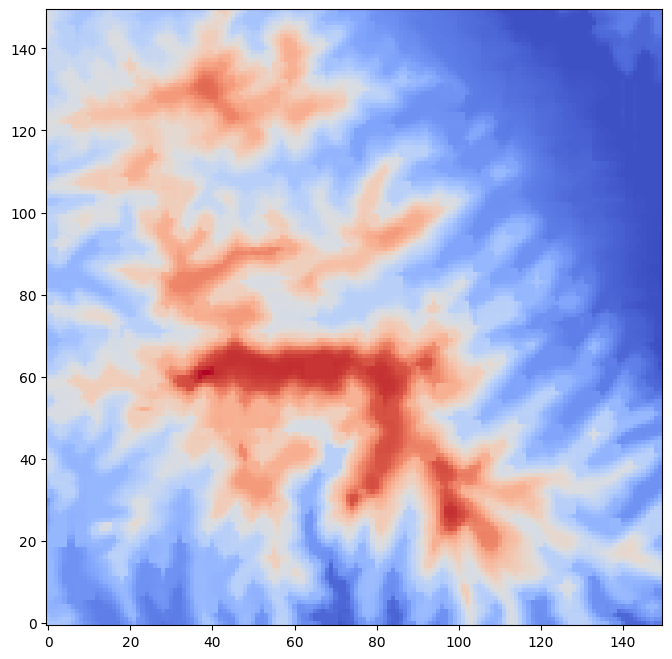

In [3]:
"""
STUDENTENOEFENING: Hilltopping-beweging (ABM vlinders volgens Pe’er et al.)

Doel
----
Je implementeert de kern van het vlinder-ABM:
- Vlinders bewegen op een discreet rooster van patches (cellen).
- Elke patch heeft een vaste hoogte elevation[i, j] (statisch landschap).
- Elke vlinder zit precies op één cel (i, j).
- In elke tijdstap beweegt elke vlinder exact één keer naar een buurcel.

Bewegingsregel (zoals in de tekst)
----------------------------------
Voor elke vlinder:
1) Bepaal de geldige buurcellen in de 8-neighbor Moore-neighborhood.
   - Aan randen/hoeken bestaan minder buren → "reduced neighborhood".
2) Trek u ~ Uniform(0,1).
   - Als u < q: beweeg "heuvelop" naar de buur met de hoogste elevatie.
              Als meerdere buren dezelfde hoogste elevatie hebben → kies willekeurig tussen die buren.
   - Anders: beweeg willekeurig naar één van de geldige buren.

Wat jij moet invullen
---------------------
Vul de TODO-secties in:
- valid_neighbors(...)
- step_butterflies(...)

Onderaan staat een klein voorbeeld (self-test) om je code te controleren.

Conventies (heel belangrijk)
----------------------------
- elevation is een 2D numpy-array met shape (H, W).
- Indices zijn in *array-indexruimte*:
    i = rij-index (row), neemt toe naar beneden
    j = kolom-index (col), neemt toe naar rechts
  (Dus elevation[i, j] = hoogte in rij i, kolom j.)
- Vlinders worden opgeslagen als twee integer arrays:
    bi[k] = rij-index van vlinder k
    bj[k] = kolom-index van vlinder k
"""

import numpy as np
import matplotlib.pyplot as plt

# load the data and show the figure
plt.figure(figsize=(15,8))
plt.imshow(elevation.T, cmap = 'coolwarm', origin='lower')
plt.show()


# ------------------------------------------------------------
# Buurt-definitie (gegeven)
# ------------------------------------------------------------
# 8-neighbor Moore offsets (di, dj) in indexruimte.
# Elke offset is een mogelijke stap van (i, j) naar (i+di, j+dj).
NEIGH_OFFSETS = np.array([
    (-1, -1), (-1, 0), (-1, 1),
    ( 0, -1),          ( 0, 1),
    ( 1, -1), ( 1, 0), ( 1, 1),
], dtype=np.int32)


def valid_neighbors(i: int, j: int, H: int, W: int):
    """
    Geef een lijst terug van geldige (in-bounds) Moore-buren van cel (i, j).
    (3,2) H,W=100, 100 --> [(2,2), (3,2), (4,2), (2,3), (4,3), (2,4), (3,4), (4,4)]

    Parameters
    ----------
    i, j : int
        Huidige celcoördinaten (rij, kolom).

    H, W : int
        Hoogte en breedte van het rooster (elevation.shape == (H, W)).

    Returns
    -------
    nbrs : list[tuple[int,int]]
        Lijst van (ni, nj)-coördinaten van buurcellen die binnen het rooster liggen.

    Tips / hints
    ------------
    - "Reduced Moore neighborhood" betekent:
      * Binnenin het rooster: 8 buren.
      * Op een rand: 5 buren.
      * In een hoek: 3 buren.
    - Gebruik NEIGH_OFFSETS om kandidaat-buren te maken.
    - Filter alles wat buiten het rooster valt:
          0 <= ni < H  en  0 <= nj < W
    """
    nbrs = []
    for di, dj in NEIGH_OFFSETS:
        ni, nj = i + int(di), j + int(dj)
        if 0 <= ni < H and 0 <= nj < W:
            nbrs.append((ni, nj))
    return nbrs

def step_butterflies(
    rng: np.random.Generator,
    elevation: np.ndarray,
    bi: np.ndarray,
    bj: np.ndarray,
    q: float
):
    """
    Voer EXACT één tijdstap uit: elke vlinder beweegt één keer.

    Parameters
    ----------
    rng : np.random.Generator
        Random generator (voor reproduceerbaarheid).

    elevation : np.ndarray, shape (H, W)
        Statisch hoogtelandschap.

    bi, bj : np.ndarray, shape (N,)
        Posities van N vlinders.
        bi[k], bj[k] zijn de integer (rij, kolom)-indices van vlinder k.

    q : float in [0, 1]
        Kans om heuvelop te bewegen (deterministische voorkeur + random tie-break).
        - Met kans q: kies buur met maximale elevatie (ties willekeurig).
        - Met kans 1-q: kies willekeurige geldige buur.

    Returns
    -------
    bi, bj : np.ndarray
        Geüpdatete positie-arrays (worden typisch "in place" aangepast).

    Vereiste implementatie (hieronder bij TODO)
    ----------------------
    Voor elke vlinder k:
    1) Lees huidige positie (i, j).
    2) Bepaal geldige buren: nbrs = valid_neighbors(i, j, H, W).
    3) Trek u = rng.random().
       Als u < q:
           a) bereken elevaties van alle buren
           b) bepaal de maximum elevatie
           c) verzamel alle buren die die maximum halen (ties)
           d) kies willekeurig één van die beste buren
       Anders:
           kies willekeurig één buur uit nbrs
    4) Schrijf de gekozen buur terug in bi[k], bj[k].

    Veelgemaakte fouten
    -------------------
    - Rand/hoek niet correct behandelen (moet reduced neighborhood zijn).
    - Ties niet willekeurig breken (altijd eerste max kiezen is fout).
    - Indexverwarring: numpy gebruikt elevation[rij, kolom] = elevation[i, j].
    """
    H, W = elevation.shape
    N = bi.shape[0]

    # een random getal trekken tussen 0 en 1:
    q = rng.random()


    # --- TODO ---

    return bi, bj


In [ ]:
import time
from IPython.display import display

rng = np.random.default_rng(0)

H, W = elevation.shape
N = 500                 # aantal vlinders
T = 1000                # aantal tijdstappen
q = 0.75                # kans om heuvelop te bewegen
render_every = 5        # verhoog om Colab te versnellen (probeer 10, 20)

# ---- initialisatie vlinders ----
center_i, center_j = H // 2, W // 2
bi = np.full(N, center_i, dtype=np.int32)
bj = np.full(N, center_j, dtype=np.int32)

# ---- visualisatie setup ----
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([]); ax.set_yticks([])

# achtergrond: hoogtekaart
bg = ax.imshow(elevation.T, cmap='coolwarm', origin='lower', interpolation='nearest')

# vlinders als scatter plot
sc = ax.scatter(bi, bj, s=6, c="black", alpha=0.6)

title = ax.set_title("")
handle = display(fig, display_id=True)
plt.close(fig)  # prevents Colab from emitting a new image each update

t0 = time.time()

for t in range(T):
    bi, bj = step_butterflies(rng, elevation, bi, bj, q=q)

    if t % render_every == 0:
        sc.set_offsets(np.c_[bi, bj])

        elapsed = time.time() - t0
        ticks_per_s = (t + 1) / max(elapsed, 1e-9)
        title.set_text(f"Hilltopping butterflies | t={t}/{T} | q={q:.2f} | {ticks_per_s:.1f} ticks/s")

        handle.update(fig)
        time.sleep(0.001)
